In [1]:
## Plotting libraries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## ELI5
import eli5
                            
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


## Bag of Words and TF-IDF

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

## Train Test Split, Cross Validation, GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


## Pipeline

from sklearn.pipeline import Pipeline

## Standard Scaler

from sklearn.preprocessing import StandardScaler

## Machine Learning Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Metrics

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve, auc 

## Word2Vec Model

from gensim.models import Word2Vec

## Tokenization 

import nltk

## Miscellaneous

from collections import Counter
import random
import pickle

## Resampling

from sklearn.utils import resample



import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns=df.columns.str.replace(' ','_').str.lower()
df.head()

clothing_id  age                    title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         review_text  rating  recommended_ind  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   positive_feedback_count   division_name department_name class_name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [3]:
df.isnull().sum()

clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

In [4]:
df[df['class_name'].isnull()]

clothing_id  age                                  title  \
9444            72   25                   My favorite socks!!!   
13767          492   23                               So soft!   
13768          492   49                        Wardrobe staple   
13787          492   48                                    NaN   
16216          152   36                          Warm and cozy   
16221          152   37                                  Love!   
16223          152   39                        "long and warm"   
18626          184   34                  Nubby footless tights   
18671          184   54                          New workhorse   
20088          772   50                      Comfy sweatshirt!   
21532          665   43                           So worth it!   
22997          136   47  Charcoal, pale gray, a bit of silver!   
23006          136   33                        Cute itsy socks   
23011          136   36                            Super socks   

                                             review_text  rating  \
9444   I never write reviews, but these socks are so ...       5   
13767  I just love this hoodie! it is so soft and com...       5   
13768  Love this hoodie. so soft and goes with everyt...       5   
13787                                                NaN       5   
16216  Just what i was looking for. soft, cozy and warm.       5   
16221  I am loving these. they are quite long but are...       5   
16223  These leg warmers are perfect for me. they are...       5   
18626  These are amazing quality. i agree, size up to...       5   
18671  These tights are amazing! if i care for them w...       5   
20088  This sweatshirt is really nice!  it's oversize...       5   
21532  Got these on sale...absolutely love eberjey! f...       5   
22997  These socks are soft and comfortable, and they...       5   
23006  Love polkadots, love sparkle. these little soc...       5   
23011  I love these little socks ? and the dots spark...       5   

       recommended_ind  positive_feedback_count division_name department_name  \
9444                 1                        0           NaN             NaN   
13767                1                        1           NaN             NaN   
13768                1                        0           NaN             NaN   
13787                1                        0           NaN             NaN   
16216                1                        0           NaN             NaN   
16221                1                        0           NaN             NaN   
16223                1                        0           NaN             NaN   
18626                1                        5           NaN             NaN   
18671                1                        0           NaN             NaN   
20088                1                        0           NaN             NaN   
21532                1                        0           NaN             NaN   
22997                1                        1           NaN             NaN   
23006                1                        0           NaN             NaN   
23011                1                        0           NaN             NaN   

      class_name  
9444         NaN  
13767        NaN  
13768        NaN  
13787        NaN  
16216        NaN  
16221        NaN  
16223        NaN  
18626        NaN  
18671        NaN  
20088        NaN  
21532        NaN  
22997        NaN  
23006        NaN  
23011        NaN

## Clean Review Text

In [5]:
review_text_df=df.review_text

## Expanding Apostrophe Words

In [6]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [7]:
review=[]
for i in range(0,len(review_text_df)):
    
    try:
        temp_review=[]
        for word in review_text_df[i].split():
            if word in appos.keys():
                temp_review.append(appos[word])
            else:
                temp_review.append(word)
        review.append(' '.join(temp_review))
        
    except AttributeError:
        review.append(np.nan)

In [8]:
review[1]

'Love this dress! it is sooo pretty. i happened to find it in a store, and I am glad i did bc i never would have ordered it online bc it is petite. i bought a petite and am 5\'8". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.'

## Removing Punctuation, Lowercasing Words, Removing Stop Word, Removing 1-2 Lettered Words and Lemmatization

In [9]:
corpus=[]
for i in range(0,len(review_text_df)):
    
    try:
        review_1=re.sub('[^a-zA-Z]',' ',review[i])
        review_1=review_1.lower().split()
        lm=WordNetLemmatizer()
        review_1=' '.join([lm.lemmatize(word) for word in review_1 if not word in set(stopwords.words('english'))])
#         review_1=' '.join([word for word in review_1 if not word in set(stop_words.ENGLISH_STOP_WORDS)])
        review_1=re.sub(r'\W*\b\w{1,2}\b','', review_1)
        corpus.append(review_1.lower())
    except TypeError:
        corpus.append(np.nan)

## Merging Data, Dropping "NaN" Review Rows & Tokenization

In [10]:
# df_clean=pd.DataFrame({'review_text':df.review_text, 'review_text_clean':corpus, 'recommended_ind':df.recommended_ind})

In [11]:
df_clean=pd.DataFrame({'review_text':df.review_text, 'review_text_clean':corpus,'age':df.age,'class_name':df.class_name, 'recommended_ind':df.recommended_ind})

In [12]:
df_clean.dropna(inplace=True)
df_clean.reset_index(drop=True,inplace=True)

In [13]:
tokenize=[]
for i in range(0,len(df_clean.review_text_clean)):
    tokenize.append(nltk.word_tokenize(df_clean.review_text_clean[i]))


In [14]:
df_clean['tokens']=tokenize

## Create Bag of Words and TF-IDF Models

In [15]:
X_models=df_clean.review_text_clean
y_models=df_clean.recommended_ind

In [16]:
X_models.shape

(22628,)

## Unigrams

In [17]:
# Bag of Words
cvec1=CountVectorizer(ngram_range=(1,1),min_df=2,max_features=1000)
X1_cvec=cvec1.fit_transform(X_models)
X1cvec=pd.DataFrame(X1_cvec.todense(),columns=cvec1.get_feature_names())
X1cvec_train , X1cvec_test , y1cvec_train , y1cvec_test = train_test_split(X1cvec,y_models,test_size=0.3,random_state=0,stratify=y_models)
    
# TFIDF
tf1=TfidfVectorizer(ngram_range=(1,1),min_df=2,max_features=1000)
X1_tf=tf1.fit_transform(X_models)
X1tf=pd.DataFrame(X1_tf.todense(),columns=tf1.get_feature_names())
X1tf_train , X1tf_test , y1tf_train , y1tf_test = train_test_split(X1tf,y_models,test_size=0.3,random_state=0,stratify=y_models)

In [18]:
uni_cvec=pd.concat([X1cvec,y_models],axis=1)
uni_1_cvec=uni_cvec[uni_cvec.recommended_ind==1].drop(columns='recommended_ind')
uni_0_cvec=uni_cvec[uni_cvec.recommended_ind==0].drop(columns='recommended_ind')

uni_tfidf=pd.concat([X1tf,y_models],axis=1)
uni_1_tfidf=uni_tfidf[uni_tfidf.recommended_ind==1].drop(columns='recommended_ind')
uni_0_tfidf=uni_tfidf[uni_tfidf.recommended_ind==0].drop(columns='recommended_ind')

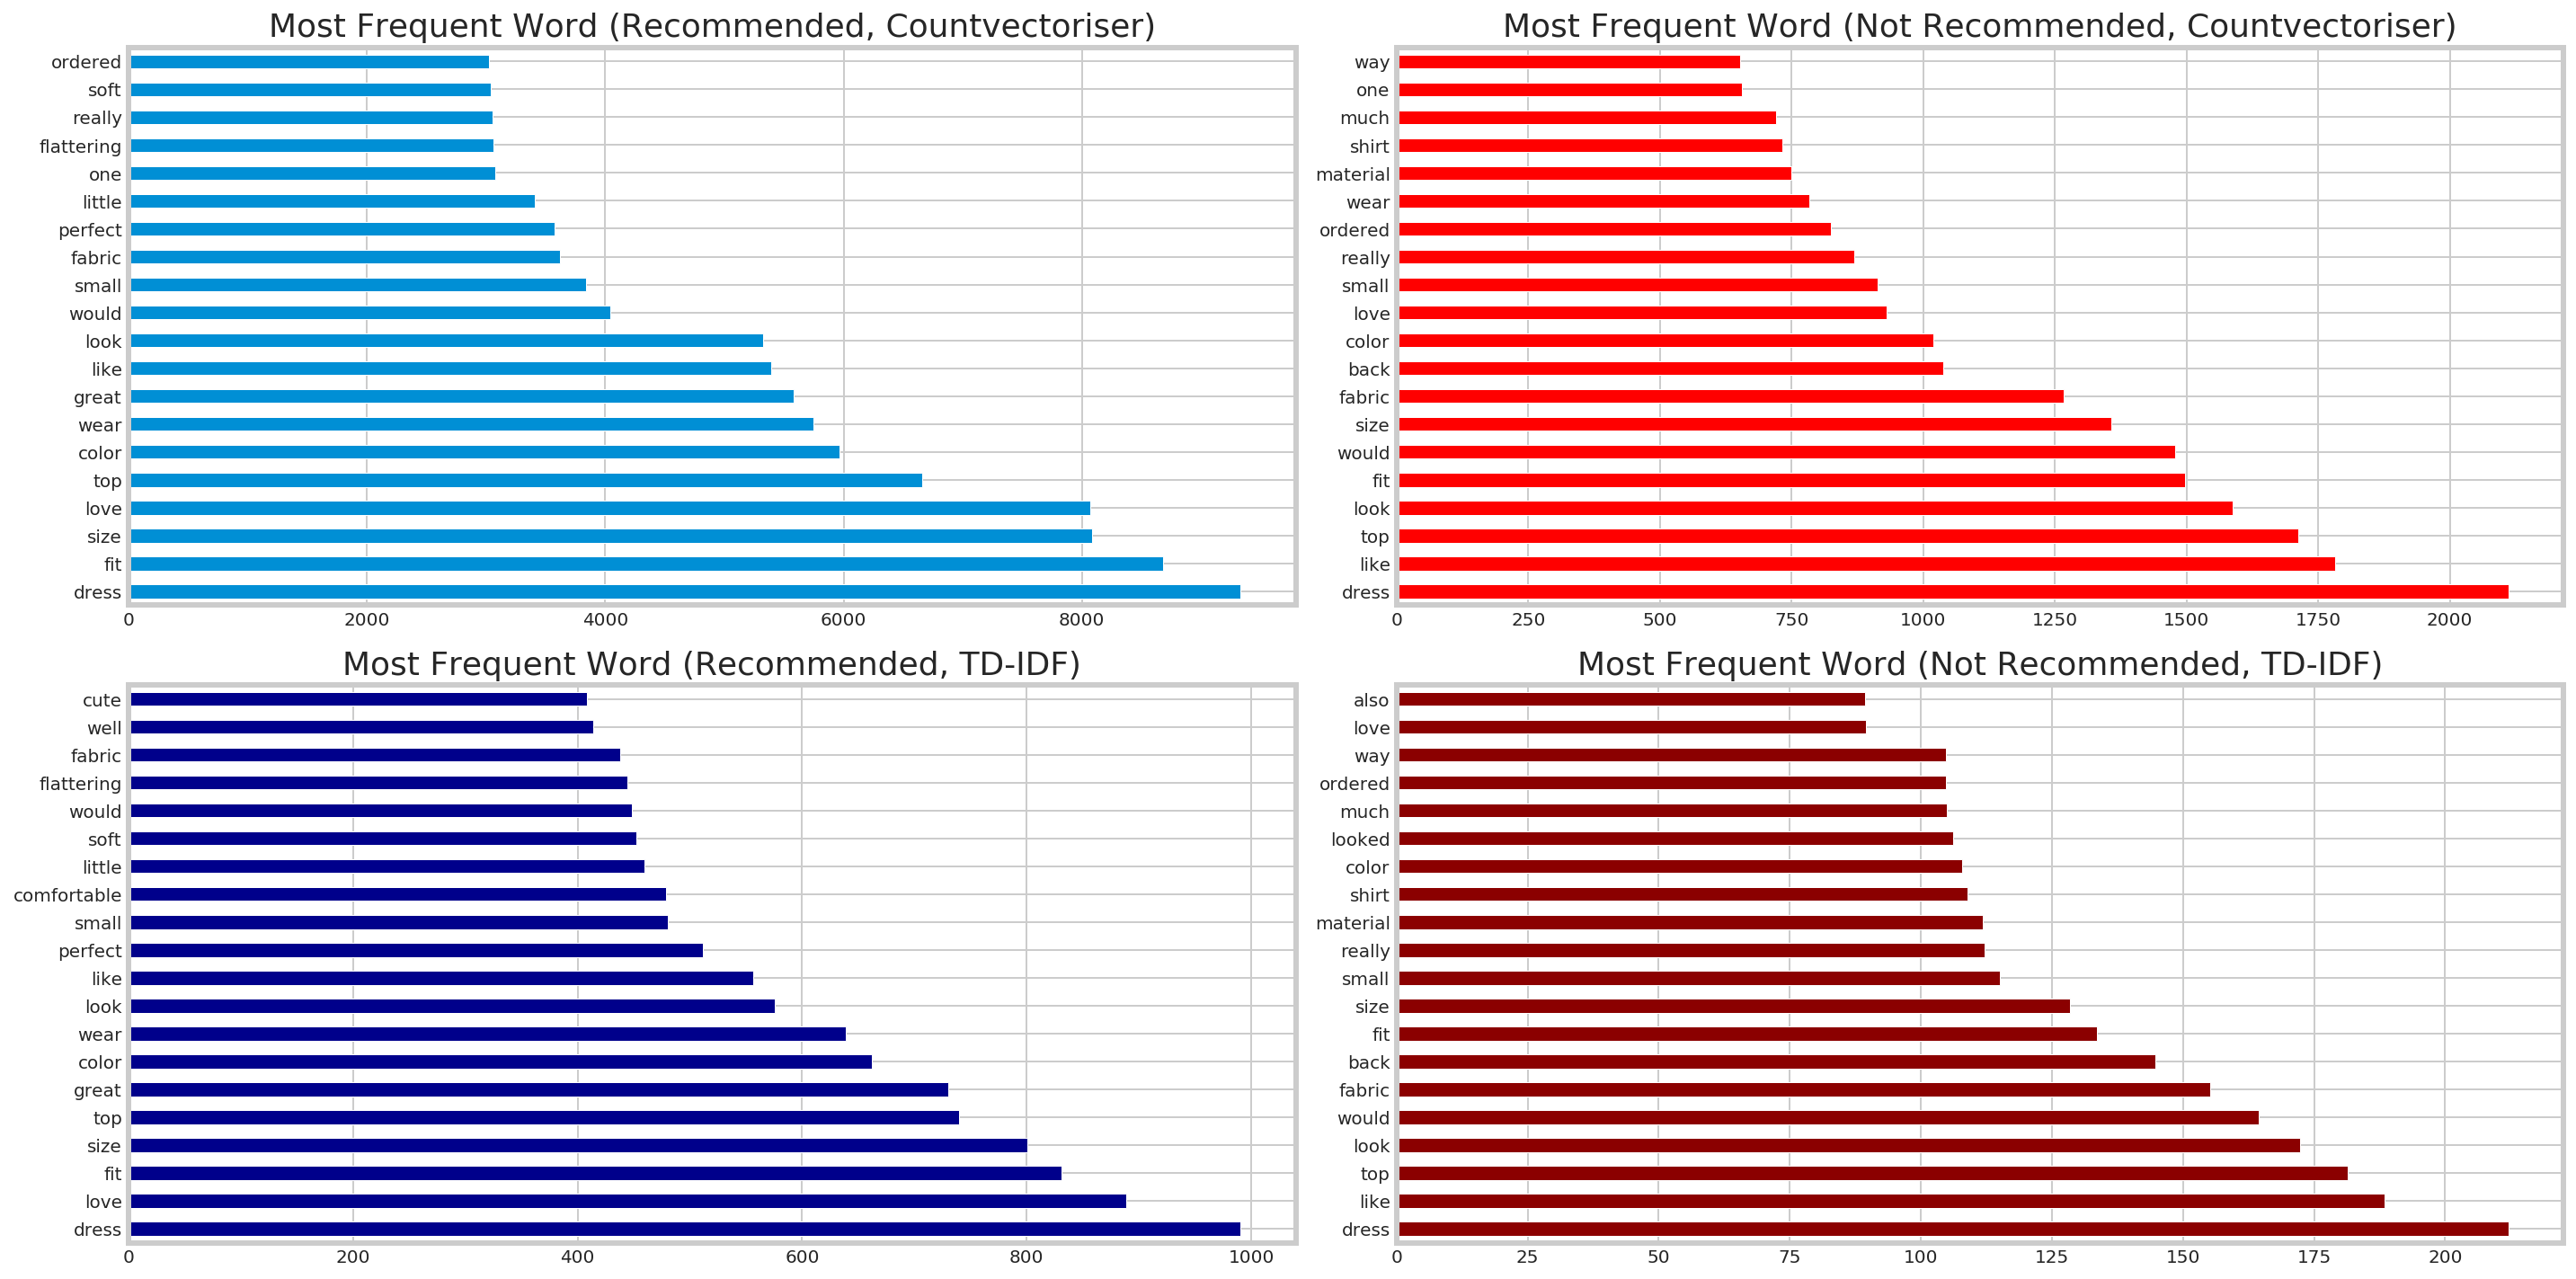

In [19]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,10))

ax[0][0]=uni_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0][0])
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0][0].set_title('Most Frequent Word (Recommended, Countvectoriser)',fontsize=18)
# labels=ax[0].get_xticklabels()
# ax[0].set_xticklabels(labels,rotation=70,fontsize=14)

ax[0][1]=uni_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0][1],color='red')
# ax[0][1].set_xlabel('Word Type',fontsize=16)
# ax[0][1].set_ylabel('Frequency of Word Use in Not Recommended Items',fontsize=16)
ax[0][1].set_title('Most Frequent Word (Not Recommended, Countvectoriser)',fontsize=18)
# labels=ax[1].get_xticklabels()
# ax[1].set_xticklabels(labels,rotation=70,fontsize=14)

ax[1][0]=uni_1_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1][0],color='darkblue')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1][0].set_title('Most Frequent Word (Recommended, TD-IDF)',fontsize=18)
# labels=ax[0].get_xticklabels()
# ax[0].set_xticklabels(labels,rotation=70,fontsize=14)

ax[1][1]=uni_0_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1][1],color='darkred')
# ax[1][1].set_xlabel('Word Type',fontsize=16)
# ax[1][1].set_ylabel('Frequency of Word Use in Not Recommended Items',fontsize=16)
ax[1][1].set_title('Most Frequent Word (Not Recommended, TD-IDF)',fontsize=18)
# labels=ax[1].get_xticklabels()
# ax[1].set_xticklabels(labels,rotation=70,fontsize=14)
plt.tight_layout()
plt.show()

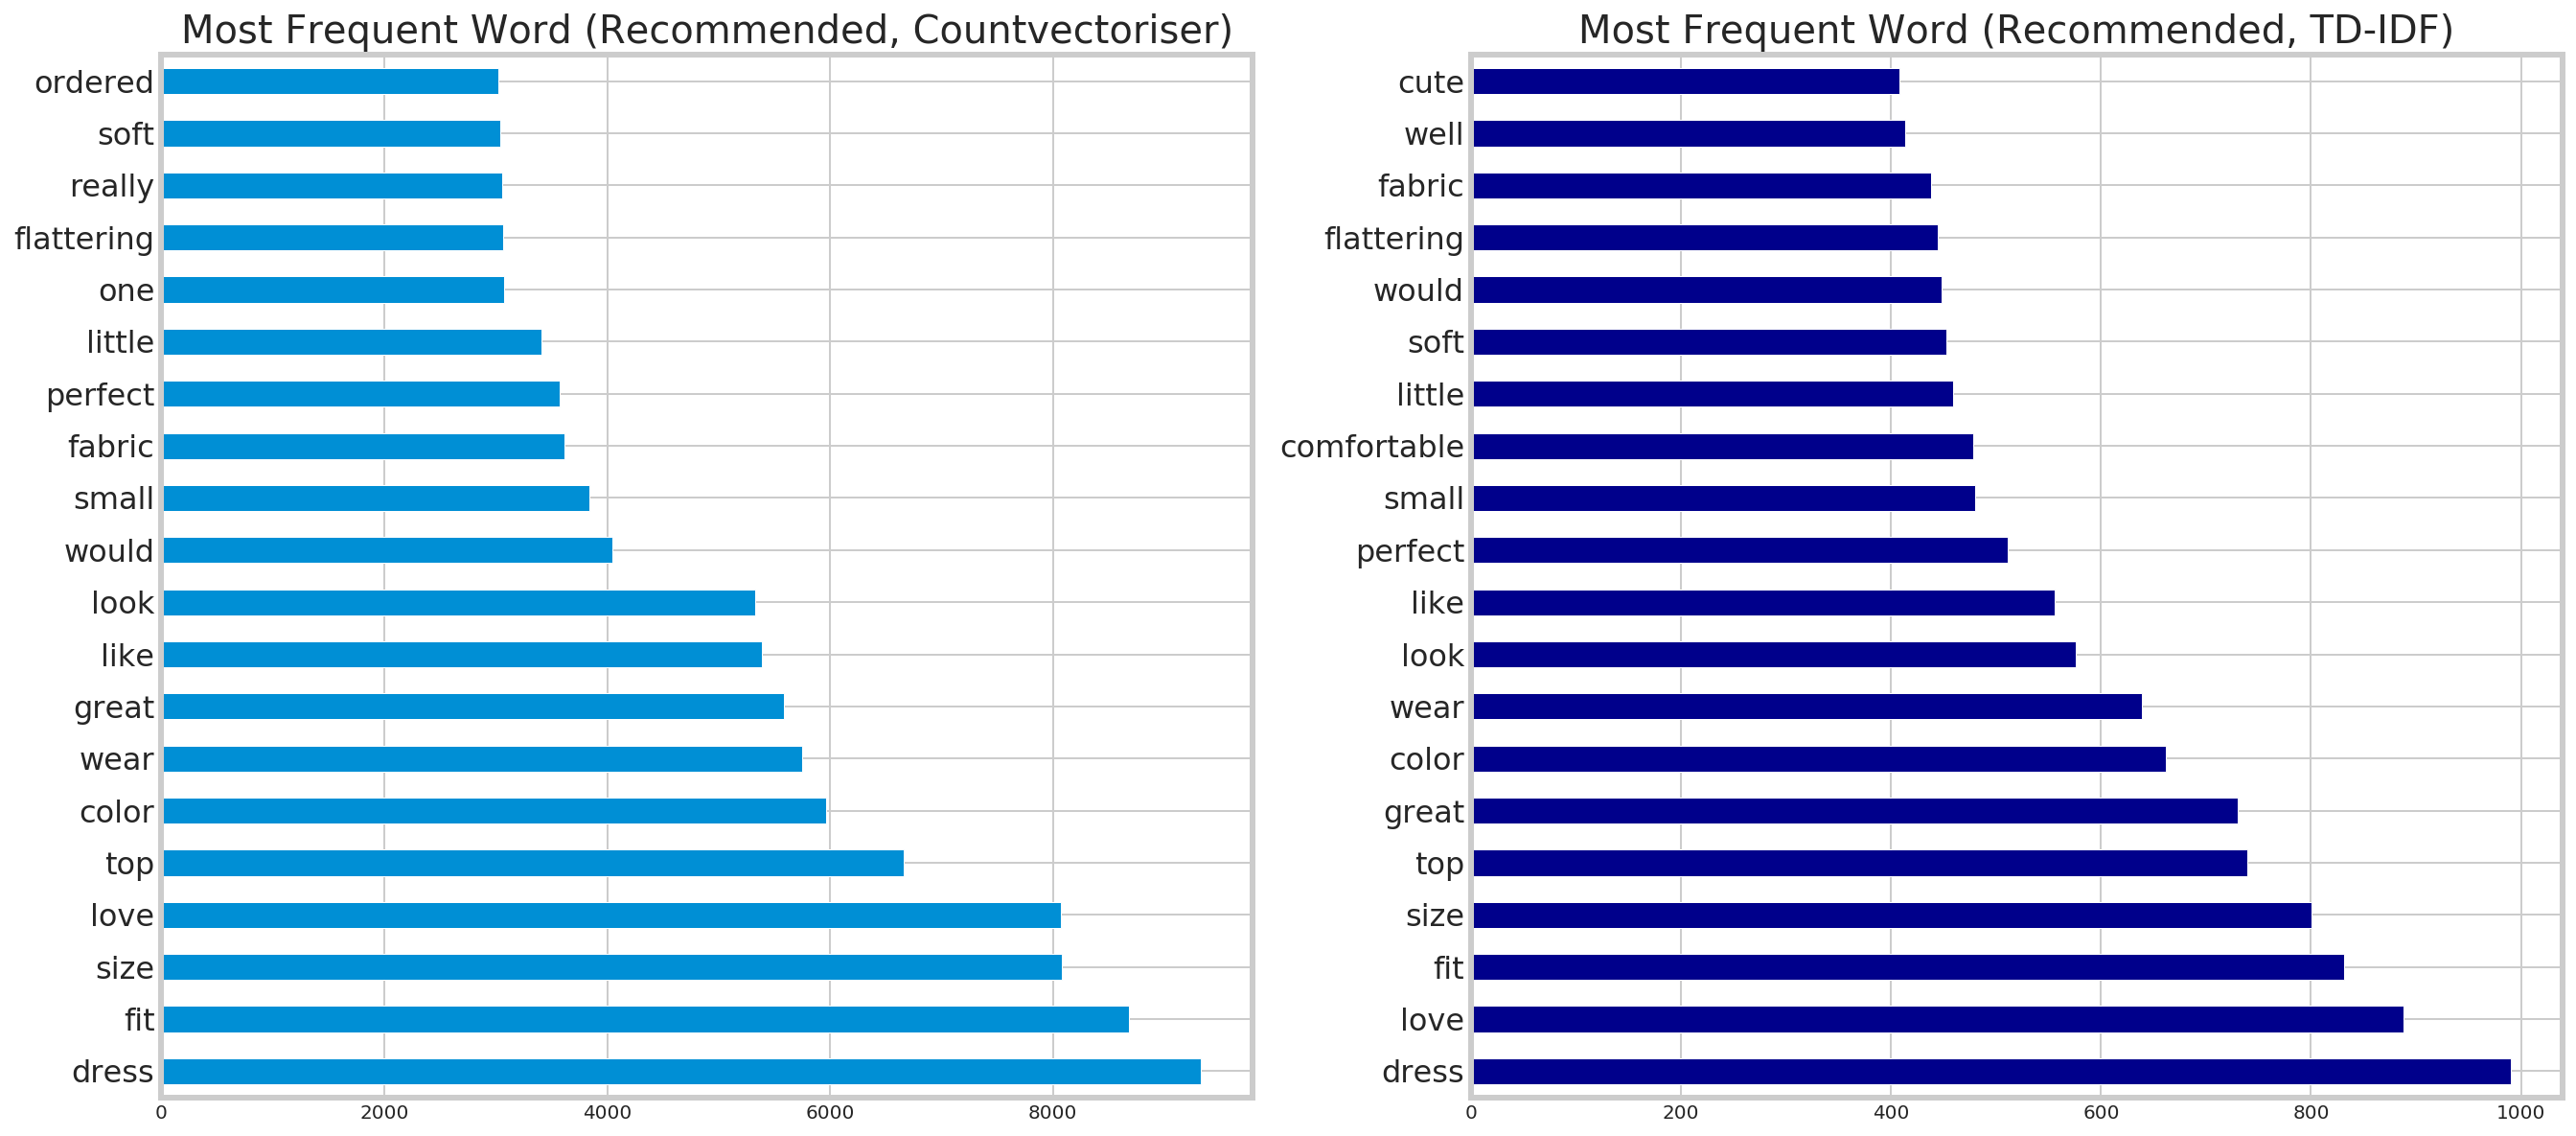

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax[0]=uni_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0])
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Word (Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=uni_1_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkblue')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Word (Recommended, TD-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)

plt.show()

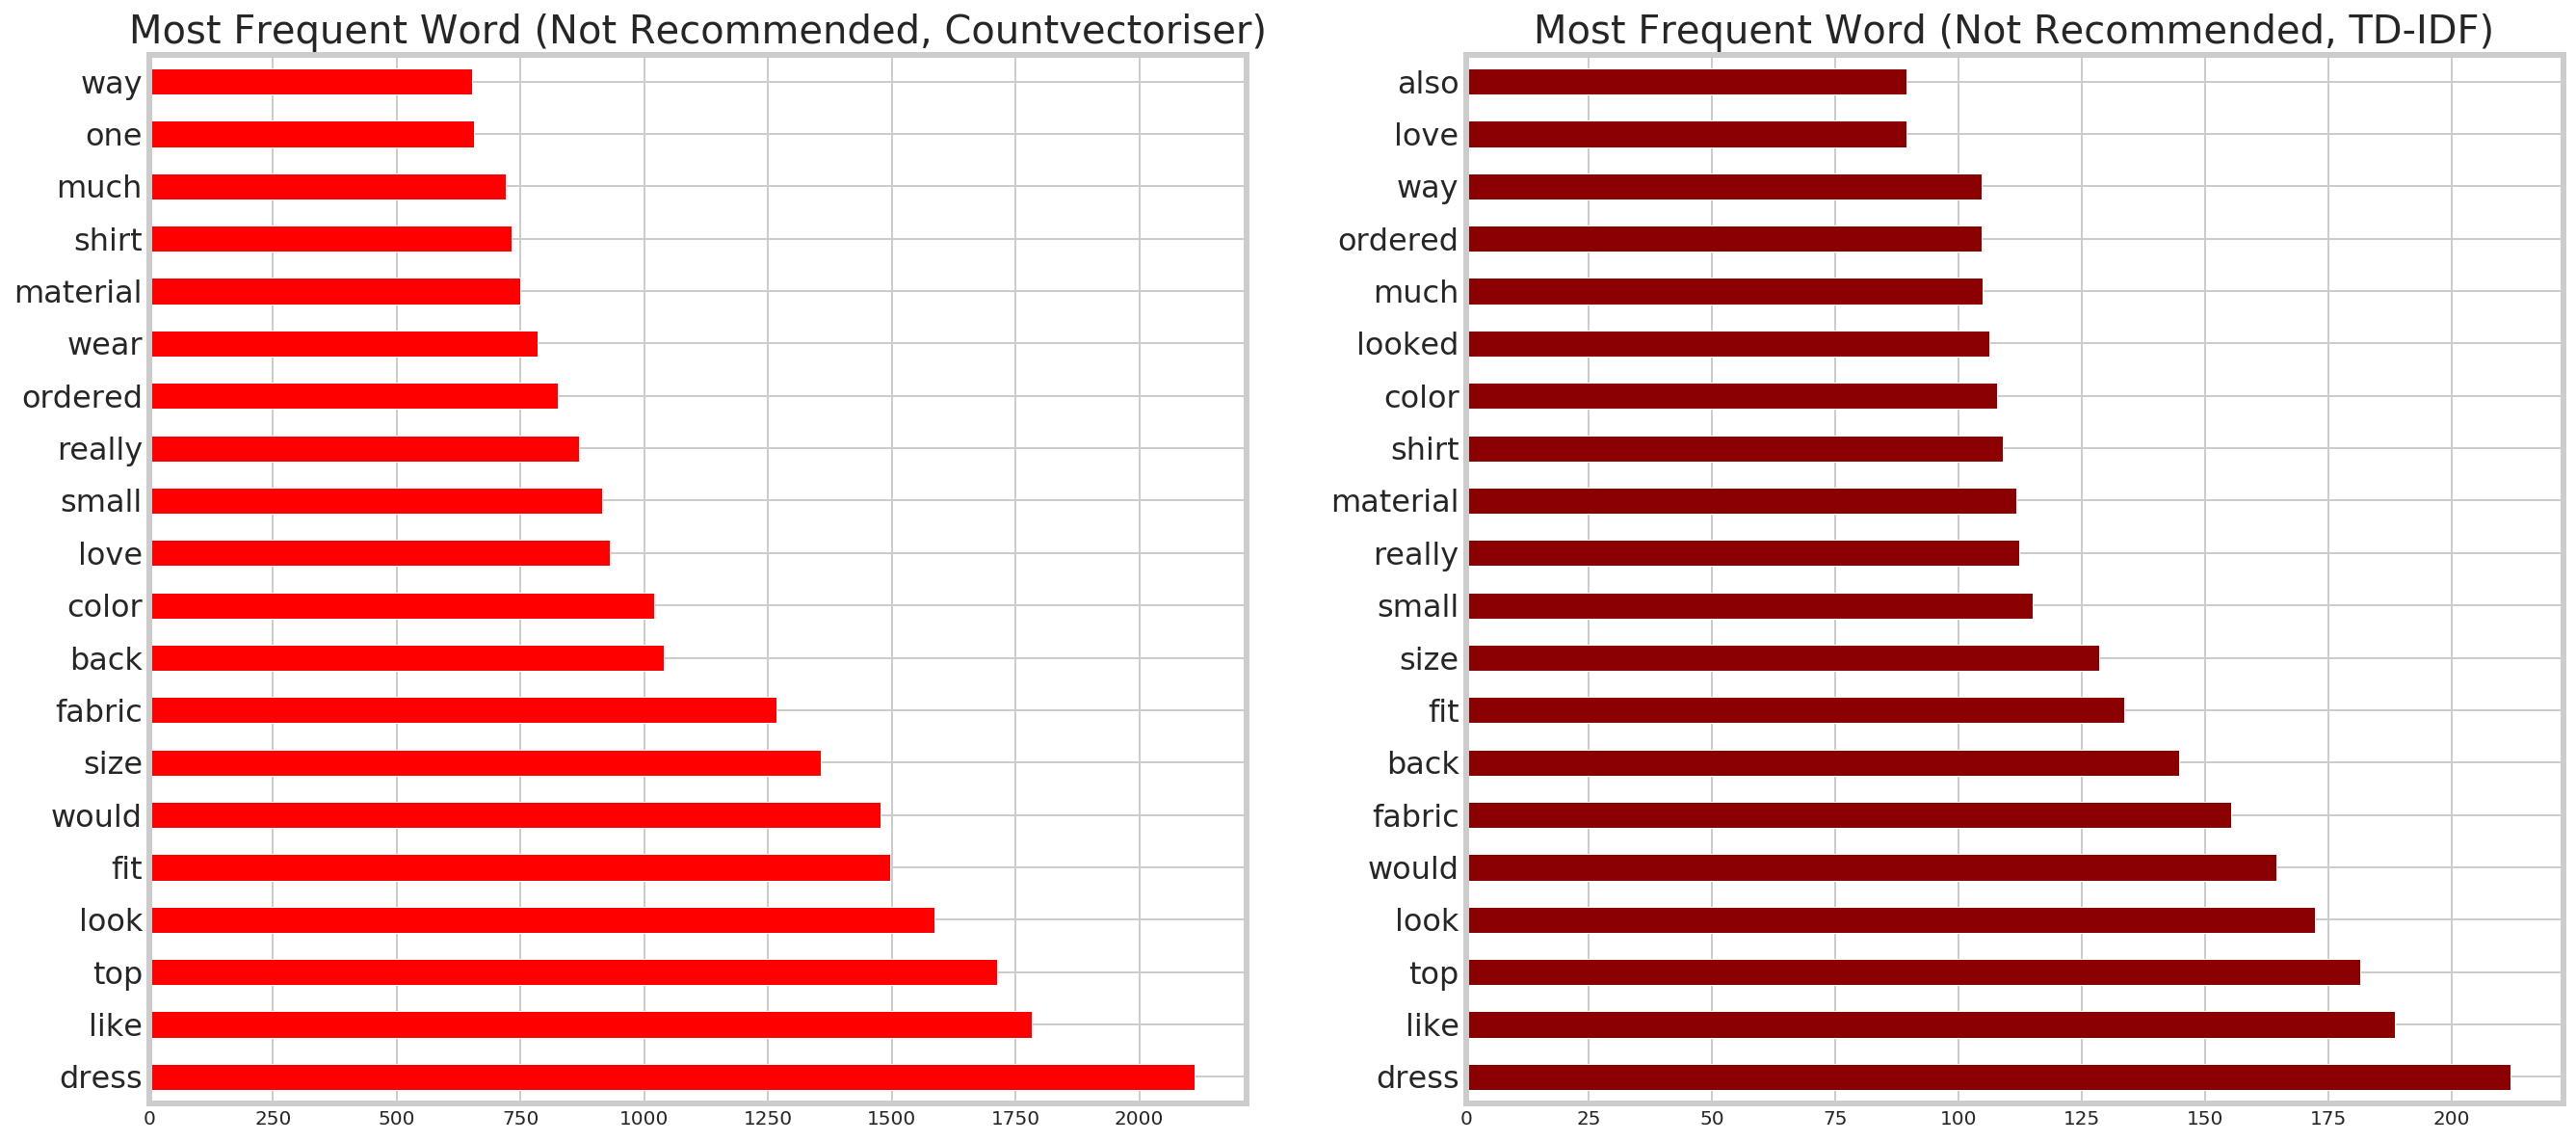

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax[0]=uni_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='red')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Word (Not Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=uni_0_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkred')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Word (Not Recommended, TD-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)

plt.show()

## Bigrams

In [22]:
# Bag of Words
cvec2=CountVectorizer(ngram_range=(2,2),min_df=2,max_features=1000)
X2_cvec=cvec2.fit_transform(X_models)
X2cvec=pd.DataFrame(X2_cvec.todense(),columns=cvec2.get_feature_names())
X2cvec_train , X2cvec_test , y2cvec_train , y2cvec_test = train_test_split(X2cvec,y_models,test_size=0.3,random_state=0,stratify=y_models)
    
# TFIDF
tf2=TfidfVectorizer(ngram_range=(2,2),min_df=2,max_features=1000)
X2_tf=tf2.fit_transform(X_models)
X2tf=pd.DataFrame(X2_tf.todense(),columns=tf2.get_feature_names())
X2tf_train , X2tf_test , y2tf_train , y2tf_test = train_test_split(X2tf,y_models,test_size=0.3,random_state=0,stratify=y_models)

In [23]:
bi=pd.concat([X2cvec,y_models],axis=1)
bi_1=bi[bi.recommended_ind==1].drop(columns='recommended_ind')
bi_0=bi[bi.recommended_ind==0].drop(columns='recommended_ind')

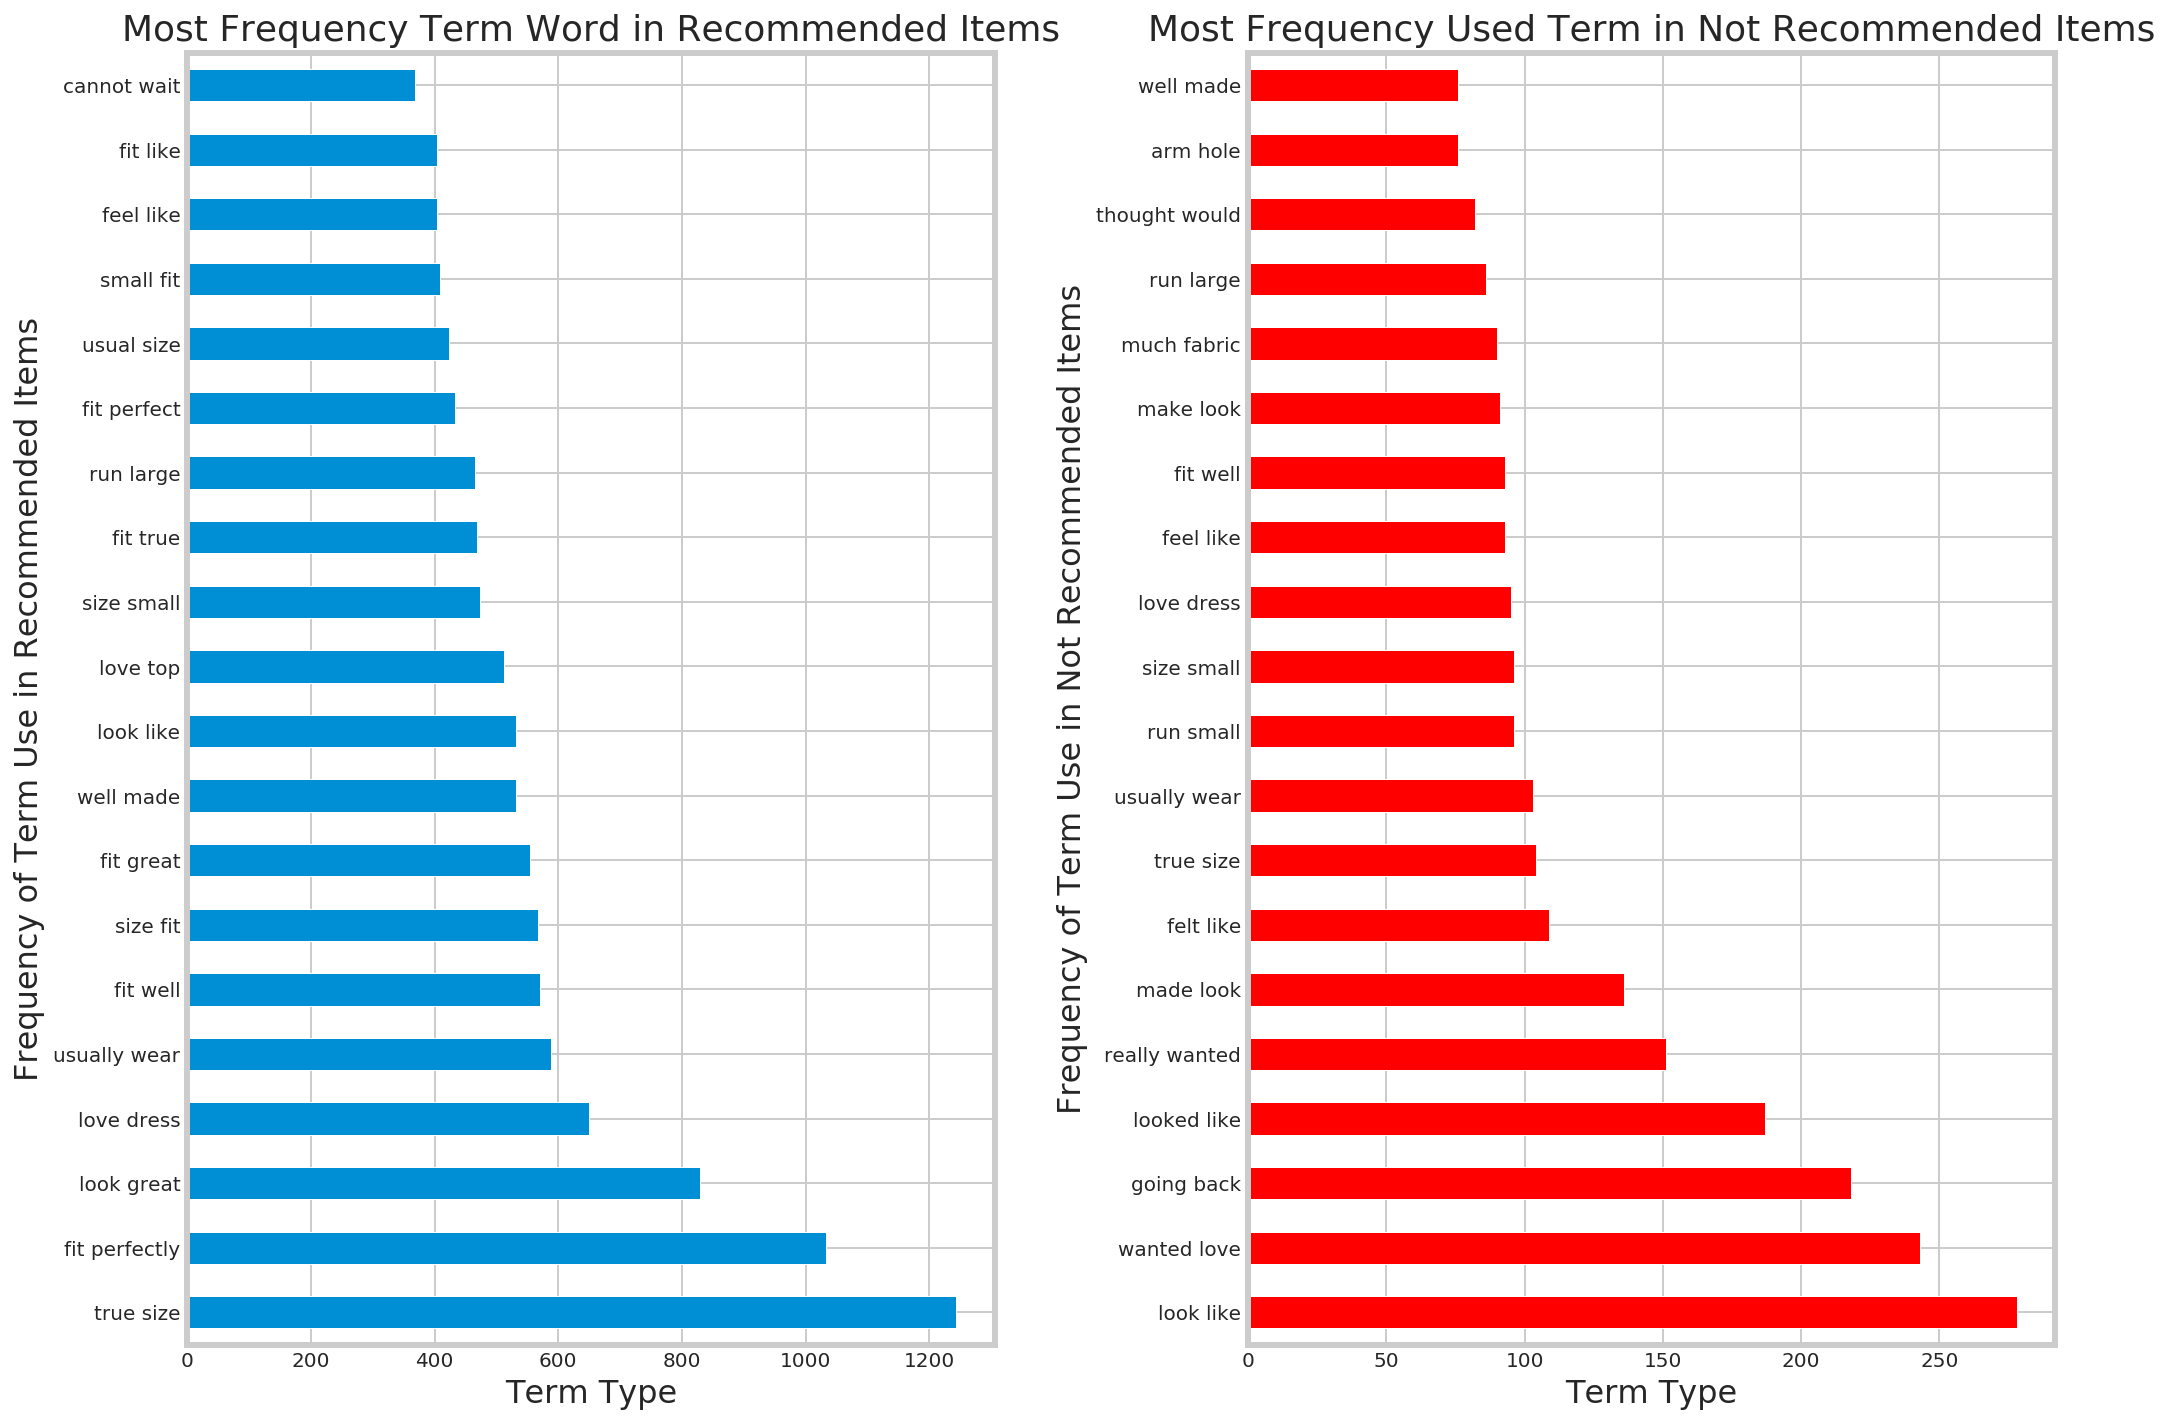

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))

ax[0]=bi_1.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0])
ax[0].set_xlabel('Term Type',fontsize=16)
ax[0].set_ylabel('Frequency of Term Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequency Term Word in Recommended Items',fontsize=18)
# labels=ax[0].get_xticklabels()
# ax[0].set_xticklabels(labels,rotation=70,fontsize=14)

ax[1]=bi_0.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='red')
ax[1].set_xlabel('Term Type',fontsize=16)
ax[1].set_ylabel('Frequency of Term Use in Not Recommended Items',fontsize=16)
ax[1].set_title('Most Frequency Used Term in Not Recommended Items',fontsize=18)
# labels=ax[1].get_xticklabels()
# ax[1].set_xticklabels(labels,rotation=70,fontsize=14)
plt.tight_layout()
plt.show()

## Trigrams

In [25]:
# Countvect
cvec3=CountVectorizer(ngram_range=(3,3),min_df=2,max_features=1000)
X3_cvec=cvec3.fit_transform(X_models)
X3cvec=pd.DataFrame(X3_cvec.todense(),columns=cvec3.get_feature_names())
X3cvec_train , X3cvec_test , y3cvec_train , y3cvec_test = train_test_split(X3cvec,y_models,test_size=0.3,random_state=0,stratify=y_models)
    
# TFIDF
tf3=TfidfVectorizer(ngram_range=(3,3),min_df=2,max_features=1000)
X3_tf=tf3.fit_transform(X_models)
X3tf=pd.DataFrame(X3_tf.todense(),columns=tf3.get_feature_names())
X3tf_train , X3tf_test , y3tf_train , y3tf_test = train_test_split(X3tf,y_models,test_size=0.3,random_state=0,stratify=y_models)

In [26]:
tri_cvec=pd.concat([X3cvec,y_models],axis=1)
tri_1_cvec=tri_cvec[tri_cvec.recommended_ind==1].drop(columns='recommended_ind')
tri_0_cvec=tri_cvec[tri_cvec.recommended_ind==0].drop(columns='recommended_ind')

tri_tfidf=pd.concat([X3tf,y_models],axis=1)
tri_1_tfidf=tri_tfidf[tri_tfidf.recommended_ind==1].drop(columns='recommended_ind')
tri_0_tfidf=tri_tfidf[tri_tfidf.recommended_ind==0].drop(columns='recommended_ind')

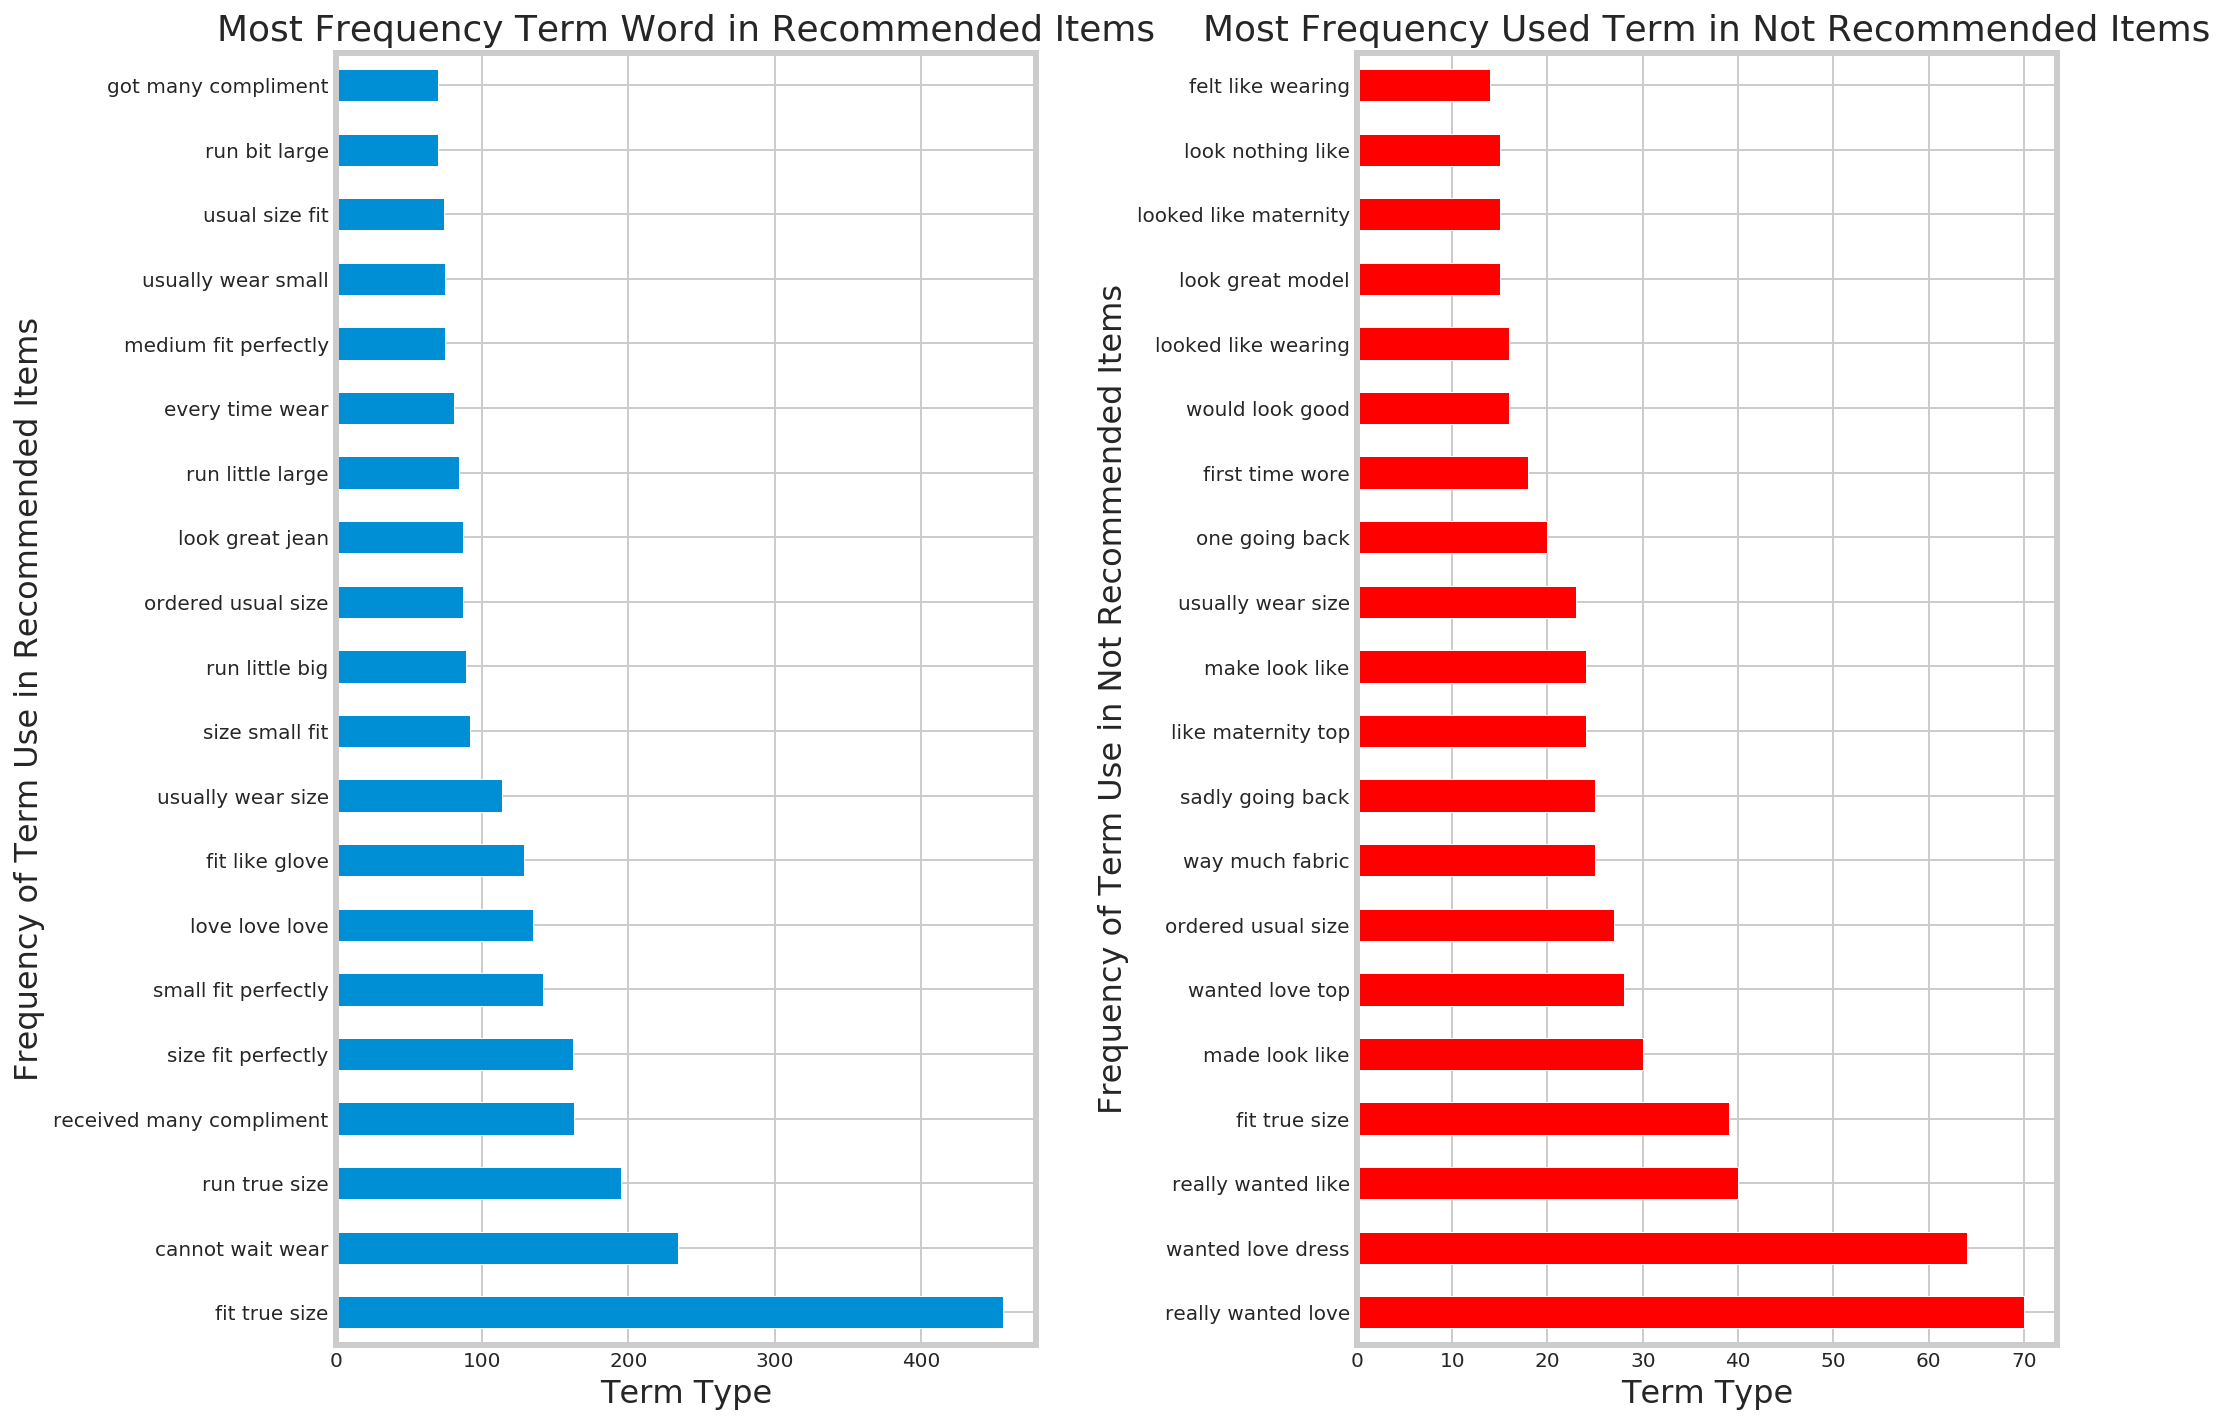

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))

ax[0]=tri_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0])
ax[0].set_xlabel('Term Type',fontsize=16)
ax[0].set_ylabel('Frequency of Term Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequency Term Word in Recommended Items',fontsize=18)
# labels=ax[0].get_xticklabels()
# ax[0].set_xticklabels(labels,rotation=70,fontsize=14)

ax[1]=tri_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='red')
ax[1].set_xlabel('Term Type',fontsize=16)
ax[1].set_ylabel('Frequency of Term Use in Not Recommended Items',fontsize=16)
ax[1].set_title('Most Frequency Used Term in Not Recommended Items',fontsize=18)
# labels=ax[1].get_xticklabels()
# ax[1].set_xticklabels(labels,rotation=70,fontsize=14)
plt.tight_layout()
plt.show()

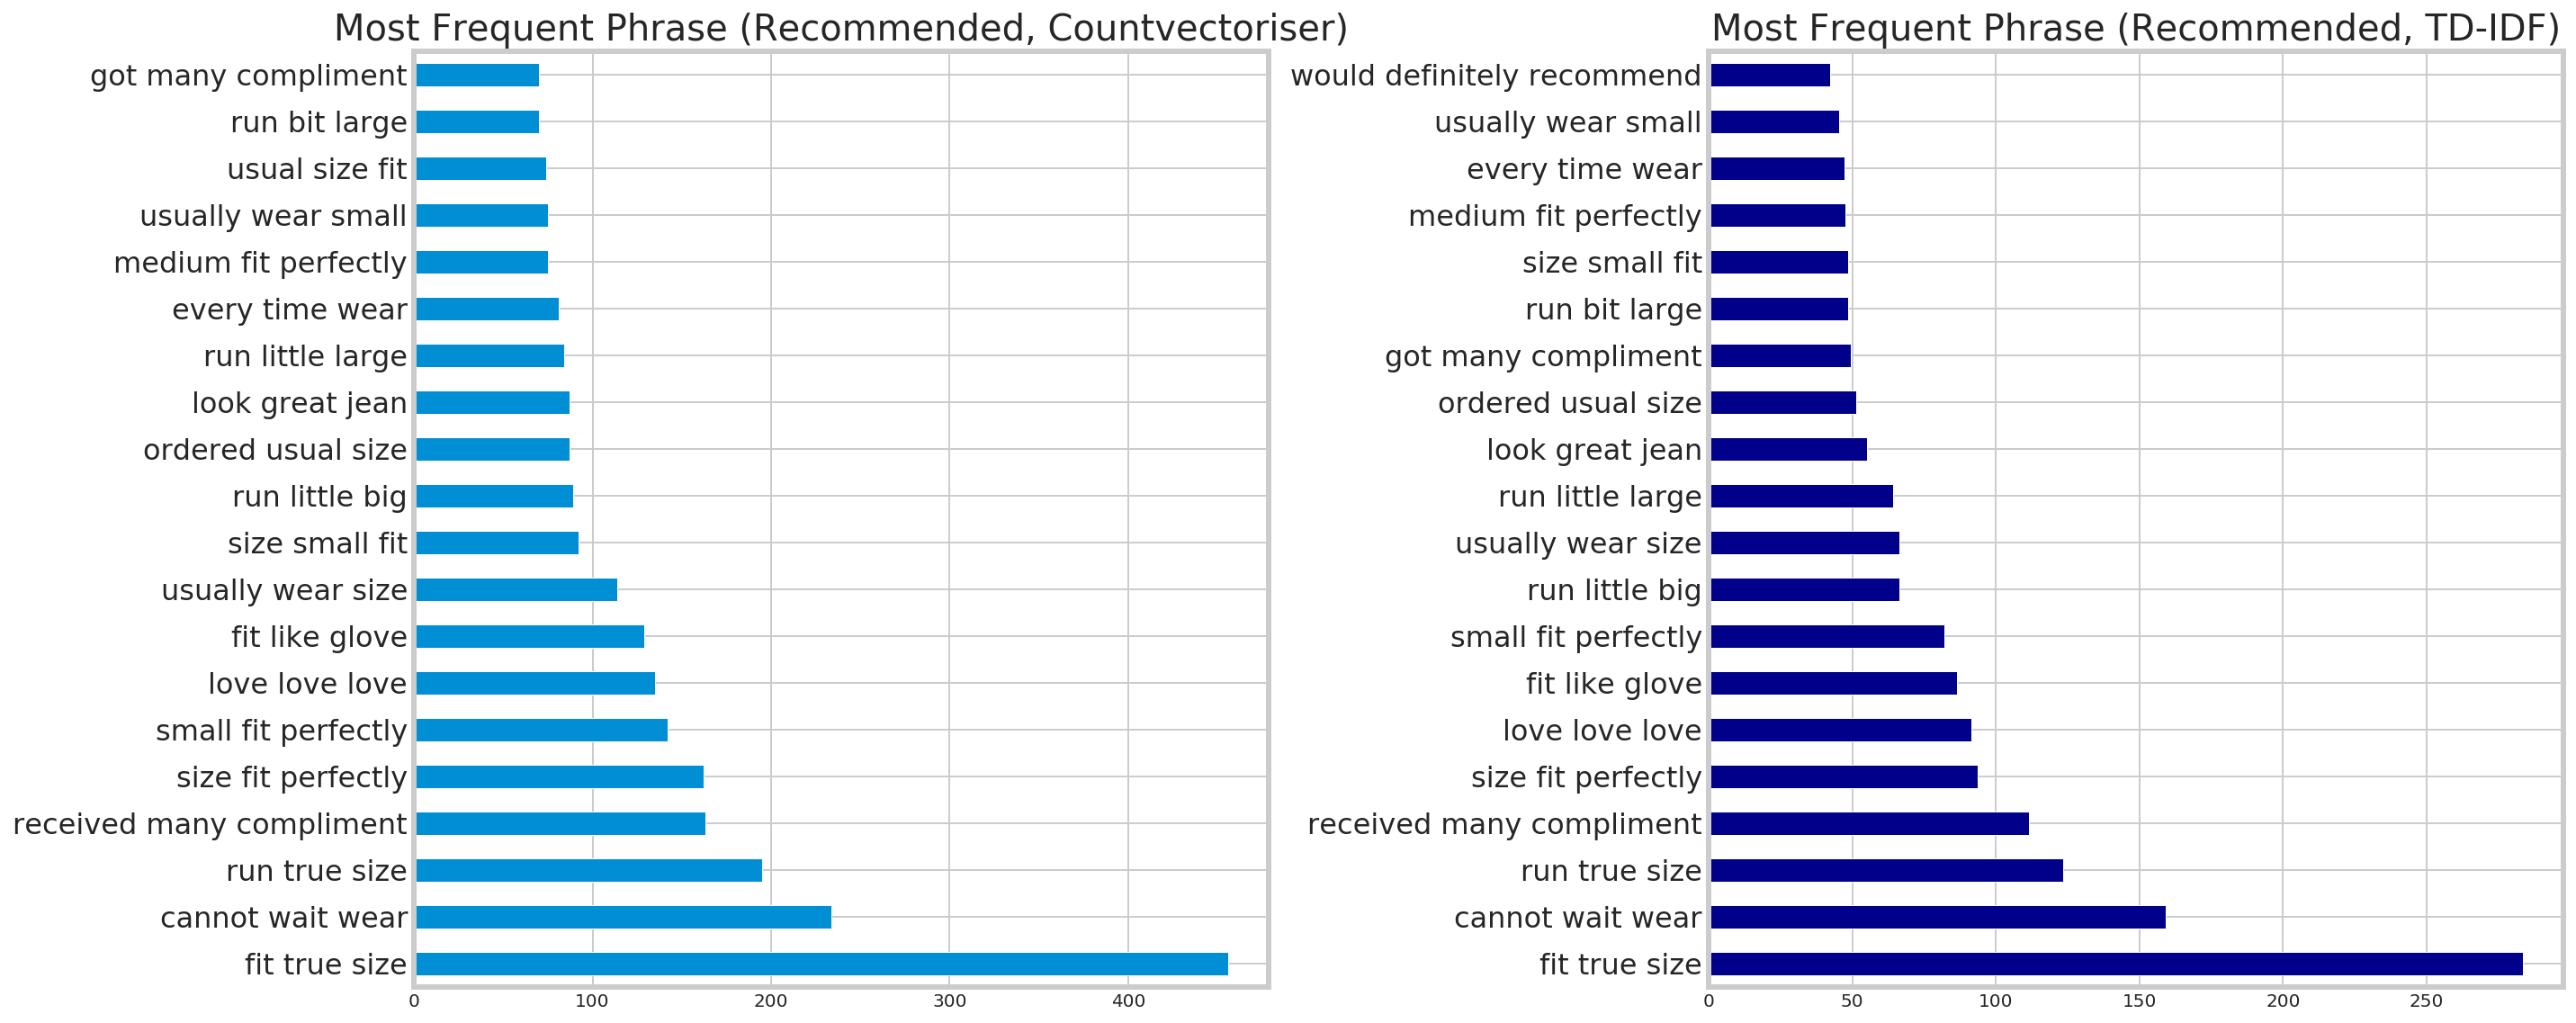

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=tri_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0])
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Phrase (Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=tri_1_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkblue')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Phrase (Recommended, TD-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

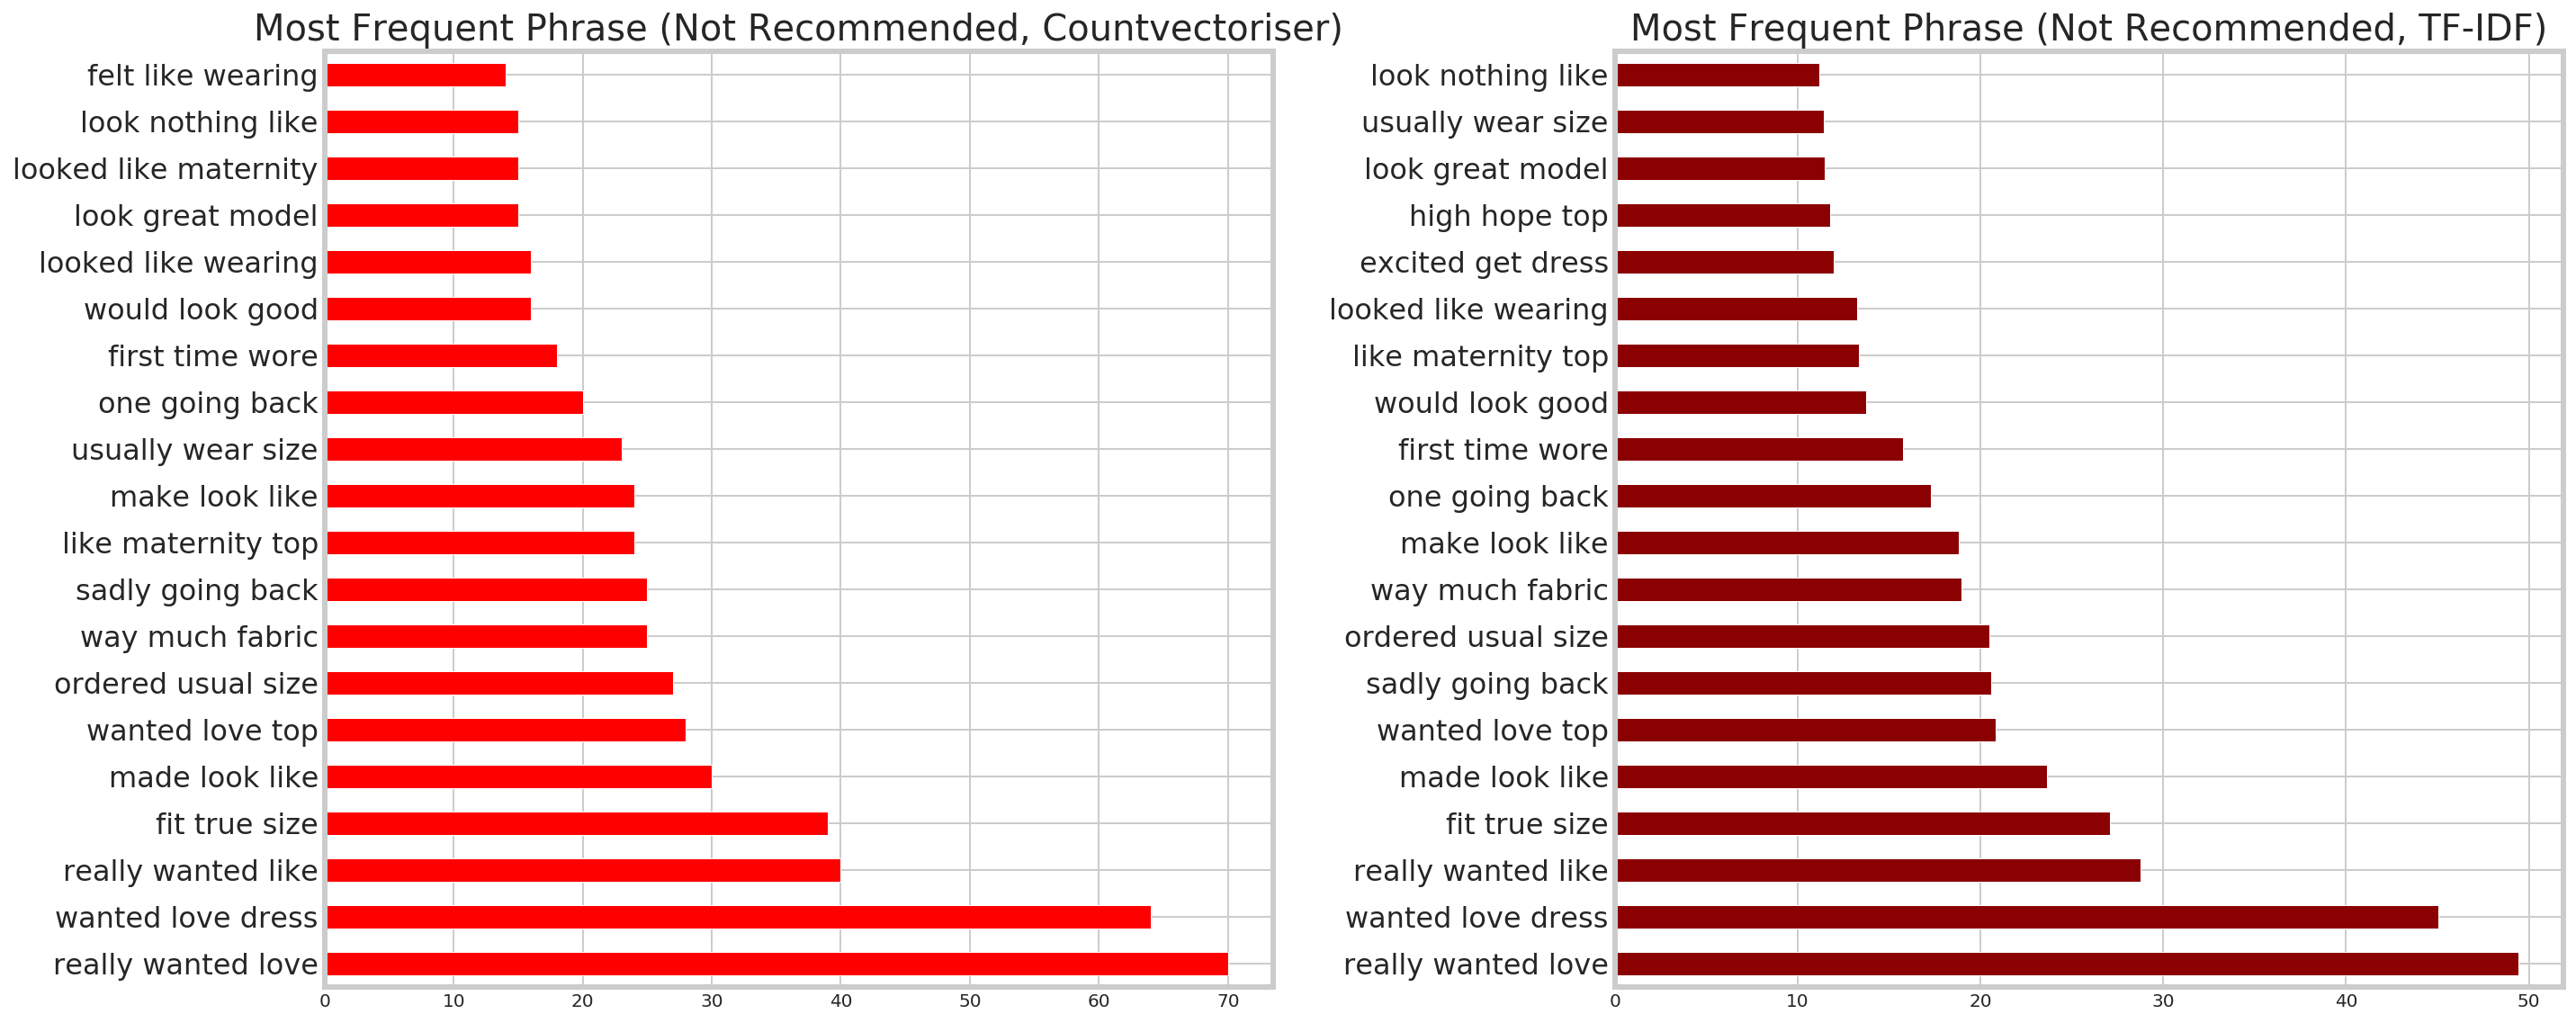

In [29]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=tri_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='red')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Phrase (Not Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=tri_0_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkred')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Phrase (Not Recommended, TF-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

## Unigram + Bigram + Trigram (BASE SAMPLE)

In [30]:
# Bag of Words
cvec13=CountVectorizer(ngram_range=(1,3),min_df=2,max_features=1000)
X13_cvec=cvec13.fit_transform(X_models)
X13cvec=pd.DataFrame(X13_cvec.todense(),columns=cvec13.get_feature_names())
X13cvec_train , X13cvec_test , y13cvec_train , y13cvec_test = train_test_split(X13cvec,y_models,test_size=0.3,random_state=0,stratify=y_models)
    
# TFIDF
tf13=TfidfVectorizer(ngram_range=(1,3),min_df=2,max_features=1000)
X13_tf=tf13.fit_transform(X_models)
X13tf=pd.DataFrame(X13_tf.todense(),columns=tf13.get_feature_names())
X13tf_train , X13tf_test , y13tf_train , y13tf_test = train_test_split(X13tf,y_models,test_size=0.3,random_state=0,stratify=y_models)

X13_cvec_base=[X13cvec_train , X13cvec_test , y13cvec_train , y13cvec_test]
X13_tfidf_base=[X13tf_train , X13tf_test , y13tf_train , y13tf_test]

In [31]:
# save the model to disk
filename = 'X13_cvec_base.sav'
pickle.dump(X13_cvec_base, open(filename, 'wb'))

filename = 'X13_tfidf_base.sav'
pickle.dump(X13_tfidf_base, open(filename, 'wb'))

In [33]:
ngram13_cvec=pd.concat([X13cvec,y_models],axis=1)
ngram13_1_cvec=ngram13_cvec[ngram13_cvec.recommended_ind==1].drop(columns='recommended_ind')
ngram13_0_cvec=ngram13_cvec[ngram13_cvec.recommended_ind==0].drop(columns='recommended_ind')

ngram13_tfidf=pd.concat([X13tf,y_models],axis=1)
ngram13_1_tfidf=ngram13_tfidf[ngram13_tfidf.recommended_ind==1].drop(columns='recommended_ind')
ngram13_0_tfidf=ngram13_tfidf[ngram13_tfidf.recommended_ind==0].drop(columns='recommended_ind')

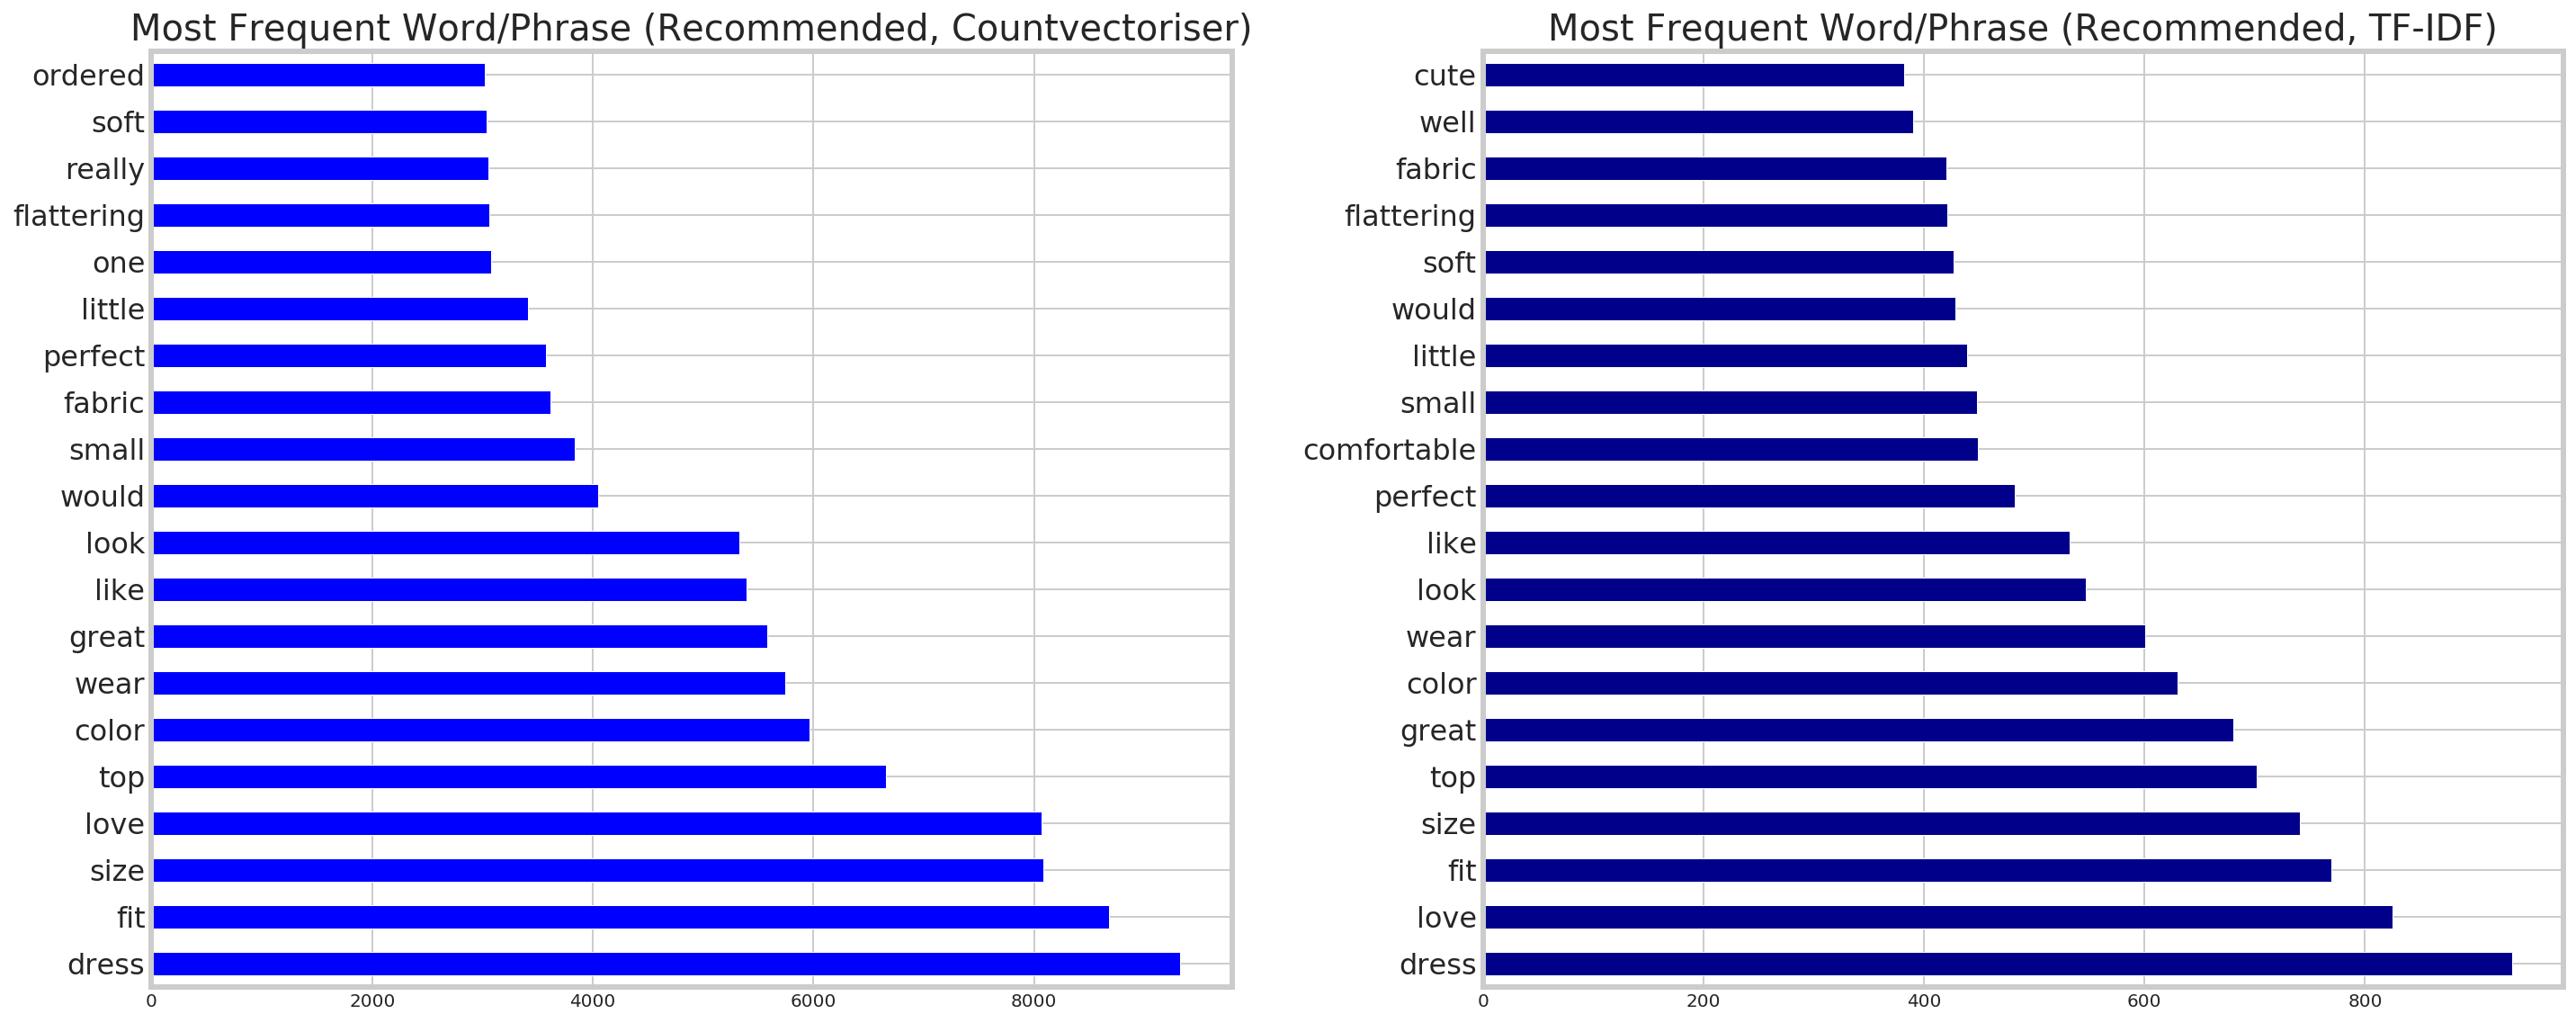

In [34]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=ngram13_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='blue')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Word/Phrase (Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=ngram13_1_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkblue')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Word/Phrase (Recommended, TF-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

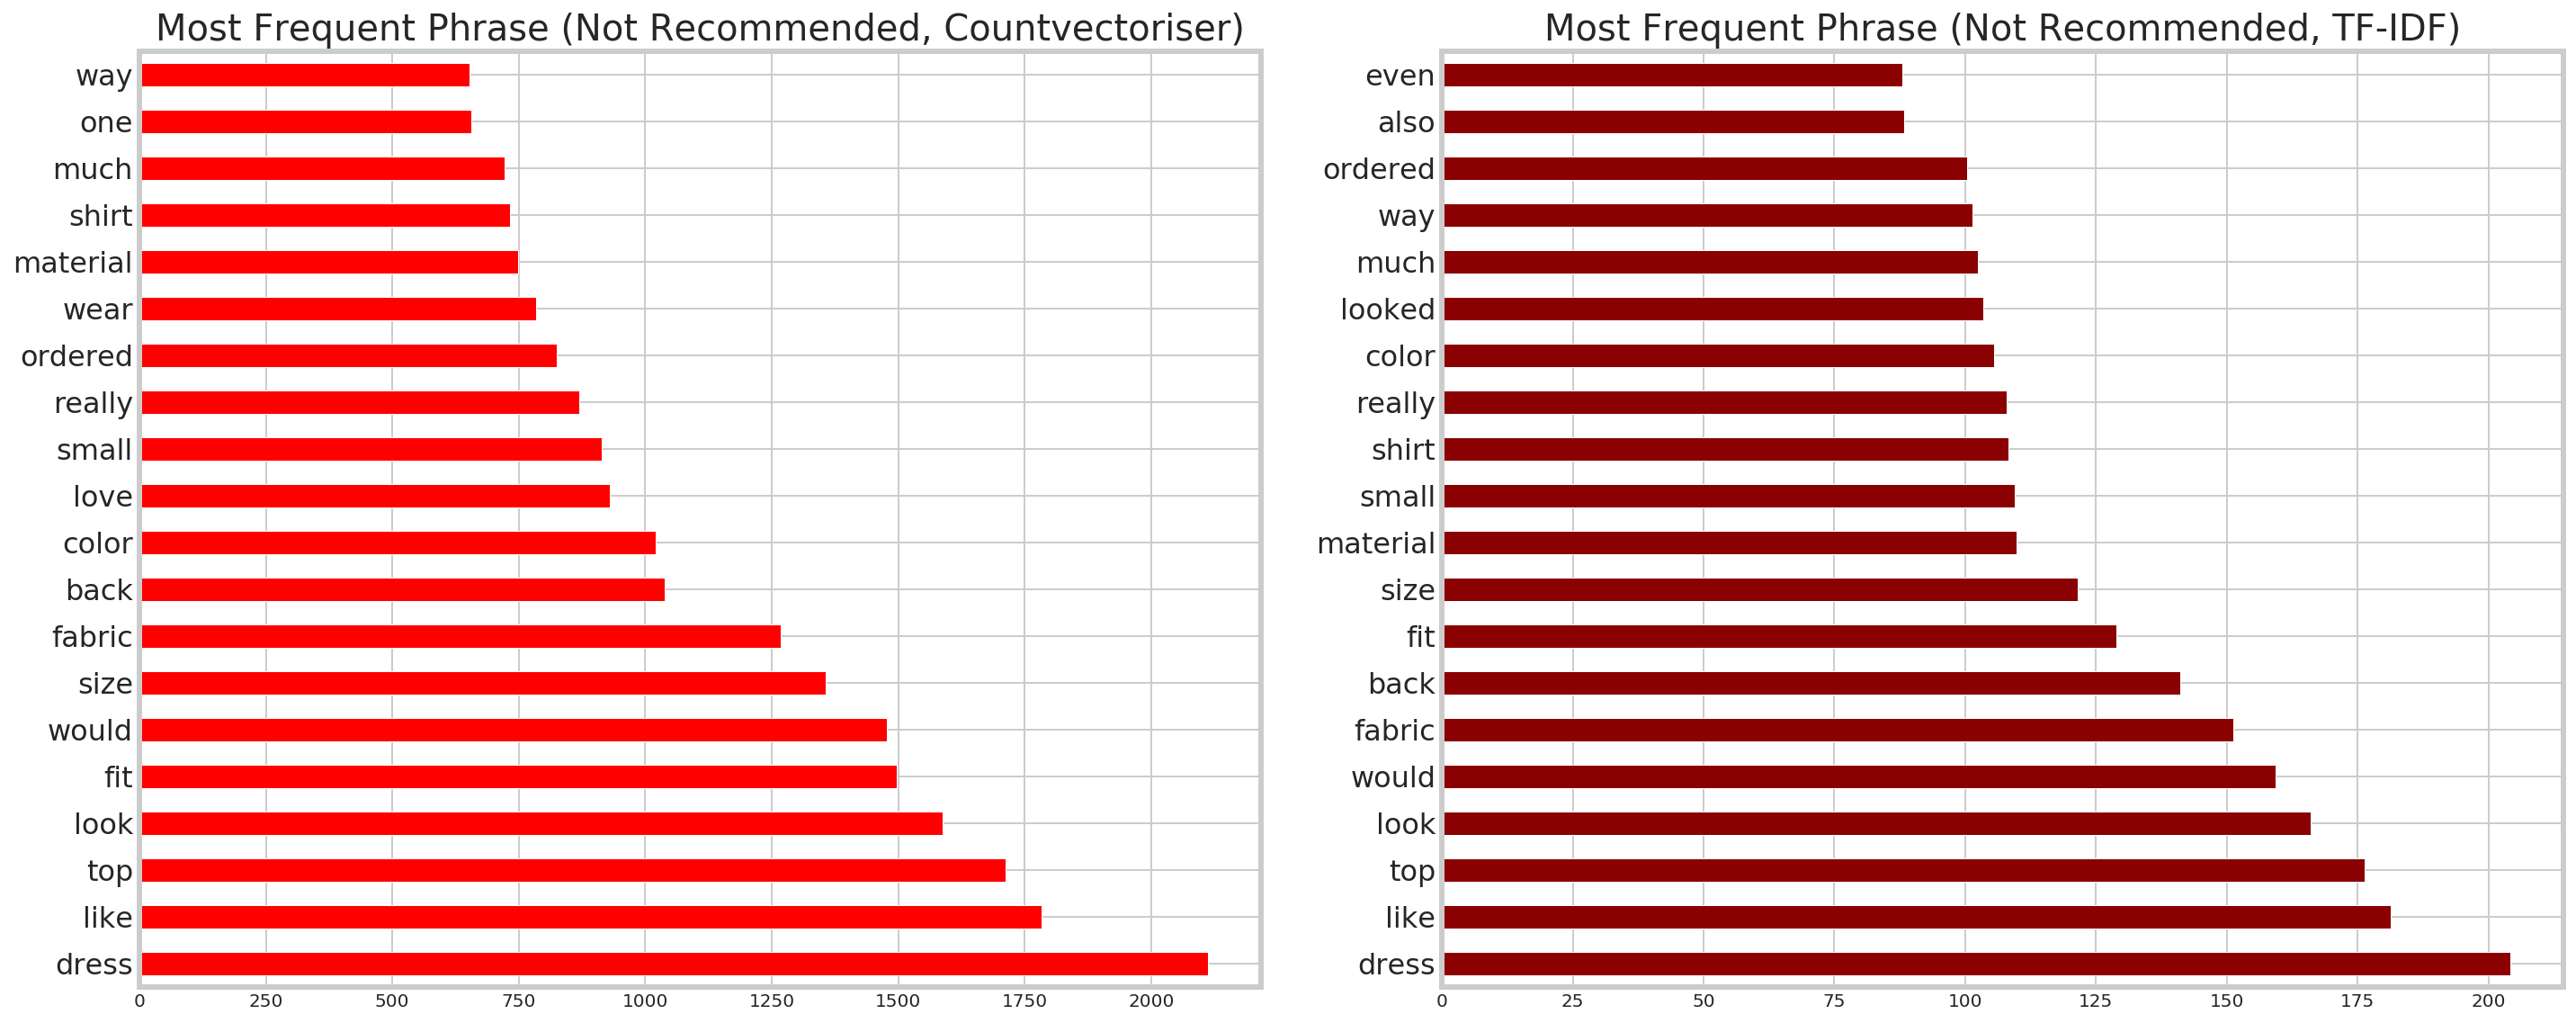

In [35]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=ngram13_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='red')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Phrase (Not Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=ngram13_0_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkred')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Phrase (Not Recommended, TF-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

## Trigram + 4 Ngrams

In [36]:
# Bag of Words
cvec34=CountVectorizer(ngram_range=(3,4),min_df=2,max_features=1000)
X34_cvec=cvec34.fit_transform(X_models)
X34cvec=pd.DataFrame(X34_cvec.todense(),columns=cvec34.get_feature_names())
X34cvec_train , X34cvec_test , y34cvec_train , y34cvec_test = train_test_split(X34cvec,y_models,test_size=0.3,random_state=0,stratify=y_models)
    
# TFIDF
tf34=TfidfVectorizer(ngram_range=(3,4),min_df=2,max_features=1000)
X34_tf=tf34.fit_transform(X_models)
X34tf=pd.DataFrame(X34_tf.todense(),columns=tf34.get_feature_names())
X34tf_train , X34tf_test , y34tf_train , y34tf_test = train_test_split(X34tf,y_models,test_size=0.3,random_state=0,stratify=y_models)

X34_cvec_base=[X34cvec_train , X34cvec_test , y34cvec_train , y34cvec_test]
X34_tfidf_base=[X34tf_train , X34tf_test , y34tf_train , y34tf_test]

In [37]:
# save the model to disk
filename = 'X34_cvec_base.sav'
pickle.dump(X34_cvec_base, open(filename, 'wb'))

filename = 'X34_tfidf_base.sav'
pickle.dump(X34_tfidf_base, open(filename, 'wb'))

In [40]:
ngram34_cvec=pd.concat([X34cvec,y_models],axis=1)
ngram34_1_cvec=ngram34_cvec[ngram34_cvec.recommended_ind==1].drop(columns='recommended_ind')
ngram34_0_cvec=ngram34_cvec[ngram34_cvec.recommended_ind==0].drop(columns='recommended_ind')

ngram34_tfidf=pd.concat([X34tf,y_models],axis=1)
ngram34_1_tfidf=ngram34_tfidf[ngram34_tfidf.recommended_ind==1].drop(columns='recommended_ind')
ngram34_0_tfidf=ngram34_tfidf[ngram34_tfidf.recommended_ind==0].drop(columns='recommended_ind')

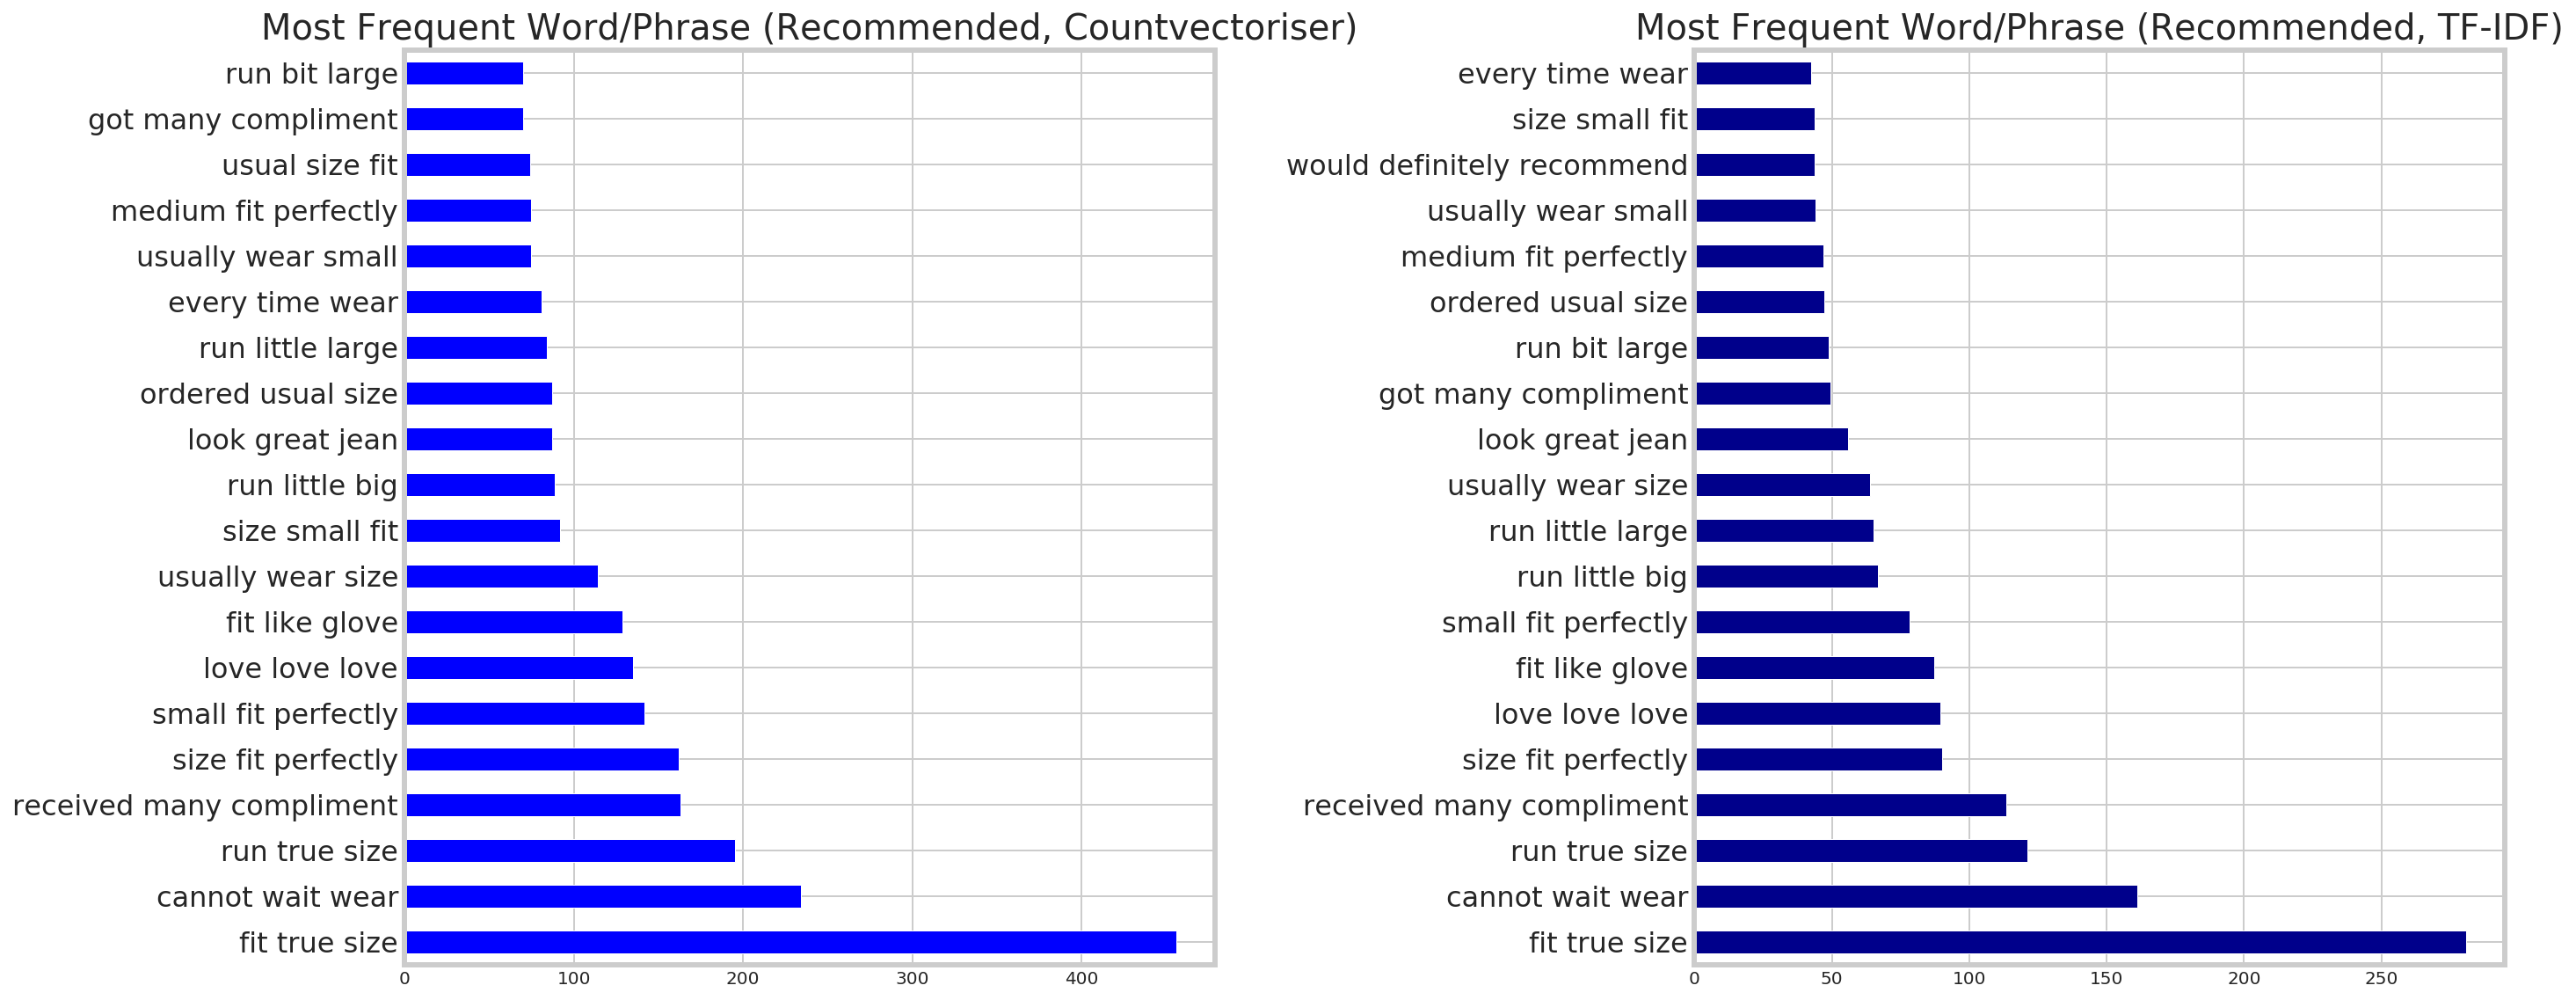

In [41]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=ngram34_1_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='blue')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Word/Phrase (Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=ngram34_1_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkblue')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Word/Phrase (Recommended, TF-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

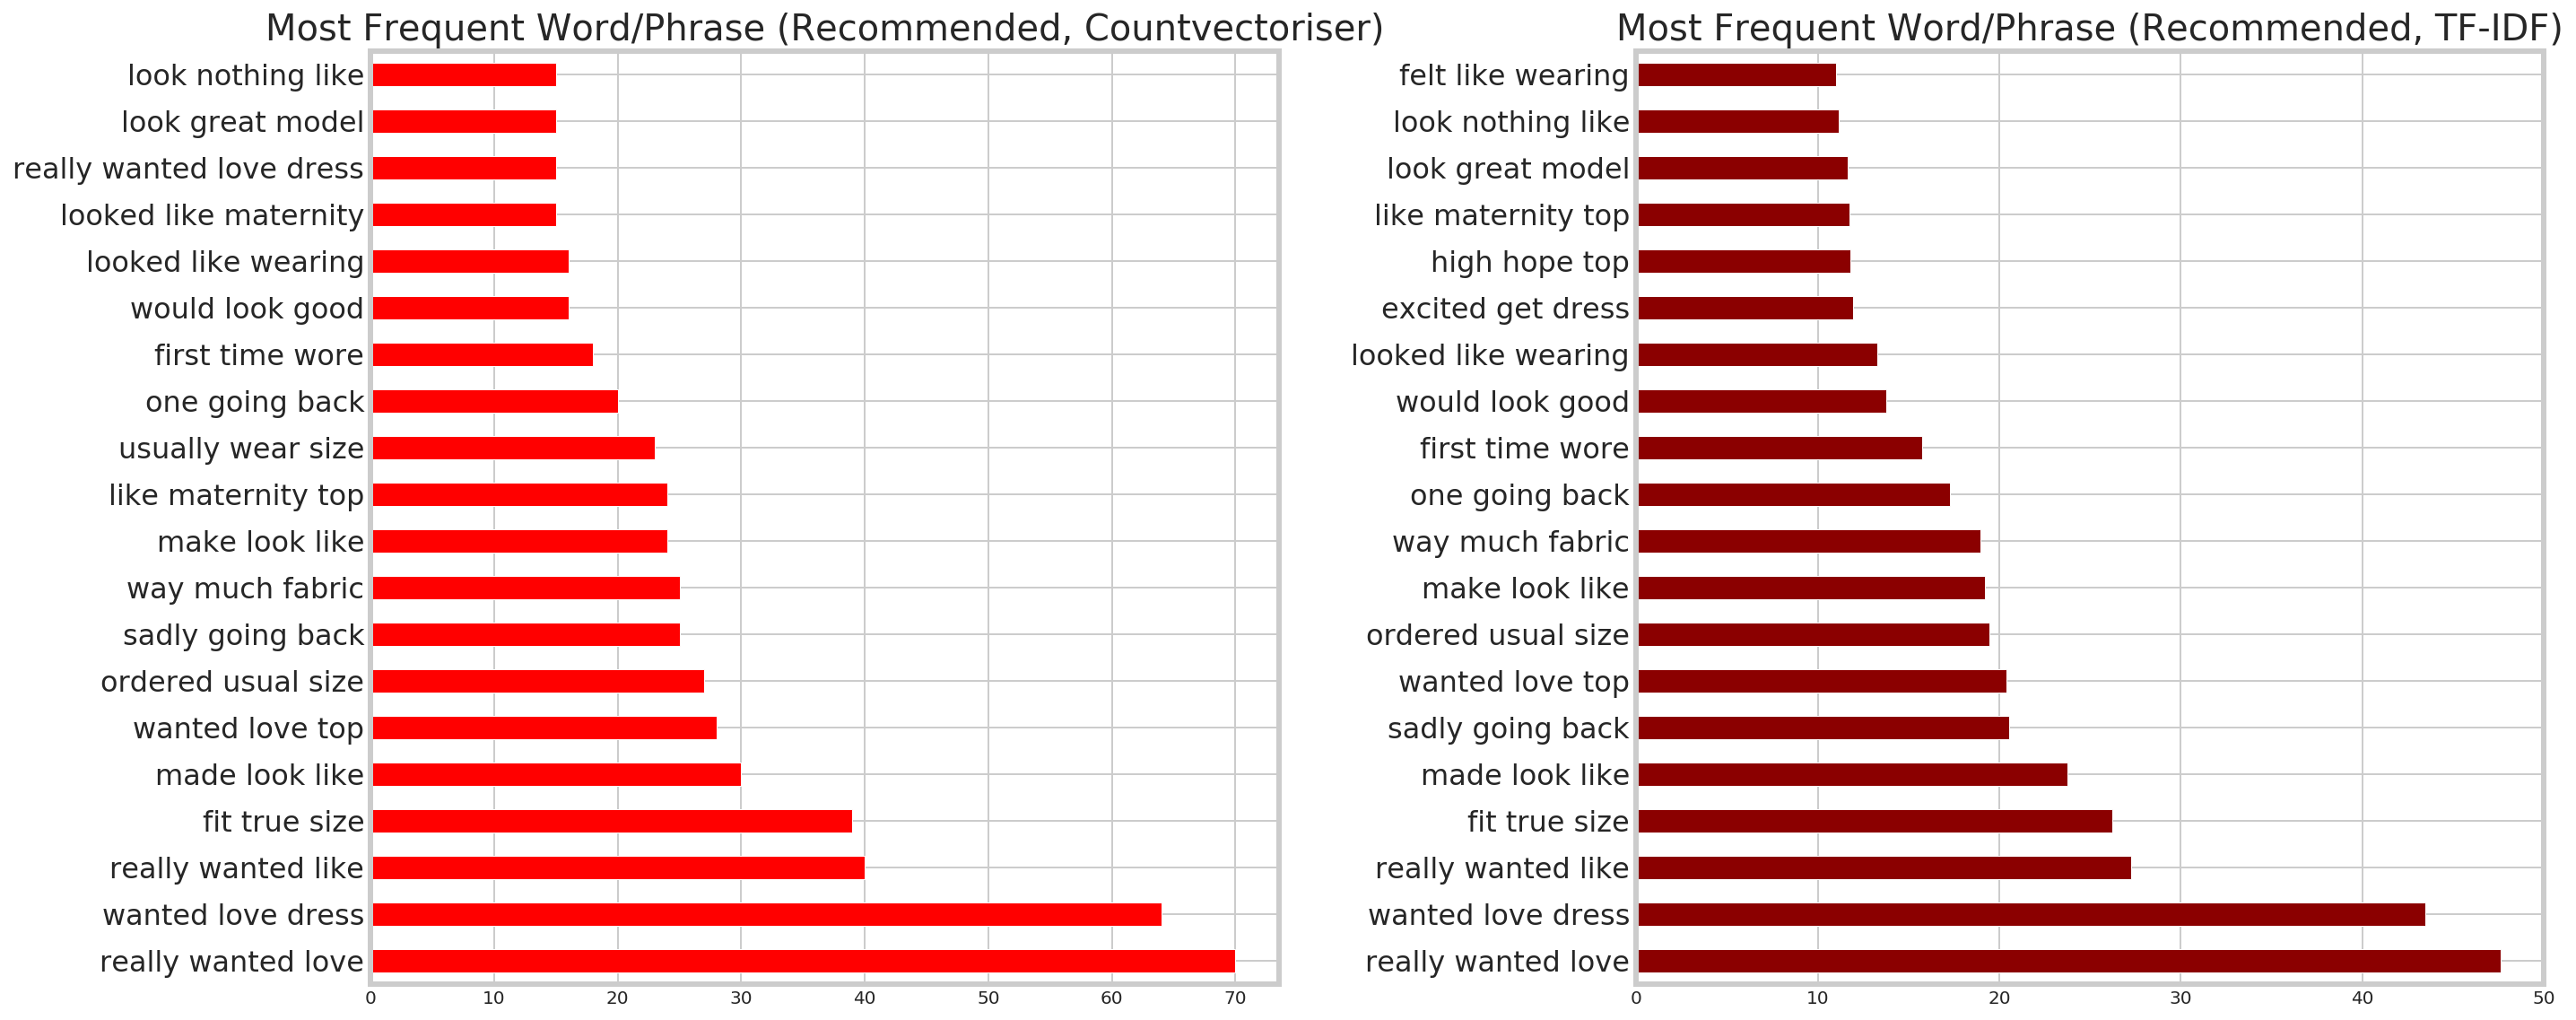

In [42]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

ax[0]=ngram34_0_cvec.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0],color='red')
# ax[0][0].set_xlabel('Word Type',fontsize=16)
# ax[0][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[0].set_title('Most Frequent Word/Phrase (Recommended, Countvectoriser)',fontsize=20)
labels=ax[0].get_yticklabels()
ax[0].set_yticklabels(labels,rotation=0,fontsize=16)

ax[1]=ngram34_0_tfidf.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='darkred')
# ax[1][0].set_xlabel('Word Type',fontsize=16)
# ax[1][0].set_ylabel('Frequency of Word Use in Recommended Items',fontsize=16)
ax[1].set_title('Most Frequent Word/Phrase (Recommended, TF-IDF)',fontsize=20)
labels=ax[1].get_yticklabels()
ax[1].set_yticklabels(labels,rotation=0,fontsize=16)
plt.tight_layout()
plt.show()

In [44]:
# fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))

# ax[0]=ngram34_1.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[0])
# ax[0].set_xlabel('Word/Term Type',fontsize=16)
# ax[0].set_ylabel('Frequency of Word/Term Use in Recommended Items',fontsize=16)
# ax[0].set_title('Most Frequency Word/Term in Recommended Items',fontsize=18)
# # labels=ax[0].get_xticklabels()
# # ax[0].set_xticklabels(labels,rotation=70,fontsize=14)

# ax[1]=ngram34_0.sum().sort_values(ascending=False).head(20).plot.barh(ax=ax[1],color='red')
# ax[1].set_xlabel('Term Type',fontsize=16)
# ax[1].set_ylabel('Frequency of Word/Term Use in Not Recommended Items',fontsize=16)
# ax[1].set_title('Most Frequency Used Word/Term in Not Recommended Items',fontsize=18)
# # labels=ax[1].get_xticklabels()
# # ax[1].set_xticklabels(labels,rotation=70,fontsize=14)
# plt.tight_layout()
# plt.show()

## Creating Word2Vec Model
https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa

In [52]:
sentences=df_clean['tokens'].values

In [53]:
feature_size=100
min_word_count=40
num_workers=4
context=10

w2v_model=Word2Vec(sentences,min_count=min_word_count,size=feature_size, window=context, workers=num_workers,sg=0)


In [54]:
w2v_model.init_sims(replace=True)

In [55]:
w2v_model.wv.syn0.shape

(1447, 100)

In [56]:
## creating a function to calculate the total word vector score per sentence
w2v_model.wv.index2word

['dress',
 'fit',
 'size',
 'love',
 'top',
 'like',
 'color',
 'look',
 'wear',
 'great',
 'would',
 'fabric',
 'small',
 'really',
 'ordered',
 'little',
 'perfect',
 'one',
 'flattering',
 'well',
 'soft',
 'back',
 'shirt',
 'comfortable',
 'cute',
 'nice',
 'bought',
 'beautiful',
 'bit',
 'large',
 'material',
 'sweater',
 'much',
 'length',
 'jean',
 'run',
 'also',
 'work',
 'petite',
 'long',
 'short',
 'got',
 'could',
 'waist',
 'medium',
 'quality',
 'skirt',
 'think',
 'pretty',
 'even',
 'retailer',
 'store',
 'pant',
 'make',
 'feel',
 'tried',
 'get',
 'usually',
 'sleeve',
 'way',
 'good',
 'made',
 'cut',
 'big',
 'see',
 'style',
 'black',
 'still',
 'right',
 'super',
 'true',
 'online',
 'design',
 'summer',
 'wearing',
 'white',
 'purchased',
 'arm',
 'however',
 'fall',
 'tight',
 'enough',
 'perfectly',
 'model',
 'shoulder',
 'time',
 'sale',
 'bottom',
 'definitely',
 'jacket',
 'front',
 'blue',
 'looked',
 'detail',
 'though',
 'price',
 'side',
 'person',
 

In [57]:
## visualise embeddings
words=w2v_model.wv.index2word
len(words)

1447

In [58]:
wvs=w2v_model.wv[words]


In [59]:
w2v_model['bad'].shape

(100,)

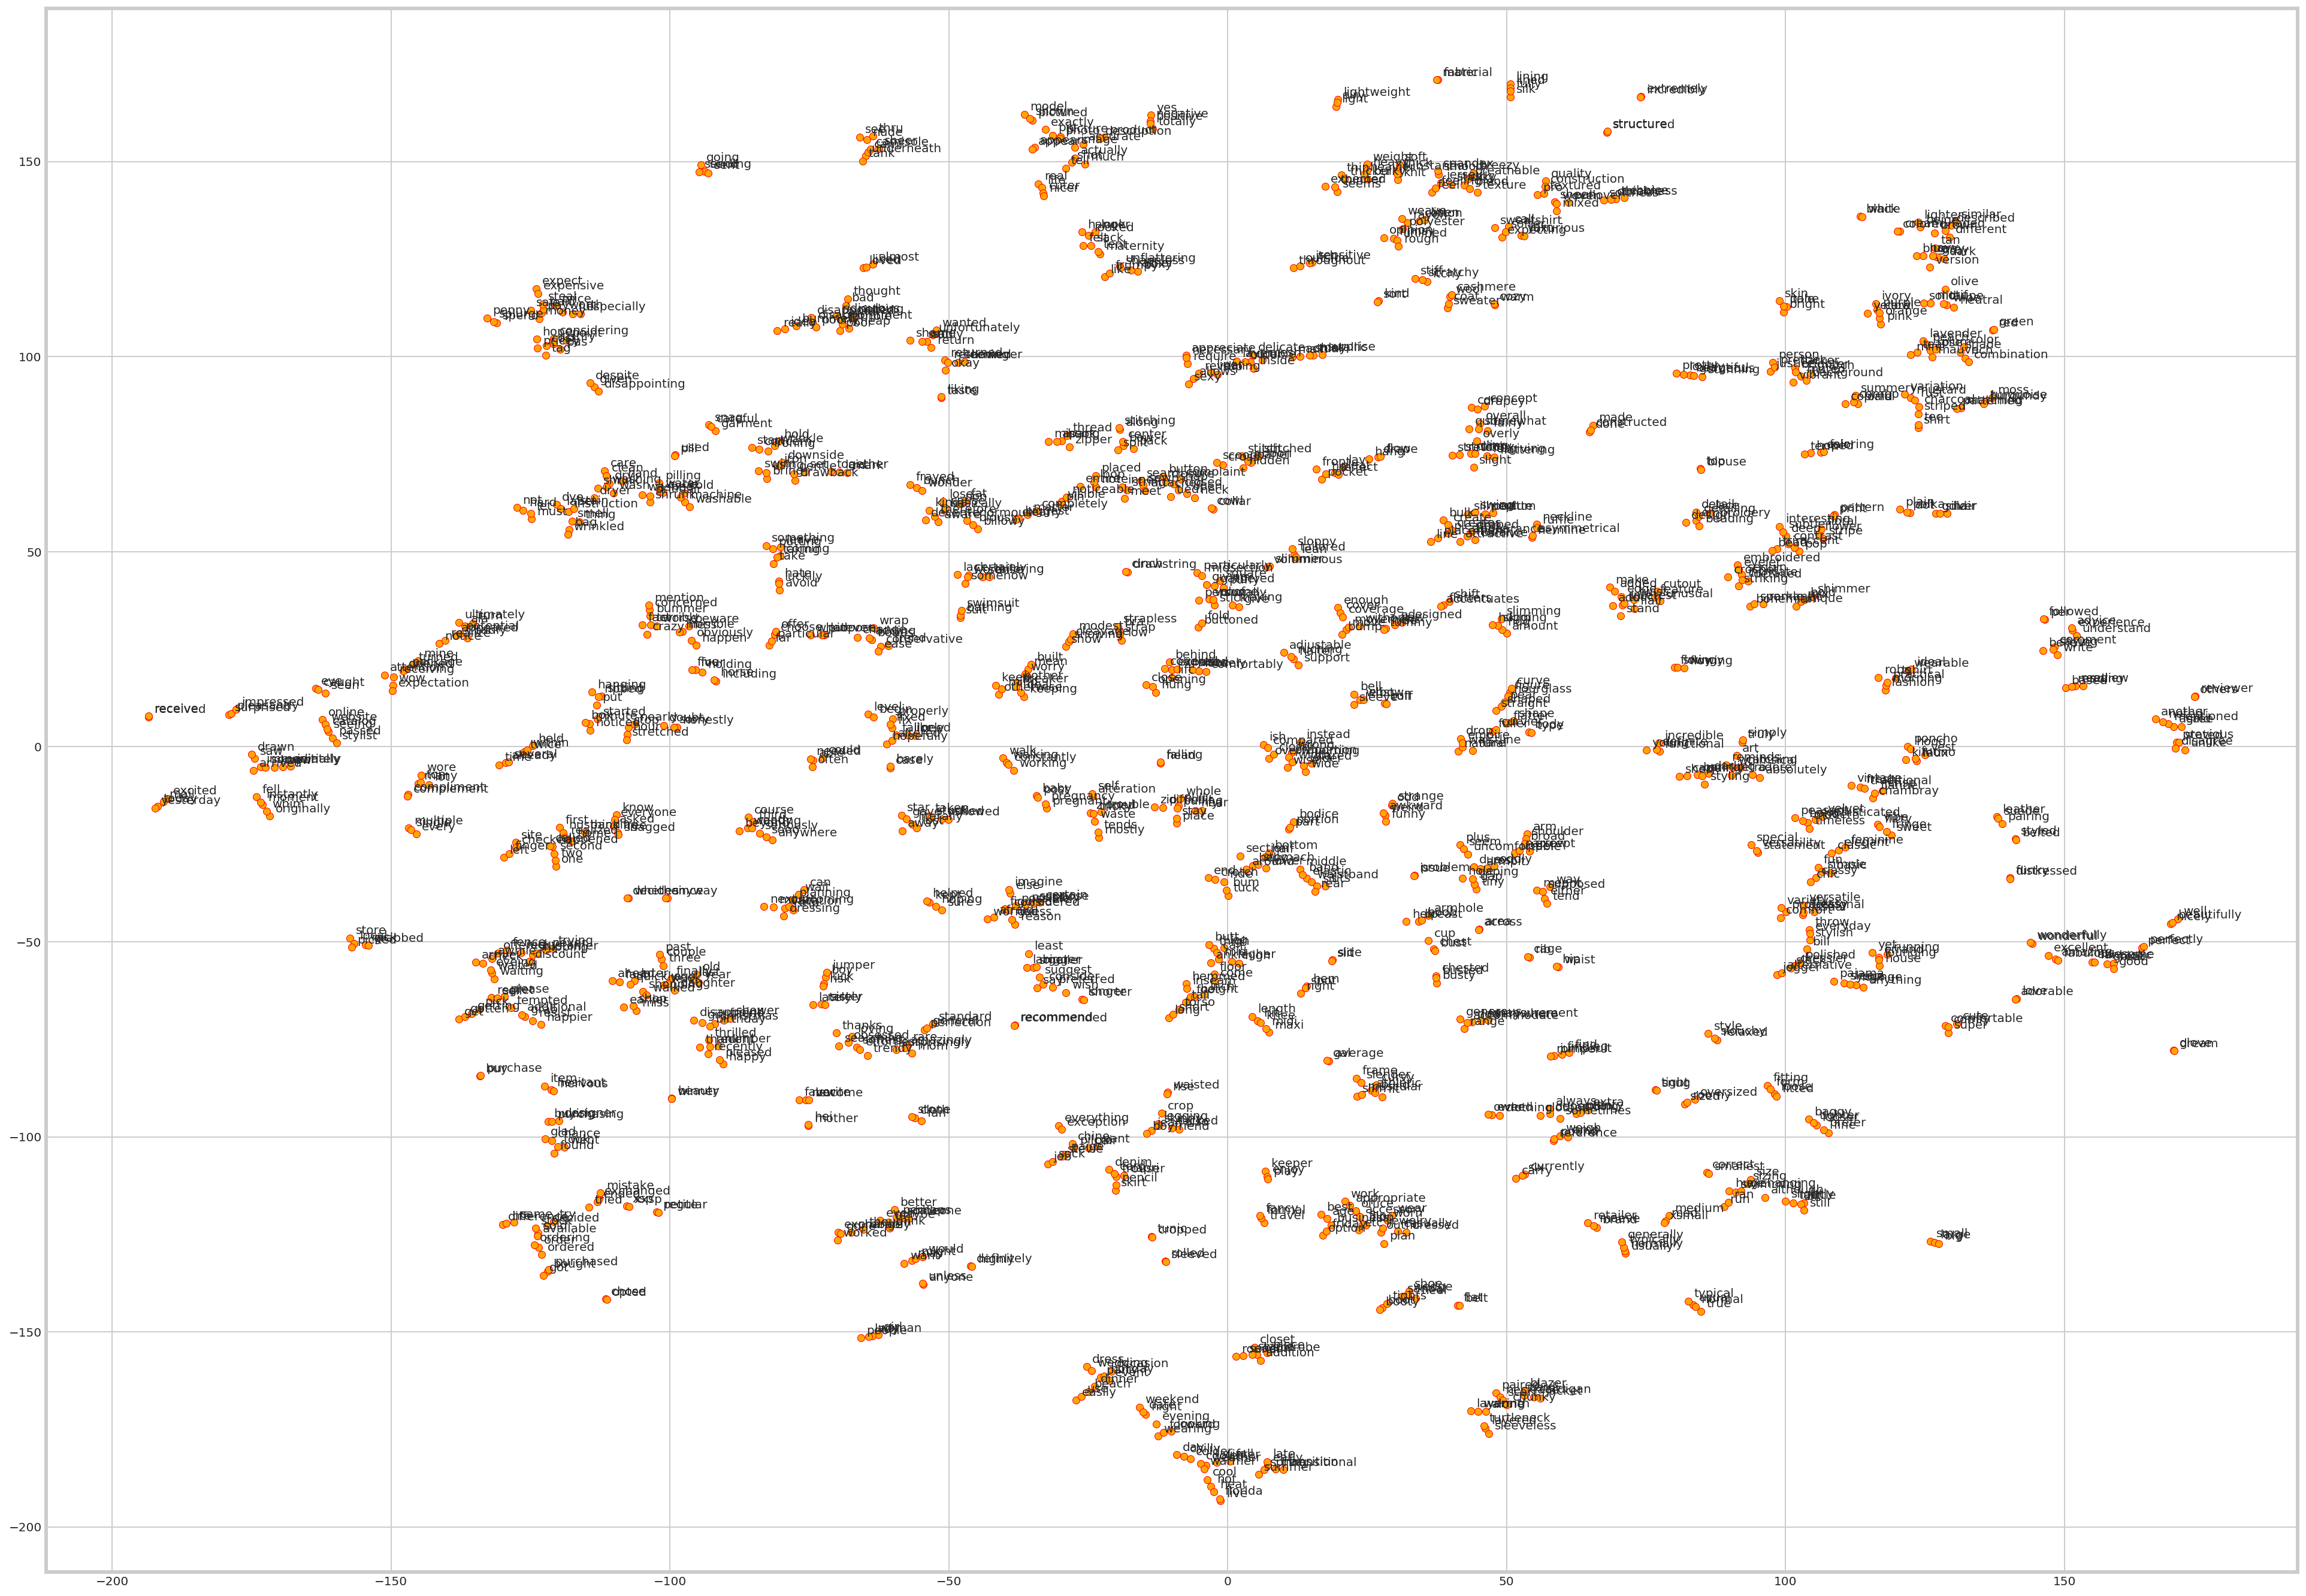

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(30, 24))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [61]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=sentences, model=w2v_model,
                                             num_features=100)
word2vec=pd.DataFrame(w2v_feature_array)

In [62]:
word2vec.shape
Xw2v=word2vec.copy()

In [63]:
X_w2v_train , X_w2v_test , yw2v_train , yw2v_test = train_test_split(Xw2v,y_models,test_size=0.3,random_state=0,stratify=y_models)

In [64]:
X_w2v_train

0         1         2         3         4         5         6   \
17123 -0.064404 -0.014943  0.051882  0.055153 -0.027214 -0.007178 -0.067412   
11871 -0.022830 -0.009916  0.007704 -0.068569 -0.005799  0.009450  0.025448   
22022 -0.023121 -0.007015  0.013937 -0.033029  0.020990 -0.003216  0.049214   
6193   0.042346  0.031424  0.046821 -0.060626  0.061650 -0.034963  0.052526   
20074 -0.025879  0.026185  0.023499  0.007951  0.029810 -0.006454  0.028921   
2769   0.068902 -0.121915 -0.007758  0.007263 -0.052059 -0.069187 -0.087274   
22058 -0.001115 -0.018230 -0.021148 -0.054560  0.013138 -0.006340  0.024182   
4001   0.003266 -0.045973  0.014950 -0.010788  0.013025 -0.012263 -0.012535   
11705 -0.054485  0.002469  0.020962 -0.032181 -0.002588 -0.014253  0.004159   
5268  -0.070687 -0.028612  0.013324 -0.005896 -0.003547 -0.011837 -0.034263   
9142  -0.032303 -0.005052  0.030251 -0.026468 -0.030334 -0.000819 -0.041830   
4282  -0.026764  0.071610  0.029862  0.011560  0.009660  0.054692  0.026455   
12536 -0.053844 -0.050575  0.010182 -0.018894  0.025444 -0.024266  0.042268   
16697  0.035337 -0.031185 -0.040828 -0.122035 -0.003055 -0.006570  0.041939   
19404 -0.016570  0.001903  0.044543  0.001412 -0.021492 -0.023499 -0.048384   
14315 -0.064530 -0.024519  0.005098 -0.075167 -0.030095 -0.006154 -0.032774   
11059  0.024453 -0.014055 -0.004072 -0.017386  0.030823  0.015950  0.016493   
11954 -0.095898  0.023993  0.075113 -0.024852 -0.064847 -0.038101 -0.016479   
8025  -0.044915  0.003077  0.018648 -0.011593  0.022881  0.012765  0.002008   
8321   0.034198  0.022604 -0.030996  0.017957  0.080629  0.032972  0.043515   
4122  -0.012756 -0.005372 -0.058352  0.003879  0.058789  0.070592  0.002232   
14256 -0.025645 -0.072218  0.004721 -0.001908  0.019314 -0.023061  0.019375   
17855 -0.022024 -0.017234 -0.016012 -0.032013  0.021866 -0.011563  0.007995   
15727 -0.041055 -0.000529 -0.042144 -0.055131  0.024065  0.057742  0.065411   
18468 -0.024531  0.091181  0.065973 -0.002828  0.064945 -0.001332  0.031735   
20950 -0.040849 -0.030297 -0.002281 -0.017063 -0.007956 -0.025355 -0.015824   
10380  0.026421 -0.018716 -0.013125 -0.010776  0.007035  0.021802 -0.046610   
18836 -0.010267 -0.017837 -0.002028 -0.032754  0.059250  0.013372  0.025465   
20425 -0.002850 -0.034118 -0.019696 -0.085250  0.015040 -0.012455  0.018390   
2352  -0.028895  0.082956  0.097189 -0.059943  0.030572 -0.059301  0.069639   
...         ...       ...       ...       ...       ...       ...       ...   
1692  -0.073207  0.009903  0.059243 -0.001144 -0.000040 -0.040264  0.012211   
16325  0.000140 -0.013483  0.047136 -0.016259  0.034195 -0.036696  0.021793   
20873 -0.006012  0.006304  0.027399 -0.030131  0.018507 -0.002684  0.026143   
16779  0.019386 -0.032613  0.001232 -0.022443 -0.005225 -0.004182 -0.013203   
8266  -0.052091  0.077140  0.049160  0.041565  0.041323 -0.013238 -0.015092   
17763 -0.051073 -0.003005  0.027838 -0.037154 -0.026144 -0.021782 -0.001169   
14122 -0.005120 -0.026598  0.000531 -0.098087 -0.013976 -0.024195  0.021875   
16376  0.061137  0.016256  0.010271 -0.023649  0.044345 -0.014914  0.049209   
3581  -0.017674  0.026543  0.028729  0.001201  0.053919  0.057982  0.024443   
8000   0.015807  0.068111  0.067579  0.014297  0.023424 -0.019303 -0.010805   
8530  -0.047834 -0.030041  0.029099 -0.029260  0.006411 -0.048666  0.027962   
1158  -0.021071  0.067085  0.052030 -0.030893  0.046049  0.014654  0.024051   
21928  0.007327 -0.002914 -0.040953 -0.048387  0.038695  0.027098  0.006408   
10207 -0.069367 -0.056921 -0.032030  0.010870 -0.019218 -0.016024 -0.023962   
8636  -0.009400  0.013779  0.013323 -0.005982  0.014489  0.021634  0.006690   
22337 -0.022486 -0.103170  0.008841 -0.005335  0.034193  0.011711 -0.031993   
19349  0.022526 -0.044396 -0.004632 -0.034821  0.023592 -0.008563  0.017656   
18439 -0.004873  0.050907  0.045836 -0.012979  0.046873  0.011123  0.020498   
359    0.012773 -0.053692 -0.001722  0.005495  0.024211 -0.0530

In [65]:
X_w2v_base=[X_w2v_train , X_w2v_test , yw2v_train , yw2v_test]

In [66]:
# save the model to disk
filename = 'X_w2v_base.sav'
pickle.dump(X_w2v_base, open(filename, 'wb'))

In [67]:
# w2v_model.train(df_clean.tokenized,total_examples=len(df_clean.tokenized),epochs=10)

## Speech Tagging
https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/

In [68]:
df_clean.columns

Index(['review_text', 'review_text_clean', 'age', 'class_name',
       'recommended_ind', 'tokens'],
      dtype='object')

In [69]:
## Extracting tokens
from collections import Counter

tags_sentence=[]

for i in range(0, len(df_clean.review_text_clean)):
    tag=nltk.pos_tag(df_clean.tokens[i])
    
    tags=[]
    for j in range(0,len(tag)):
        tags.append(tag[j][1])
    
    tags_sentence.append(Counter(tags))


In [70]:
pos_tags=pd.DataFrame(tags_sentence).fillna(int(0))

In [71]:
pos_tags['tag_noun']=pos_tags['NN']+pos_tags['NNS']+pos_tags['NNP']+pos_tags['NNS']
pos_tags['tag_pron']=pos_tags['PRP']+pos_tags['PRP$']+pos_tags['WP']+pos_tags['WP$']
pos_tags['tag_verb']=pos_tags['VB']+pos_tags['VBD']+pos_tags['VBG']+pos_tags['VBN']+pos_tags['VBP']+pos_tags['VBZ']
pos_tags['tag_adj']=pos_tags['JJ']+pos_tags['JJR']+pos_tags['JJS']
pos_tags['tag_adv']=pos_tags['RB']+pos_tags['RBR']+pos_tags['RBS']+pos_tags['WRB']
pos_tags['tag_modal']=pos_tags['MD']
pos_tags['tag_conj']=pos_tags['IN']
pos_tags['tag_interj']=pos_tags['UH']

# Extracting out tags

word_tags=pos_tags[['tag_noun','tag_pron','tag_verb','tag_adj','tag_adv','tag_modal','tag_conj','tag_interj']]


In [72]:
word_tags.head()

tag_noun  tag_pron  tag_verb  tag_adj  tag_adv  tag_modal  tag_conj  \
0       1.0       0.0       0.0      3.0      1.0        0.0       0.0   
1       9.0       0.0       5.0      7.0      4.0        2.0       0.0   
2      15.0       0.0       5.0     18.0      6.0        1.0       1.0   
3       8.0       0.0       2.0      3.0      0.0        0.0       0.0   
4       7.0       0.0       3.0      4.0      1.0        0.0       1.0   

   tag_interj  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

## Sentiment Analysis of Reviews 


In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [74]:
sa=SentimentIntensityAnalyzer()

### Evaluating Compound Score
positive sentiment: compound score >= 0.05 <br>
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)<br>
negative sentiment: compound score <= -0.05 <br>

In [75]:
neg_sent=[]
neu_sent=[]
pos_sent=[]
comp_sent=[]

for review in df_clean.review_text:
    scores=sa.polarity_scores(review)
    neg_sent.append(scores['neg'])
    neu_sent.append(scores['neu'])
    pos_sent.append(scores['pos'])
    comp_sent.append(scores['compound'])
#     print(review)
#     print(scores)
#     print(' ')

In [76]:
df_clean_sentiment=df_clean.copy()
df_clean_sentiment['neg_sent']=neg_sent
df_clean_sentiment['neu_sent']=neu_sent
df_clean_sentiment['pos_sent']=pos_sent
df_clean_sentiment['comp_sent']=comp_sent

In [77]:
df_clean_sentiment.head()

review_text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                   review_text_clean  age class_name  \
0        absolutely wonderful silky sexy comfortable   33  Intimates   
1  love dress sooo pretty happened find store gla...   34    Dresses   
2  high hope dress really wanted work initially o...   60    Dresses   
3  love love love jumpsuit fun flirty fabulous ev...   50      Pants   
4  shirt flattering due adjustable front tie perf...   47    Blouses   

   recommended_ind                                             tokens  \
0                1  [absolutely, wonderful, silky, sexy, comfortable]   
1                1  [love, dress, sooo, pretty, happened, find, st...   
2                0  [high, hope, dress, really, wanted, work, init...   
3                1  [love, love, love, jumpsuit, fun, flirty, fabu...   
4                1  [shirt, flattering, due, adjustable, front, ti...   

   neg_sent  neu_sent  pos_sent  comp_sent  
0     0.000     0.272     0.728     0.8932  
1     0.000     0.664     0.336     0.9729  
2     0.027     0.792     0.181     0.9427  
3     0.226     0.340     0.434     0.5727  
4     0.000     0.700     0.300     0.9291

### Most Positive, Negative, and Neutral Review

In [78]:
df_clean_sentiment.sort_values('pos_sent',ascending=False,inplace=True)
for i in range (0,2):
    print(df_clean_sentiment['review_text'].values[i])
    print('Positive Score {}'.format(df_clean_sentiment['pos_sent'].values[i]))
    print('-'*70)

Great fit
Positive Score 1.0
----------------------------------------------------------------------
Adorable dress, amazing fit!
Positive Score 0.907
----------------------------------------------------------------------


In [79]:
df_clean_sentiment.sort_values('neg_sent',ascending=False,inplace=True)
for i in range (0,2):
    print(df_clean_sentiment['review_text'].values[i])
    print('Negative Score {}'.format(df_clean_sentiment['neg_sent'].values[i]))
    print('-'*70)

Awful color, horribly wrinkled and just a mess...so disappointed
Negative Score 0.655
----------------------------------------------------------------------
Low waisted, weird liner.
Negative Score 0.655
----------------------------------------------------------------------


In [80]:
df_clean_sentiment.sort_values('neu_sent',ascending=False,inplace=True)
for i in range (0,2):
    print(df_clean_sentiment['review_text'].values[i])
    print('Neutral Score {}'.format(df_clean_sentiment['neu_sent'].values[i]))
    print('-'*70)

A bit wide in the torso, but the detail at the bottom of shirt makes up for it.
Neutral Score 1.0
----------------------------------------------------------------------
I tried this on in my regular size and a size up. just didn't work in either. the attached slip bunched underneath and the material was rough. i did not purchase it.
Neutral Score 1.0
----------------------------------------------------------------------


### Naive Bayes

In [81]:
nb=BernoulliNB()

### Unigram

In [82]:
nb.fit(X1cvec_train,y1cvec_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
scores_nb=cross_val_score(nb,X1cvec_train,y1cvec_train,cv=5)
print(scores_nb)
print('model score : {}'.format(np.mean(scores_nb)))
print('base model : {}'.format(np.mean(y1cvec_train)))

[0.87693279 0.86647727 0.8604798  0.87243448 0.87496053]
model score : 0.8702569736252957
base model : 0.8187385567270661


In [84]:
score_nb_test=nb.score(X1cvec_test,y1cvec_test)
print('model score : {}'.format(score_nb_test))

model score : 0.8747974664899102


In [85]:
## Finding the probabilities for individual words that would lead to a recommendation or not
log_prob=nb.feature_log_prob_

In [86]:
recommend=np.exp(log_prob[1])
not_recommend=np.exp(log_prob[0])
diff_recommend=recommend-not_recommend

In [87]:
word_prob=pd.DataFrame({'recommend_prob':recommend,'not_recommend':not_recommend,'word':X1cvec_train.columns,'diff_recommend':diff_recommend})

### Words that would predict Recommendation

In [88]:
word_prob.sort_values('diff_recommend',ascending=False).head(10)

recommend_prob  not_recommend         word  diff_recommend
478        0.358134       0.191786         love        0.166349
356        0.258134       0.117299        great        0.140835
598        0.173246       0.043857      perfect        0.129389
161        0.149807       0.040376  comfortable        0.109431
949        0.265690       0.170553         wear        0.095137
774        0.159291       0.068918         soft        0.090373
752        0.318967       0.238427         size        0.080540
306        0.382806       0.303167          fit        0.079639
419        0.110640       0.031674         jean        0.078966
465        0.157286       0.081448       little        0.075838

### Words that would predict No Recommendation

In [89]:
word_prob.sort_values('diff_recommend',ascending=True).head(10)

recommend_prob  not_recommend           word  diff_recommend
53         0.110486       0.222068           back       -0.111582
985        0.187741       0.292029          would       -0.104288
457        0.239322       0.342847           like       -0.103526
471        0.038242       0.133310         looked       -0.095068
225        0.012028       0.091890   disappointed       -0.079862
281        0.172629       0.252001         fabric       -0.079372
940        0.031226       0.108249         wanted       -0.077023
948        0.067849       0.143056            way       -0.075207
913        0.015806       0.083188  unfortunately       -0.067383
491        0.104009       0.166029       material       -0.062019

##  Additional Features

### No. of Words

In [90]:
num_words=[len(sentence.split()) for sentence in df_clean.review_text]

### No of Letters

In [93]:
num_letters=[len(sentence.replace(' ','')) for sentence in df_clean.review_text]

### Average Letters per Word

In [96]:
ave_letters_word=np.array(num_letters)/np.array(num_words)

### Converting Categorical Features to Dummies Variables

In [99]:
class_name=pd.get_dummies(df_clean.class_name)

In [100]:
class_name.columns=class_name.columns.str.replace(' ','_').str.lower()

In [101]:
class_name.drop(columns='fine_gauge',inplace=True)

In [102]:
class_name.columns=class_name.columns.map(lambda x: 'class_'+x)

In [103]:
class_name.head()

class_blouses  class_casual_bottoms  class_chemises  class_dresses  \
0              0                     0               0              0   
1              0                     0               0              1   
2              0                     0               0              1   
3              0                     0               0              0   
4              1                     0               0              0   

   class_intimates  class_jackets  class_jeans  class_knits  class_layering  \
0                1              0            0            0               0   
1                0              0            0            0               0   
2                0              0            0            0               0   
3                0              0            0            0               0   
4                0              0            0            0               0   

   class_legwear  class_lounge  class_outerwear  class_pants  class_shorts  \
0              0             0                0            0             0   
1              0             0                0            0             0   
2              0             0                0            0             0   
3              0             0                0            1             0   
4              0             0                0            0             0   

   class_skirts  class_sleep  class_sweaters  class_swim  class_trend  
0             0            0               0           0            0  
1             0            0               0           0            0  
2             0            0               0           0            0  
3             0            0               0           0            0  
4             0            0               0           0            0

### Merging All Features

In [104]:
df_all=pd.DataFrame({'review_text': df_clean.review_text,
                    'review_text_cleaned' : df_clean.review_text_clean,
                     'age' : df_clean.age,
                     'num_words' : num_words,
                     'num_letters' : num_letters,
                     'ave_letters_word' : ave_letters_word,
                     'sent_neg' : neg_sent,
                     'sent_pos' : pos_sent,
                     'sent_neu' : neu_sent,
                     'sent_comp' : comp_sent,
                     'tag_noun' : word_tags['tag_noun'],
                     'tag_pron' : word_tags['tag_pron'],
                     'tag_verb' : word_tags['tag_verb'],
                     'tag_adj' : word_tags['tag_adj'],
                     'tag_adv' : word_tags['tag_adv'],
                     'tag_modal' : word_tags['tag_modal'],
                     'tag_conj' : word_tags['tag_conj'],
                     'tag_interj' : word_tags['tag_interj'],
                    })
df_all=pd.concat([df_all,class_name,df_clean.recommended_ind],axis=1)

In [105]:
df_all.head()

review_text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                 review_text_cleaned  age  num_words  \
0        absolutely wonderful silky sexy comfortable   33          8   
1  love dress sooo pretty happened find store gla...   34         62   
2  high hope dress really wanted work initially o...   60         98   
3  love love love jumpsuit fun flirty fabulous ev...   50         22   
4  shirt flattering due adjustable front tie perf...   47         36   

   num_letters  ave_letters_word  sent_neg  sent_pos  sent_neu  sent_comp  \
0           46          5.750000     0.000     0.728     0.272     0.8932   
1          237          3.822581     0.000     0.336     0.664     0.9729   
2          403          4.112245     0.027     0.181     0.792     0.9427   
3          103          4.681818     0.226     0.434     0.340     0.5727   
4          157          4.361111     0.000     0.300     0.700     0.9291   

   tag_noun  tag_pron  tag_verb  tag_adj  tag_adv  tag_modal  tag_conj  \
0       1.0       0.0       0.0      3.0      1.0        0.0       0.0   
1       9.0       0.0       5.0      7.0      4.0        2.0       0.0   
2      15.0       0.0       5.0     18.0      6.0        1.0       1.0   
3       8.0       0.0       2.0      3.0      0.0        0.0       0.0   
4       7.0       0.0       3.0      4.0      1.0        0.0       1.0   

   tag_interj  class_blouses  class_casual_bottoms  class_chemises  \
0         0.0              0                     0               0   
1         0.0              0                     0               0   
2         0.0              0                     0               0   
3         0.0              0                     0               0   
4         0.0              1                     0               0   

   class_dresses  class_intimates  class_jackets  class_jeans  class_knits  \
0              0                1              0            0            0   
1              1                0              0            0            0   
2              1                0              0            0            0   
3              0                0              0            0            0   
4              0                0              0            0            0   

   class_layering  class_legwear  class_lounge  class_outerwear  class_pants  \
0               0              0             0                0            0   
1               0              0             0                0            0   
2               0              0             0                0            0   
3               0              0             0                0            1   
4               0              0             0                0            0   

   class_shorts  class_skirts  class_sleep  class_sweaters  class_swim  \
0             0             0            0               0           0   
1             0             0            0               0           0   
2             0             0            0               0           0   
3             0             0            0               0           0   
4             0             0            0               0           0   

   class_trend  recommended_ind  
0            0                1  
1            0                1  
2            0                0  
3            0                1  
4            0                1

## DownSample

In [ ]:
# X_features=df_all.drop(columns=['review_text','review_text_cleaned','recommended_ind'])
# y_features=df_all.recommended_ind

# ## StandardScaler

# ss=StandardScaler()
# Xs_features=ss.fit_transform(X_features)
# Xs_features=pd.DataFrame(Xs_features,columns=['age', 'num_words', 'num_letters',
#        'ave_letters_word', 'sent_neg', 'sent_pos', 'sent_neu', 'sent_comp',
#        'tag_noun', 'tag_pron', 'tag_verb', 'tag_adj', 'tag_adv', 'tag_modal',
#        'tag_conj', 'tag_interj', 'class_blouses', 'class_casual_bottoms',
#        'class_chemises', 'class_dresses', 'class_intimates', 'class_jackets',
#        'class_jeans', 'class_knits', 'class_layering', 'class_legwear',
#        'class_lounge', 'class_outerwear', 'class_pants', 'class_shorts',
#        'class_skirts', 'class_sleep', 'class_sweaters', 'class_swim',
#        'class_trend'])
# Xs_features['recommended_ind']=y_features

In [ ]:
# ## Countvectoriser
# df_cvec=X13cvec.copy()
# df_cvec['recommend_ind']=y_features
# df_cvec_maj=df_cvec[df_cvec.recommend_ind==1]
# df_cvec_min=df_cvec[df_cvec.recommend_ind==0]
# print(df_cvec_maj.shape)
# print(df_cvec_min.shape)
# df_downsample_cvec = resample(df_cvec_maj, replace=False, n_samples=4101, random_state=0)
# df_downsample_cvec = pd.concat([df_downsample_cvec, df_cvec_min])
# df_downsample_cvec.sort_index(inplace=True)
# print(df_downsample_cvec.shape)
# Xcvec_downsample=df_downsample_cvec.drop(columns=['recommend_ind'])
# ycvec_downsample=df_downsample_cvec.recommend_ind
# X13cvec_train_downsample , X13cvec_test_downsample , y13cvec_train_downsample , y13cvec_test_downsample = train_test_split(Xcvec_downsample,ycvec_downsample,test_size=0.3,random_state=0)
# X13_cvec_downsample=[X13cvec_train_downsample , X13cvec_test_downsample , y13cvec_train_downsample , y13cvec_test_downsample]

In [ ]:
# save the model to disk
# filename = 'X13_cvec_downsample.sav'
# pickle.dump(X13_cvec_downsample, open(filename, 'wb'))

In [ ]:
# ## TF-IDF
# df_tfidf=X13tf.copy()
# df_tfidf['recommend_ind']=y_features
# df_tfidf_maj=df_tfidf[df_cvec.recommend_ind==1]
# df_tfidf_min=df_tfidf[df_cvec.recommend_ind==0]
# print(df_tfidf_maj.shape)
# print(df_tfidf_min.shape)
# df_downsample_tfidf = resample(df_tfidf_maj, replace=False, n_samples=4101, random_state=0)
# df_downsample_tfidf = pd.concat([df_downsample_tfidf, df_tfidf_min])
# df_downsample_tfidf.sort_index(inplace=True)
# print(df_downsample_cvec.shape)
# Xtfidf_downsample=df_downsample_tfidf.drop(columns=['recommend_ind'])
# ytfidf_downsample=df_downsample_tfidf.recommend_ind
# X13tf_train_downsample , X13tf_test_downsample , y13tf_train_downsample , y13tf_test_downsample = train_test_split(Xtfidf_downsample,ytfidf_downsample,test_size=0.3,random_state=0)
# X13_tfidf_downsample=[X13tf_train_downsample , X13tf_test_downsample , y13tf_train_downsample , y13tf_test_downsample]

In [ ]:
# # save the model to disk
# filename = 'X13_tfidf_downsample.sav'
# pickle.dump(X13_tfidf_downsample, open(filename, 'wb'))

In [ ]:
# ## Word2Vec
# df_w2v=Xw2v.copy()
# df_w2v['recommend_ind']=y_features
# df_w2v_maj=df_w2v[df_cvec.recommend_ind==1]
# df_w2v_min=df_w2v[df_cvec.recommend_ind==0]
# print(df_w2v_maj.shape)
# print(df_w2v_min.shape)
# df_downsample_w2v = resample(df_w2v_maj, replace=False, n_samples=4101, random_state=0)
# df_downsample_w2v = pd.concat([df_downsample_w2v, df_w2v_min])
# df_downsample_w2v.sort_index(inplace=True)
# print(df_downsample_cvec.shape)
# Xw2v_downsample=df_downsample_w2v.drop(columns=['recommend_ind'])
# yw2v_downsample=df_downsample_w2v.recommend_ind
# Xw2v_train_downsample , Xw2v_test_downsample , yw2v_train_downsample , yw2v_test_downsample = train_test_split(Xw2v_downsample,yw2v_downsample,test_size=0.3,random_state=0)
# X_w2v_downsample=[Xw2v_train_downsample , Xw2v_test_downsample , yw2v_train_downsample , yw2v_test_downsample]

In [ ]:
# filename = 'X_w2v_downsample.sav'
# pickle.dump(X_w2v_downsample, open(filename, 'wb'))

## Upsample

In [ ]:
# ## Countvectoriser

# print(df_cvec_maj.shape)
# print(df_cvec_min.shape)
# df_upsample_cvec = resample(df_cvec_min, replace=True, n_samples=18527, random_state=0)
# df_upsample_cvec = pd.concat([df_upsample_cvec, df_cvec_maj])
# df_upsample_cvec.sort_index(inplace=True)
# print(df_upsample_cvec.shape)
# Xcvec_upsample=df_upsample_cvec.drop(columns=['recommend_ind'])
# ycvec_upsample=df_upsample_cvec.recommend_ind
# X13cvec_train_upsample , X13cvec_test_upsample , y13cvec_train_upsample , y13cvec_test_upsample = train_test_split(Xcvec_upsample,ycvec_upsample,test_size=0.3,random_state=0)
# X13_cvec_upsample=[X13cvec_train_upsample , X13cvec_test_upsample , y13cvec_train_upsample , y13cvec_test_upsample]

In [ ]:
# # save the model to disk
# filename = 'X13_cvec_upsample.sav'
# pickle.dump(X13_cvec_upsample, open(filename, 'wb'))

In [ ]:
# ## TF-IDF

# print(df_tfidf_maj.shape)
# print(df_tfidf_min.shape)
# df_upsample_tfidf = resample(df_tfidf_min, replace=True, n_samples=18527, random_state=0)
# df_upsample_tfidf = pd.concat([df_upsample_tfidf, df_tfidf_maj])
# df_upsample_tfidf.sort_index(inplace=True)
# print(df_upsample_tfidf.shape)
# Xtfidf_upsample=df_upsample_tfidf.drop(columns=['recommend_ind'])
# ytfidf_upsample=df_upsample_tfidf.recommend_ind
# X13tf_train_upsample , X13tf_test_upsample , y13tf_train_upsample , y13tf_test_upsample = train_test_split(Xtfidf_upsample,ytfidf_upsample,test_size=0.3,random_state=0)
# X13_tfidf_upsample=[X13tf_train_upsample , X13tf_test_upsample , y13tf_train_upsample , y13tf_test_upsample]


In [ ]:
# # save the model to disk
# filename = 'X13_tfidf_upsample.sav'
# pickle.dump(X13_tfidf_upsample, open(filename, 'wb'))

In [ ]:
# ## Word2Vec

# print(df_w2v_maj.shape)
# print(df_w2v_min.shape)
# df_upsample_w2v = resample(df_w2v_min, replace=True, n_samples=18527, random_state=0)
# df_upsample_w2v = pd.concat([df_upsample_w2v, df_w2v_maj])
# df_upsample_w2v.sort_index(inplace=True)
# print(df_upsample_w2v.shape)
# Xw2v_upsample=df_upsample_w2v.drop(columns=['recommend_ind'])
# yw2v_upsample=df_upsample_w2v.recommend_ind
# Xw2v_train_upsample , Xw2v_test_upsample , yw2v_train_upsample , yw2v_test_upsample = train_test_split(Xw2v_upsample,yw2v_upsample,test_size=0.3,random_state=0)
# X_w2v_upsample=[Xw2v_train_upsample , Xw2v_test_upsample , yw2v_train_upsample , yw2v_test_upsample]

In [ ]:
# # save the model to disk
# filename = 'X_w2v_upsample.sav'
# pickle.dump(X_w2v_upsample, open(filename, 'wb'))

## Heatmap

In [ ]:
corr=df_all.corr()
corr_scaled=Xs_features.corr()

In [ ]:
plt.figure(figsize=(30,30))
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()

In [ ]:
plt.figure(figsize=(30,30))
# Compute the correlation matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_scaled, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(10, 5, as_cmap=True)
sns.heatmap(df_all.corr()[['recommended_ind']].sort_values(by='recommended_ind', ascending=False), annot=True,annot_kws={"size": 20},cmap=cmap)
plt.yticks(fontsize=14)

In [ ]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250, 15, as_cmap=True)
sns.heatmap(Xs_features.corr()[['recommended_ind']].sort_values(by='recommended_ind', ascending=False), annot=True,annot_kws={"size": 20},cmap=cmap)

Summary Explanation:

Based on the heatmap, most of the features derived from the reviews and the class name are not very correlated. The features with the strongest correlation are mainly the sentimental features (positive, neutral, negative and compount) and speech tags mainly adjective words

## Resampling of Dataset

In [111]:
def sampling(df_resample,df_noresample,replace,n_samples):
    '''RESAMPLING FUNCTION
       INSERT MAJORITY TRAIN SET, MINORITY TRAIN SET, REPLACE=TRUE/FALSE AND NO OF SAMPLES
       *FOR DOWNSAMPLE, PLEASE INSERT df_resample = MAJORITY TRAIN SAMPLE AND replace= FALSE
       *FOR UPSAMPLE, PLEASE INSERT df_resample = MINORITY TRAIN SAMPLE AND replace=TRUE'''
    
    sample=resample(df_resample, replace=replace, n_samples=n_samples, random_state=0)
    resampled=pd.concat([sample, df_noresample])
    resampled.sort_index(inplace=True)
    X_train=resampled.drop(columns=['recommended_ind'])
    y_train=resampled.recommended_ind
    
    return X_train, y_train

In [112]:
data_cvec_train = pd.concat([X13cvec_train, 
                   pd.DataFrame(y13cvec_train, columns = ['recommended_ind'])],
                  axis=1)
df_cvec_maj=data_cvec_train[data_cvec_train.recommended_ind==1]
df_cvec_min=data_cvec_train[data_cvec_train.recommended_ind==0]

In [113]:
data_tfidf_train = pd.concat([X13tf_train, 
                   pd.DataFrame(y13tf_train, columns = ['recommended_ind'])],
                  axis=1)
df_tfidf_maj=data_tfidf_train[data_tfidf_train.recommended_ind==1]
df_tfidf_min=data_tfidf_train[data_tfidf_train.recommended_ind==0]

In [116]:
data_w2v_train = pd.concat([X_w2v_train, 
                   pd.DataFrame(yw2v_train, columns = ['recommended_ind'])],
                  axis=1)
df_w2v_maj=data_w2v_train[data_w2v_train.recommended_ind==1]
df_w2v_min=data_w2v_train[data_w2v_train.recommended_ind==0]

## Base Sample

In [ ]:
## Countvectoriser
X13_cvec_base=[X13cvec_train , X13cvec_test , y13cvec_train , y13cvec_test]
## TF-IDF
X13_tfidf_base=[X13tf_train , X13tf_test , y13tf_train , y13tf_test]
## Word2Vec
X_w2v_base=[X_w2v_train , X_w2v_test , yw2v_train , yw2v_test]

## Down-Sample

In [124]:
## Countvectoriser
X13cvec_train_down, y13cvec_train_down=sampling(df_cvec_maj,df_cvec_min,False,2871)
## TF-IDF
X13tf_train_down, y13tf_train_down=sampling(df_tfidf_maj,df_cvec_min,False,2871)
## Word2Vec
X_w2v_train_down, yw2v_train_down=sampling(df_w2v_maj,df_w2v_min,False,2871)

## Up-Sample

In [144]:
## Countvectoriser
X13cvec_train_up, y13cvec_train_up=sampling(df_cvec_min,df_cvec_maj,True,18527)
## TF-IDF
X13tf_train_up, y13tf_train_up=sampling(df_tfidf_min,df_tfidf_maj,True,18527)
## Word2Vec
X_w2v_train_up, yw2v_train_up=sampling(df_w2v_min,df_w2v_maj,True,18527)

## KNN + Logistic Regression + SVM + Decision Tree + Random Forest

In [106]:
## Create function to take in (models, x, y, params,cv)

def modelling(model_cvec,model_tf,model_w2v, X, y,cv):
    
    models=[]
    cvec=[]
    tfidf=[]
    w2v=[]
    auc_roc=[]
    
    target_names=['Not Recommended','Recommended']
    
    
    for h in range(0,len(model_cvec)):
        
        ## Countvectoriser
        model_cvec[h][1].fit(X[0][0],y[0][0])
        model_scores_train=cross_val_score(model_cvec[h][1],X[0][0],y[0][0],cv=cv,scoring='roc_auc')
        model_scores_test=model_cvec[h][1].score(X[0][1],y[0][1])
        models.append(model_cvec[h][1])
        y_pred_cvec=model_cvec[h][1].predict(X[0][1])
        y_prob_cvec=model_cvec[h][1].predict_proba(X[0][1])
        y_pp_cvec = pd.DataFrame(y_prob_cvec, columns=['class_0_pp','class_1_pp'])
        fpr_cvec, tpr_cvec,_ = roc_curve(y[0][1], y_pp_cvec.class_1_pp)
        roc_auc_score_cvec = auc(fpr_cvec, tpr_cvec)
        print('------------------------------------------------------------------------------')
        print(model_cvec[h][0])
        print(' ')
        print('{} Kfold Cross Validation =\n {}'.format(cv,model_scores_train))
        print('Model Score on Train Set = {}'.format(np.mean(model_scores_train)))
        print('Model Score on Test Set = {}'.format(roc_auc_score_cvec))
        print('Accuracy Score = {}'.format(accuracy_score(y[0][1],y_pred_cvec)))
        print('Recall Score = {}'.format(recall_score(y[0][1],y_pred_cvec)))
        print('Precision Score = {}'.format(precision_score(y[0][1],y_pred_cvec)))
        print(classification_report(y[0][1],y_pred_cvec,target_names=target_names))
        print('F1 Score = {}'.format(f1_score(y[0][1],y_pred_cvec)))
        
        cvec.append([model_cvec[h][0],
                     np.mean(model_scores_train),
                     roc_auc_score_cvec,
                     accuracy_score(y[0][1],y_pred_cvec),
                     recall_score(y[0][1],y_pred_cvec),
                     precision_score(y[0][1],y_pred_cvec),
                     f1_score(y[0][1],y_pred_cvec)])
        
        auc_roc.append([fpr_cvec, tpr_cvec])
        
        ## TF-IDF
        model_tf[h][1].fit(X[1][0],y[1][0])
        model_scores_train=cross_val_score(model_tf[h][1],X[1][0],y[1][0],cv=cv,scoring='roc_auc')
        model_scores_test=model_tf[h][1].score(X[1][1],y[1][1])
        models.append(model_tf[h][1])
        y_pred_tf=model_tf[h][1].predict(X[1][1])
        y_prob_tf=model_tf[h][1].predict_proba(X[1][1])
        y_pp_tf = pd.DataFrame(y_prob_tf, columns=['class_0_pp','class_1_pp'])
        fpr_tf, tpr_tf,_ = roc_curve(y[1][1], y_pp_tf.class_1_pp)
        roc_auc_score_tf = auc(fpr_tf, tpr_tf)
        print('------------------------------------------------------------------------------')
        print(model_tf[h][0])
        print(' ')
        print('{} Kfold Cross Validation =\n {}'.format(cv,model_scores_train))
        print('Model Score on Train Set = {}'.format(np.mean(model_scores_train)))
        print('Model Score on Test Set = {}'.format(roc_auc_score_tf))
        print('Accuracy Score = {}'.format(accuracy_score(y[1][1],y_pred_tf)))
        print('Recall Score = {}'.format(recall_score(y[1][1],y_pred_tf)))
        print('Precision Score = {}'.format(precision_score(y[1][1],y_pred_tf)))
        print(classification_report(y[1][1],y_pred_tf,target_names=target_names))
        print('F1 Score = {}'.format(f1_score(y[1][1],y_pred_tf)))
        
        tfidf.append([model_tf[h][0],
                      np.mean(model_scores_train),
                      roc_auc_score_tf,accuracy_score(y[1][1],y_pred_tf),
                      recall_score(y[1][1],y_pred_tf),
                      precision_score(y[1][1],y_pred_tf),
                      f1_score(y[1][1],y_pred_tf)])
        
        auc_roc.append([fpr_tf, tpr_tf])
        
        ## Word2Vec
        model_w2v[h][1].fit(X[2][0],y[2][0])
        model_scores_train=cross_val_score(model_w2v[h][1],X[2][0],y[2][0],cv=cv,scoring='roc_auc')
        model_scores_test=model_w2v[h][1].score(X[2][1],y[2][1])
        models.append(model_w2v[h][1])
        y_pred_w2v=model_w2v[h][1].predict(X[2][1])
        y_prob_w2v=model_w2v[h][1].predict_proba(X[2][1])
        y_pp_w2v = pd.DataFrame(y_prob_w2v, columns=['class_0_pp','class_1_pp'])
        fpr_w2v, tpr_w2v,_ = roc_curve(y[2][1], y_pp_w2v.class_1_pp)
        roc_auc_score_w2v = auc(fpr_w2v, tpr_w2v)
        print('------------------------------------------------------------------------------')
        print(model_w2v[h][0])
        print(' ')
        print('{} Kfold Cross Validation =\n {}'.format(cv,model_scores_train))
        print('Model Score on Train Set = {}'.format(np.mean(model_scores_train)))
        print('Model Score on Test Set = {}'.format(roc_auc_score_w2v))
        print('Accuracy Score = {}'.format(accuracy_score(y[2][1],y_pred_w2v)))
        print('Recall Score = {}'.format(recall_score(y[2][1],y_pred_w2v)))
        print('Precision Score = {}'.format(precision_score(y[2][1],y_pred_tf)))
        print(classification_report(y[2][1],y_pred_w2v,target_names=target_names))
        print('F1 Score = {}'.format(f1_score(y[2][1],y_pred_w2v)))
        
        w2v.append([model_w2v[h][0],
                    np.mean(model_scores_train),
                    roc_auc_score_w2v,accuracy_score(y[2][1],y_pred_w2v),
                    recall_score(y[2][1],y_pred_w2v),
                    precision_score(y[2][1],y_pred_w2v),
                    f1_score(y[2][1],y_pred_w2v)])
        
        auc_roc.append([fpr_w2v, tpr_w2v])
        
        
    
    return models,cvec,tfidf,w2v,auc_roc
    



### DownSampling

In [107]:
cvec_knn_down=KNeighborsClassifier(n_neighbors=5,weights='uniform')
cvec_lg_down=LogisticRegression()
cvec_dct_down=DecisionTreeClassifier(random_state=0)
cvec_rfc_down=RandomForestClassifier(n_estimators=10,random_state=0)
cvec_svm_down=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

tf_knn_down=KNeighborsClassifier(n_neighbors=5,weights='uniform')
tf_lg_down=LogisticRegression()
tf_dct_down=DecisionTreeClassifier(random_state=0)
tf_rfc_down=RandomForestClassifier(n_estimators=10,random_state=0)
tf_svm_down=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

w2v_knn_down=KNeighborsClassifier(n_neighbors=5,weights='uniform')
w2v_lg_down=LogisticRegression()
w2v_dct_down=DecisionTreeClassifier(random_state=0)
w2v_rfc_down=RandomForestClassifier(n_estimators=10,random_state=0)
w2v_svm_down=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

In [125]:
models_cvec=[
    ('KNN + CountVectorizer + Downsample',cvec_knn_down),
    ('Logistic Regression + Countvectoriser + Downsample',cvec_lg_down),
    ('Decision Tree + Countvectoriser + Downsample',cvec_dct_down),
    ('Random Forest + Countvectoriser + Downsample',cvec_rfc_down),
    ('SVM + CountVectorizer + Downsample',cvec_svm_down)]
      
models_tf=[
    ('KNN + TF-IDF + Downsample',tf_knn_down),
    ('Logistic Regression + TF-IDF + Downsample',tf_lg_down),
    ('Decision Tree + TF-IDF + Downsample',tf_dct_down),
    ('Random Forest + TF-IDF + Downsample',tf_rfc_down),
    ('SVM + TF-IDF + Downsample',tf_svm_down)]

models_w2v=[
    ('KNN + Word2Vec + Downsample',w2v_knn_down),
    ('Logistic Regression + Word2Vec + Downsample',w2v_lg_down),
    ('Decision Tree + Word2Vec + Downsample',w2v_dct_down),
    ('Random Forest + Word2Vec + Downsample',w2v_rfc_down),
    ('SVM + Word2Vec + Downsample',w2v_svm_down)]

# models_cvec=[('Logistic Regression + Countvectoriser',cvec_lg)]

# models_tf=[('Logistic Regression + TF-IDF',tf_lg)]

# models_w2v=[('Logistic Regression + Word2Vec',w2v_lg)]

X_models=[(X13cvec_train_down,X13cvec_test),
  (X13tf_train_down,X13tf_test),
  (X_w2v_train_down,X_w2v_test)]

y_models=[(y13cvec_train_down,y13cvec_test),
  (y13tf_train_down,y13tf_test),
  (yw2v_train_down,yw2v_test)]

cv=5


In [126]:
models_down,cvec_results_down,tfidf_results_down,w2v_results_down,auc_roc_results_down=modelling(models_cvec,models_tf,models_w2v,X_models,y_models,cv)

------------------------------------------------------------------------------
KNN + CountVectorizer + Downsample
 
5 Kfold Cross Validation =
 [0.7167879  0.73166027 0.7160218  0.72571902 0.70580255]
Model Score on Train Set = 0.7191983092552691
Model Score on Test Set = 0.7350299887240642
Accuracy Score = 0.6959787892178524
Recall Score = 0.7040834682496852
Precision Score = 0.903300253865682
                 precision    recall  f1-score   support

Not Recommended       0.33      0.66      0.44      1230
    Recommended       0.90      0.70      0.79      5559

      micro avg       0.70      0.70      0.70      6789
      macro avg       0.62      0.68      0.62      6789
   weighted avg       0.80      0.70      0.73      6789

F1 Score = 0.791346542660736
------------------------------------------------------------------------------
KNN + TF-IDF + Downsample
 
5 Kfold Cross Validation =
 [0.79027599 0.78766283 0.78446989 0.77297739 0.78676444]
Model Score on Train Set = 0.7844301

------------------------------------------------------------------------------
Random Forest + Word2Vec + Downsample
 
5 Kfold Cross Validation =
 [0.84775198 0.85876968 0.85900642 0.87431862 0.85304544]
Model Score on Train Set = 0.8585784293662518
Model Score on Test Set = 0.8696405301883563
Accuracy Score = 0.7663868021799971
Recall Score = 0.751753912574204
Precision Score = 0.8189185207013407
                 precision    recall  f1-score   support

Not Recommended       0.43      0.83      0.56      1230
    Recommended       0.95      0.75      0.84      5559

      micro avg       0.77      0.77      0.77      6789
      macro avg       0.69      0.79      0.70      6789
   weighted avg       0.86      0.77      0.79      6789

F1 Score = 0.8405068382944489
------------------------------------------------------------------------------
SVM + CountVectorizer + Downsample
 
5 Kfold Cross Validation =
 [0.87877202 0.88079253 0.87093445 0.89096323 0.87997608]
Model Score on Train Se

In [128]:
knn_cvec_down=models_down[0]
knn_tf_down=models_down[1]
knn_w2v_down=models_down[2]
logreg_cvec_down=models_down[3]
logreg_tf_down=models_down[4]
logreg_w2v_down=models_down[5]
dct_cvec_down=models_down[6]
dct_tf_down=models_down[7]
dct_w2v_down=models_down[8]
rcf_cvec_down=models_down[9]
rfc_tf_down=models_down[10]
rfc_w2v_down=models_down[11]
svm_cvec_down=models_down[12]
svm_tf_down=models_down[13]
svm_w2v_down=models_down[14]

In [129]:
# save the model to disk
filename = 'models_down.sav'
pickle.dump(models_down, open(filename, 'wb'))

In [131]:
summary_results_down=pd.DataFrame(cvec_results_down+tfidf_results_down+w2v_results_down,columns=['model','train_score','test_score','accuracy','recall','precision','f1_score'])
summary_results_down.sort_values('f1_score',ascending=False)

model  train_score  \
5                           KNN + TF-IDF + Downsample     0.784430   
6           Logistic Regression + TF-IDF + Downsample     0.996571   
9                           SVM + TF-IDF + Downsample     0.996828   
8                 Random Forest + TF-IDF + Downsample     0.999992   
7                 Decision Tree + TF-IDF + Downsample     0.991639   
1   Logistic Regression + Countvectoriser + Downsa...     0.889235   
11        Logistic Regression + Word2Vec + Downsample     0.889800   
4                  SVM + CountVectorizer + Downsample     0.880288   
10                        KNN + Word2Vec + Downsample     0.849989   
13              Random Forest + Word2Vec + Downsample     0.858578   
3        Random Forest + Countvectoriser + Downsample     0.844754   
12              Decision Tree + Word2Vec + Downsample     0.723614   
14                        SVM + Word2Vec + Downsample     0.874480   
0                  KNN + CountVectorizer + Downsample     0.719198   
2        Decision Tree + Countvectoriser + Downsample     0.700274   

    test_score  accuracy    recall  precision  f1_score  
5     0.507881  0.818825  1.000000   0.818825  0.900389  
6     0.760027  0.818825  1.000000   0.818825  0.900389  
9     0.696512  0.818825  1.000000   0.818825  0.900389  
8     0.513141  0.818825  0.999820   0.818919  0.900373  
7     0.499910  0.818677  0.999820   0.818798  0.900300  
1     0.902720  0.834880  0.833963   0.959040  0.892139  
11    0.898232  0.809839  0.805181   0.955594  0.873963  
4     0.894174  0.801296  0.790250   0.960009  0.866897  
10    0.860282  0.788481  0.788631   0.943811  0.859271  
13    0.869641  0.766387  0.751754   0.953022  0.840507  
3     0.855807  0.746796  0.727469   0.951977  0.824717  
12    0.720847  0.732067  0.738442   0.918345  0.818626  
14    0.883791  0.728237  0.690052   0.969176  0.806136  
0     0.735030  0.695979  0.704083   0.903300  0.791347  
2     0.693379  0.697452  0.699766   0.909942  0.791133

### UpSampling

In [138]:
cvec_knn_up=KNeighborsClassifier(n_neighbors=5,weights='uniform')
cvec_lg_up=LogisticRegression()
cvec_dct_up=DecisionTreeClassifier(random_state=0)
cvec_rfc_up=RandomForestClassifier(n_estimators=10,random_state=0)
cvec_svm_up=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

tf_knn_up=KNeighborsClassifier(n_neighbors=5,weights='uniform')
tf_lg_up=LogisticRegression()
tf_dct_up=DecisionTreeClassifier(random_state=0)
tf_rfc_up=RandomForestClassifier(n_estimators=10,random_state=0)
tf_svm_up=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

w2v_knn_up=KNeighborsClassifier(n_neighbors=5,weights='uniform')
w2v_lg_up=LogisticRegression()
w2v_dct_up=DecisionTreeClassifier(random_state=0)
w2v_rfc_up=RandomForestClassifier(n_estimators=10,random_state=0)
w2v_svm_up=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

In [145]:
models_cvec=[
    ('KNN + CountVectorizer + Upsample',cvec_knn_up),
    ('Logistic Regression + Countvectoriser + Upsample',cvec_lg_up),
    ('Decision Tree + Countvectoriser + Upsample',cvec_dct_up),
    ('Random Forest + Countvectoriser + Upsample',cvec_rfc_up),
    ('SVM + CountVectorizer + Upsample',cvec_svm_up)]
      
models_tf=[
    ('KNN + TF-IDF + Upsample',tf_knn_up),
    ('Logistic Regression + TF-IDF + Upsample',tf_lg_up),
    ('Decision Tree + TF-IDF + Upsample',tf_dct_up),
    ('Random Forest + TF-IDF + Upsample',tf_rfc_up),
    ('SVM + TF-IDF + Upsample',tf_svm_up)]

models_w2v=[
    ('KNN + Word2Vec + Upsample',w2v_knn_down),
    ('Logistic Regression + Word2Vec + Upsample',w2v_lg_up),
    ('Decision Tree + Word2Vec + Upsample',w2v_dct_up),
    ('Random Forest + Word2Vec + Upsample',w2v_rfc_up),
    ('SVM + Word2Vec + Upsample',w2v_svm_up)]

# models_cvec=[('Logistic Regression + Countvectoriser',cvec_lg)]

# models_tf=[('Logistic Regression + TF-IDF',tf_lg)]

# models_w2v=[('Logistic Regression + Word2Vec',w2v_lg)]

X_models_up=[(X13cvec_train_up,X13cvec_test),
  (X13tf_train_up,X13tf_test),
  (X_w2v_train_up,X_w2v_test)]

y_models_up=[(y13cvec_train_up,y13cvec_test),
  (y13tf_train_up,y13tf_test),
  (yw2v_train_up,yw2v_test)]

cv=5



In [146]:
models_up,cvec_results_up,tfidf_results_up,w2v_results_up,auc_roc_results_up=modelling(models_cvec,models_tf,models_w2v,X_models_up,y_models_up,cv)

------------------------------------------------------------------------------
KNN + CountVectorizer + Upsample
 
5 Kfold Cross Validation =
 [0.70399285 0.70587268 0.71180623 0.69390693 0.6878211 ]
Model Score on Train Set = 0.7006799582380188
Model Score on Test Set = 0.7034983919725868
Accuracy Score = 0.6978936514950655
Recall Score = 0.7236913113869401
Precision Score = 0.8865138827677391
                 precision    recall  f1-score   support

Not Recommended       0.32      0.58      0.41      1230
    Recommended       0.89      0.72      0.80      5559

      micro avg       0.70      0.70      0.70      6789
      macro avg       0.60      0.65      0.60      6789
   weighted avg       0.78      0.70      0.73      6789

F1 Score = 0.7968703575319402
------------------------------------------------------------------------------
KNN + TF-IDF + Upsample
 
5 Kfold Cross Validation =
 [0.76163563 0.77461885 0.78271564 0.76879328 0.76079089]
Model Score on Train Set = 0.769710856

------------------------------------------------------------------------------
Random Forest + Word2Vec + Upsample
 
5 Kfold Cross Validation =
 [0.85003382 0.86601917 0.86824968 0.86655753 0.86590218]
Model Score on Train Set = 0.8633524748123687
Model Score on Test Set = 0.8634656756713277
Accuracy Score = 0.8499042568861394
Recall Score = 0.9107753193020327
Precision Score = 0.9082437275985663
                 precision    recall  f1-score   support

Not Recommended       0.59      0.57      0.58      1230
    Recommended       0.91      0.91      0.91      5559

      micro avg       0.85      0.85      0.85      6789
      macro avg       0.75      0.74      0.74      6789
   weighted avg       0.85      0.85      0.85      6789

F1 Score = 0.9085688649618663
------------------------------------------------------------------------------
SVM + CountVectorizer + Upsample
 
5 Kfold Cross Validation =
 [0.90625633 0.91056159 0.90739764 0.91334762 0.900518  ]
Model Score on Train Set =

In [147]:
knn_cvec_up=models_up[0]
knn_tf_up=models_up[1]
knn_w2v_up=models_up[2]
logreg_cvec_up=models_up[3]
logreg_tf_up=models_up[4]
logreg_w2v_up=models_up[5]
dct_cvec_up=models_up[6]
dct_tf_up=models_up[7]
dct_w2v_up=models_up[8]
rcf_cvec_up=models_up[9]
rfc_tf_up=models_up[10]
rfc_w2v_up=models_up[11]
svm_cvec_up=models_up[12]
svm_tf_up=models_up[13]
svm_w2v_up=models_up[14]

In [149]:
summary_results_up=pd.DataFrame(cvec_results_up+tfidf_results_up+w2v_results_up,columns=['model','train_score','test_score','accuracy','recall','precision','f1_score'])
summary_results_up.sort_values('f1_score',ascending=False)

model  train_score  test_score  \
8                  Random Forest + TF-IDF + Upsample     0.863182    0.860698   
13               Random Forest + Word2Vec + Upsample     0.863352    0.863466   
3         Random Forest + Countvectoriser + Upsample     0.860463    0.861980   
6            Logistic Regression + TF-IDF + Upsample     0.921877    0.927155   
1   Logistic Regression + Countvectoriser + Upsample     0.903404    0.909913   
12               Decision Tree + Word2Vec + Upsample     0.664967    0.680759   
2         Decision Tree + Countvectoriser + Upsample     0.675609    0.687664   
7                  Decision Tree + TF-IDF + Upsample     0.678080    0.671620   
4                   SVM + CountVectorizer + Upsample     0.907616    0.913979   
10                         KNN + Word2Vec + Upsample     0.801374    0.810617   
11         Logistic Regression + Word2Vec + Upsample     0.902066    0.903537   
5                            KNN + TF-IDF + Upsample     0.769711    0.770125   
0                   KNN + CountVectorizer + Upsample     0.700680    0.703498   
14                         SVM + Word2Vec + Upsample     0.888121    0.891859   
9                            SVM + TF-IDF + Upsample     0.906321    0.912625   

    accuracy    recall  precision  f1_score  
8   0.852261  0.911675   0.908244  0.909956  
13  0.849904  0.910775   0.906373  0.908569  
3   0.850493  0.906458   0.910553  0.908501  
6   0.842834  0.834682   0.969089  0.896878  
1   0.840330  0.840079   0.959918  0.896009  
12  0.817793  0.895665   0.883428  0.889504  
2   0.795404  0.856629   0.889428  0.872721  
7   0.792458  0.861126   0.882559  0.871711  
4   0.790249  0.763627   0.974742  0.856365  
10  0.778465  0.786472   0.932395  0.853240  
11  0.782148  0.759129   0.967890  0.850892  
5   0.726322  0.730347   0.918760  0.813790  
0   0.697894  0.723691   0.886514  0.796870  
14  0.714244  0.666307   0.977567  0.792469  
9   0.181175  0.000000   0.000000  0.000000

In [ ]:
# save the model to disk
filename = 'models_up.sav'
pickle.dump(models_up, open(filename, 'wb'))

### Basemodel

In [132]:
cvec_knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
cvec_lg=LogisticRegression()
cvec_dct=DecisionTreeClassifier(random_state=0)
cvec_rfc=RandomForestClassifier(n_estimators=10,random_state=0)
cvec_svm=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

tf_knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
tf_lg=LogisticRegression()
tf_dct=DecisionTreeClassifier(random_state=0)
tf_rfc=RandomForestClassifier(n_estimators=10,random_state=0)
tf_svm=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

w2v_knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
w2v_lg=LogisticRegression()
w2v_dct=DecisionTreeClassifier(random_state=0)
w2v_rfc=RandomForestClassifier(n_estimators=10,random_state=0)
w2v_svm=SVC(kernel='rbf',degree=3,random_state=0,probability=True)

In [133]:
models_cvec_base=[
    ('KNN + CountVectorizer',cvec_knn),
    ('Logistic Regression + Countvectoriser',cvec_lg),
    ('Decision Tree + Countvectoriser',cvec_dct),
    ('Random Forest + Countvectoriser',cvec_rfc),
    ('SVM + CountVectorizer',cvec_svm)]
      
models_tf_base=[
    ('KNN + TF-IDF',tf_knn),
    ('Logistic Regression + TF-IDF',tf_lg),
    ('Decision Tree + TF-IDF',tf_dct),
    ('Random Forest + TF-IDF',tf_rfc),
    ('SVM + TF-IDF',tf_svm)]

models_w2v_base=[
    ('KNN + Word2Vec',w2v_knn),
    ('Logistic Regression + Word2Vec',w2v_lg),
    ('Decision Tree + Word2Vec',w2v_dct),
    ('Random Forest + Word2Vec',w2v_rfc),
    ('SVM + Word2Vec',w2v_svm)]

# models_cvec=[('Logistic Regression + Countvectoriser',cvec_lg)]

# models_tf=[('Logistic Regression + TF-IDF',tf_lg)]

# models_w2v=[('Logistic Regression + Word2Vec',w2v_lg)]

X_models=[(X13cvec_train,X13cvec_test),
          (X13tf_train,X13tf_test),
          (X_w2v_train,X_w2v_test)]

y_models=[(y13cvec_train,y13cvec_test),
          (y13tf_train,y13tf_test),
          (yw2v_train,yw2v_test)]

cv=5

In [134]:
models,cvec_results,tfidf_results,w2v_results,auc_roc_results=modelling(models_cvec_base,models_tf_base,models_w2v_base,X_models,y_models,cv)

------------------------------------------------------------------------------
KNN + CountVectorizer
 
5 Kfold Cross Validation =
 [0.70195401 0.70698194 0.73187623 0.70247524 0.70566394]
Model Score on Train Set = 0.7097902695835464
Model Score on Test Set = 0.7175359082247056
Accuracy Score = 0.8232434821034026
Recall Score = 0.9683396294297536
Precision Score = 0.8401748088028719
                 precision    recall  f1-score   support

Not Recommended       0.54      0.17      0.26      1230
    Recommended       0.84      0.97      0.90      5559

      micro avg       0.82      0.82      0.82      6789
      macro avg       0.69      0.57      0.58      6789
   weighted avg       0.79      0.82      0.78      6789

F1 Score = 0.8997158616078891
------------------------------------------------------------------------------
KNN + TF-IDF
 
5 Kfold Cross Validation =
 [0.79552747 0.80127082 0.79004652 0.78466314 0.80150324]
Model Score on Train Set = 0.7946022395887447
Model Score on

------------------------------------------------------------------------------
Random Forest + Word2Vec
 
5 Kfold Cross Validation =
 [0.87520733 0.8408734  0.85515153 0.86687826 0.85813555]
Model Score on Train Set = 0.859249214899446
Model Score on Test Set = 0.8643858125035647
Accuracy Score = 0.8575637059949919
Recall Score = 0.929483720093542
Precision Score = 0.8888329979879276
                 precision    recall  f1-score   support

Not Recommended       0.63      0.53      0.58      1230
    Recommended       0.90      0.93      0.91      5559

      micro avg       0.86      0.86      0.86      6789
      macro avg       0.76      0.73      0.74      6789
   weighted avg       0.85      0.86      0.85      6789

F1 Score = 0.9144323511193698
------------------------------------------------------------------------------
SVM + CountVectorizer
 
5 Kfold Cross Validation =
 [0.91868928 0.90188226 0.90403142 0.91423102 0.89846021]
Model Score on Train Set = 0.9074588375703083
Mode

In [136]:
knn_cvec=models[0]
knn_tf=models[1]
knn_w2v=models[2]
logreg_cvec=models[3]
logreg_tf=models[4]
logreg_w2v=models[5]
dct_cvec=models[6]
dct_tf=models[7]
dct_w2v=models[8]
rcf_cvec=models[9]
rfc_tf=models[10]
rfc_w2v=models[11]
svm_cvec=models[12]
svm_tf=models[13]
svm_w2v=models[14]

In [135]:
summary_results=pd.DataFrame(cvec_results+tfidf_results+w2v_results,columns=['model','train_score','test_score','accuracy','recall','precision','f1_score'])
summary_results.sort_values('f1_score',ascending=False)

model  train_score  test_score  accuracy  \
6            Logistic Regression + TF-IDF     0.923516    0.930271  0.886287   
1   Logistic Regression + Countvectoriser     0.905232    0.914077  0.886287   
11         Logistic Regression + Word2Vec     0.898915    0.900491  0.870820   
8                  Random Forest + TF-IDF     0.842374    0.854105  0.864339   
3         Random Forest + Countvectoriser     0.837299    0.856156  0.863750   
13               Random Forest + Word2Vec     0.859249    0.864386  0.857564   
10                         KNN + Word2Vec     0.823925    0.827510  0.851672   
5                            KNN + TF-IDF     0.794602    0.795573  0.846958   
4                   SVM + CountVectorizer     0.907459    0.917381  0.827957   
9                            SVM + TF-IDF     0.915240    0.926073  0.818825   
14                         SVM + Word2Vec     0.894891    0.896066  0.818825   
0                   KNN + CountVectorizer     0.709790    0.717536  0.823243   
7                  Decision Tree + TF-IDF     0.676144    0.682956  0.809987   
2         Decision Tree + Countvectoriser     0.673891    0.671121  0.806157   
12               Decision Tree + Word2Vec     0.681482    0.672308  0.802916   

      recall  precision  f1_score  
6   0.968699   0.900050  0.933114  
1   0.953949   0.911325  0.932150  
11  0.964562   0.887454  0.924403  
8   0.953589   0.888833  0.920073  
3   0.948372   0.892047  0.919348  
13  0.929484   0.899861  0.914432  
10  0.948012   0.880094  0.912791  
5   0.955927   0.870007  0.910945  
4   0.999101   0.826857  0.904855  
9   1.000000   0.818825  0.900389  
14  1.000000   0.818825  0.900389  
0   0.968340   0.840175  0.899716  
7   0.882173   0.885358  0.883763  
2   0.882893   0.880675  0.881782  
12  0.877136   0.881577  0.879351

## Combining All Results ( Up-sample, Down-sample, No resample)

In [212]:
all_results=pd.concat([summary_results,summary_results_up,summary_results_down])

In [308]:
all_model_results.head(10)

model  test_score    recall  precision  \
0           Logistic Regression + TF-IDF    0.930271  0.968699   0.900050   
1  Logistic Regression + Countvectoriser    0.914077  0.953949   0.911325   
2         Logistic Regression + Word2Vec    0.900491  0.964562   0.887454   
3                 Random Forest + TF-IDF    0.854105  0.953589   0.888833   
4        Random Forest + Countvectoriser    0.856156  0.948372   0.892047   
5               Random Forest + Word2Vec    0.864386  0.929484   0.899861   
6                         KNN + Word2Vec    0.827510  0.948012   0.880094   
7                           KNN + TF-IDF    0.795573  0.955927   0.870007   
8      Random Forest + TF-IDF + Upsample    0.860698  0.911675   0.908244   
9    Random Forest + Word2Vec + Upsample    0.863466  0.910775   0.906373   

   f1_score  
0  0.933114  
1  0.932150  
2  0.924403  
3  0.920073  
4  0.919348  
5  0.914432  
6  0.912791  
7  0.910945  
8  0.909956  
9  0.908569

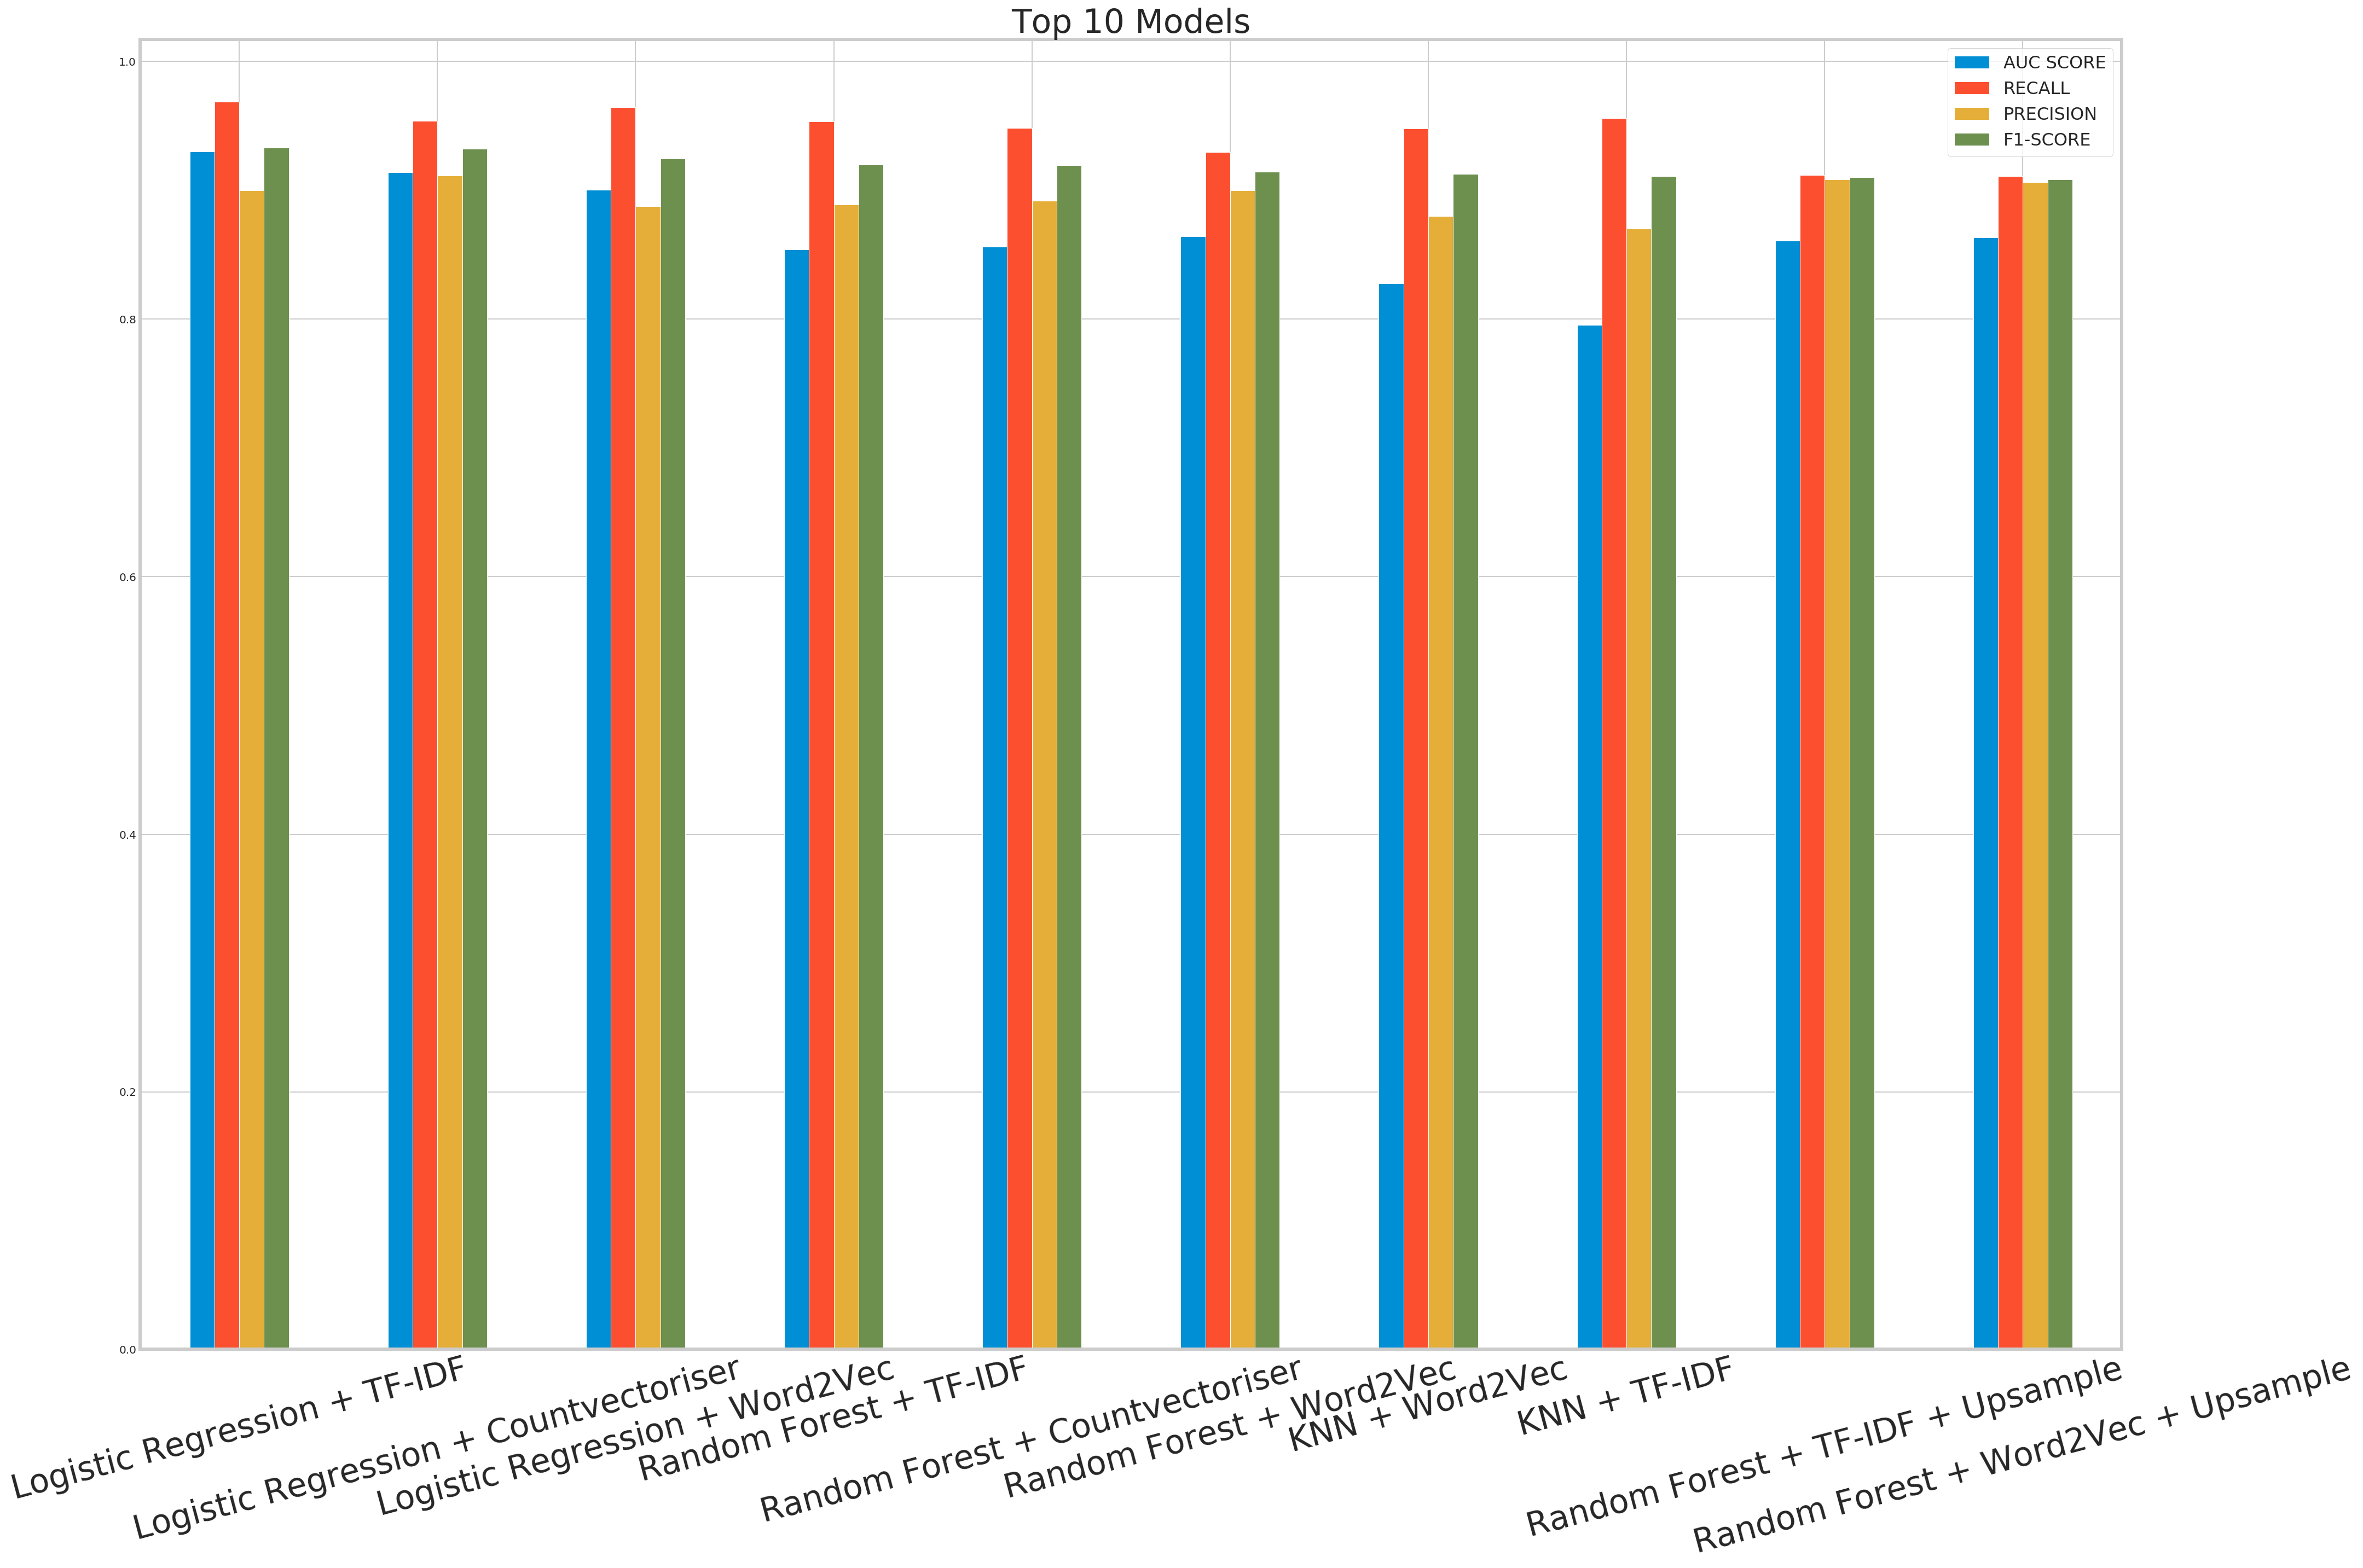

In [304]:
## Plotting bar chart of Precision Recall and AUC Scores
all_model_results=all_results[['model','test_score','recall','precision','f1_score']].sort_values('f1_score',ascending=False).head(10)
all_model_results.reset_index(inplace=True,drop=True)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(30,20))

ax=all_model_results.plot.bar(ax=ax)
ax.set_title('Top 10 Models',fontsize=30)
xlabels=ax.get_xticklabels()
ylabels=ax.get_yticklabels()
xlabels=[model for model in all_model_results.model]
ax.set_xticklabels(xlabels,rotation=15,fontsize=30)
# ax.set_yticklabels(ylabels,fontsize=8)

ax.legend(['AUC SCORE','RECALL','PRECISION','F1-SCORE'],fontsize=16)
plt.tight_layout()
plt.show()
# bars = ax.patches
# for bar, label in zip(bars,all_model_results[['test_score','recall','precision','f1_score']].values.flatten()):
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, height, label,
#             ha='center', va='bottom')


In [284]:
all_model_results

model  test_score    recall  precision  \
0           Logistic Regression + TF-IDF    0.930271  0.968699   0.900050   
1  Logistic Regression + Countvectoriser    0.914077  0.953949   0.911325   
2         Logistic Regression + Word2Vec    0.900491  0.964562   0.887454   
3                 Random Forest + TF-IDF    0.854105  0.953589   0.888833   
4        Random Forest + Countvectoriser    0.856156  0.948372   0.892047   

   f1_score  
0  0.933114  
1  0.932150  
2  0.924403  
3  0.920073  
4  0.919348

In [137]:
# save the model to disk
filename = 'models_basemodel.sav'
pickle.dump(models, open(filename, 'wb'))

### Summary Explanation:

Based on the results, models trained and tested with downsampling did not perform very well compared the base model and upsampling. Models trained and test with upsampling performed much better and produced quite some promising models but the base models still performed the best

## GridSearchCV for KNN + Logistic Regression + Random Forest

In [150]:
knn_params= {'n_neighbors':[1,5,10,15,20,25,30,40,50],
             'weights':['distance','uniform']}

logreg_params={ 'penalty' : ['l1','l2'],
           'solver' : ['liblinear'],
           'C' : np.logspace(-5,0,100)}

rfc_params={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50,100,150,200]}

## GridSearchCV + Logistic Regression + Counvectoriser + Base

In [151]:
lr_grid_cvec= GridSearchCV(LogisticRegression(), param_grid=logreg_params, cv=5, verbose=1)
lr_grid_cvec.fit(X13cvec_train, y13cvec_train)
print ("Best parameters set:")
lr_best_parameters_cvec = lr_grid_cvec.best_estimator_.get_params()
for param_name in sorted(logreg_params.keys()):
    print ("\t%s: %r" % (param_name, lr_best_parameters_cvec[param_name]))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


Best parameters set:
	C: 0.15556761439304723
	penalty: 'l2'
	solver: 'liblinear'


In [152]:
lr_best_parameters_cvec

{'C': 0.15556761439304723,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + Logistic Regression + TF-IDF + Base

In [153]:
lr_grid_tf= GridSearchCV(LogisticRegression(), param_grid=logreg_params, cv=5, verbose=1)
lr_grid_tf.fit(X13tf_train, y13tf_train)
print ("Best parameters set:")
lr_best_parameters_tf = lr_grid_tf.best_estimator_.get_params()
for param_name in sorted(logreg_params.keys()):
    print ("\t%s: %r" % (param_name, lr_best_parameters_tf[param_name]))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters set:
	C: 1.0
	penalty: 'l1'
	solver: 'liblinear'


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


In [154]:
lr_best_parameters_tf

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + Logistic Regression + Word2Vec + Base

In [155]:
lr_grid_w2v= GridSearchCV(LogisticRegression(), param_grid=logreg_params, cv=5, verbose=1)
lr_grid_w2v.fit(X_w2v_train, yw2v_train)
print ("Best parameters set:")
lr_best_parameters_w2v = lr_grid_w2v.best_estimator_.get_params()
for param_name in sorted(logreg_params.keys()):
    print ("\t%s: %r" % (param_name, lr_best_parameters_w2v[param_name]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


Best parameters set:
	C: 1.0
	penalty: 'l1'
	solver: 'liblinear'


In [156]:
lr_best_parameters_w2v

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + Random Forest + Counvectoriser + Base

In [157]:
rfc_grid_cvec= GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5, verbose=1)
rfc_grid_cvec.fit(X13cvec_train, y13cvec_train)
print ("Best parameters set:")
rfc_best_parameters_cvec = rfc_grid_cvec.best_estimator_.get_params()
for param_name in sorted(rfc_params.keys()):
    print ("\t%s: %r" % (param_name, rfc_best_parameters_cvec[param_name]))

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed: 64.0min finished


Best parameters set:
	max_depth: 80
	max_features: 'auto'
	n_estimators: 200


In [160]:
rfc_best_parameters_cvec

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + Random Forest + TF-IDF + Base

In [158]:
rfc_grid_tf= GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5, verbose=1)
rfc_grid_tf.fit(X13tf_train, y13tf_train)
print ("Best parameters set:")
rfc_best_parameters_tf = rfc_grid_tf.best_estimator_.get_params()
for param_name in sorted(rfc_params.keys()):
    print ("\t%s: %r" % (param_name, rfc_best_parameters_tf[param_name]))

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed: 87.8min finished


Best parameters set:
	max_depth: None
	max_features: 'auto'
	n_estimators: 150


In [161]:
rfc_best_parameters_tf

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + Random Forest + Word2Vec + Base

In [159]:
rfc_grid_w2v= GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, cv=5, verbose=1)
rfc_grid_w2v.fit(X_w2v_train, yw2v_train)
print ("Best parameters set:")
rfc_best_parameters_w2v = rfc_grid_w2v.best_estimator_.get_params()
for param_name in sorted(rfc_params.keys()):
    print ("\t%s: %r" % (param_name, rfc_best_parameters_w2v[param_name]))

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed: 87.8min finished


Best parameters set:
	max_depth: 90
	max_features: 'sqrt'
	n_estimators: 200


In [162]:
rfc_best_parameters_w2v

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 90,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## GridSearchCV + KNN + Countvectoriser + Base

In [163]:
knn_grid_cvec= GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, verbose=1)
knn_grid_cvec.fit(X13cvec_train, y13cvec_train)
print ("Best parameters set:")
knn_best_parameters_cvec = knn_grid_cvec.best_estimator_.get_params()
for param_name in sorted(knn_params.keys()):
    print ("\t%s: %r" % (param_name, knn_best_parameters_cvec[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 413.7min finished


Best parameters set:
	n_neighbors: 10
	weights: 'distance'


In [166]:
knn_best_parameters_cvec

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

## GridSearchCV + KNN + TF-IDF + Base

In [164]:
knn_grid_tf= GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, verbose=1)
knn_grid_tf.fit(X13tf_train, y13tf_train)
print ("Best parameters set:")
knn_best_parameters_tf = knn_grid_tf.best_estimator_.get_params()
for param_name in sorted(knn_params.keys()):
    print ("\t%s: %r" % (param_name, knn_best_parameters_tf[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 412.5min finished


Best parameters set:
	n_neighbors: 20
	weights: 'uniform'


In [167]:
knn_best_parameters_tf

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

## GridSearchCV + KNN + Word2Vec + Base

In [165]:
knn_grid_w2v= GridSearchCV(KNeighborsClassifier(), param_grid=knn_params, cv=5, verbose=1)
knn_grid_w2v.fit(X_w2v_train, yw2v_train)
print ("Best parameters set:")
knn_best_parameters_w2v = knn_grid_w2v.best_estimator_.get_params()
for param_name in sorted(knn_params.keys()):
    print ("\t%s: %r" % (param_name, knn_best_parameters_w2v[param_name]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters set:
	n_neighbors: 20
	weights: 'uniform'


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 51.9min finished


In [168]:
knn_best_parameters_w2v

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

### Optimise Base Model with GridsearchCV hyperparameters

Since the base models are the best performing models, 3 models will be optimised further (Logistic Regression, Ranodom Forest and KNN) with GridsearchCV hyperparameters

In [169]:
logreg_grid_cvec=LogisticRegression(**lr_best_parameters_cvec)
logreg_grid_tfidf=LogisticRegression(**lr_best_parameters_tf)
logreg_grid_w2v=LogisticRegression(**lr_best_parameters_w2v)

rfc_grid_cvec=RandomForestClassifier(**rfc_best_parameters_cvec)
rfc_grid_tfidf=RandomForestClassifier(**rfc_best_parameters_tf)
rfc_grid_w2v=RandomForestClassifier(**rfc_best_parameters_w2v)

knn_grid_cvec=KNeighborsClassifier(**knn_best_parameters_cvec)
knn_grid_tfidf=KNeighborsClassifier(**knn_best_parameters_tf)
knn_grid_w2v=KNeighborsClassifier(**knn_best_parameters_w2v)

In [170]:
models_cvec_grid=[
    ('KNN + CountVectorizer + Hyperparameters',knn_grid_cvec),
    ('Logistic Regression + Countvectoriser + Hyperparameters',logreg_grid_cvec),
    ('Random Forest + Countvectoriser + Hyperparameters',rfc_grid_cvec)]
      
models_tf_grid=[
    ('KNN + TF-IDF + Hyperparameters',knn_grid_tfidf),
    ('Logistic Regression + TF-IDF + Hyperparameters',logreg_grid_tfidf),
    ('Random Forest + TF-IDF + Hyperparameters',rfc_grid_tfidf)]

models_w2v_grid=[
    ('KNN + Word2Vec + Hyperparameters',knn_grid_w2v),
    ('Logistic Regression + Word2Vec + Hyperparameters',logreg_grid_w2v),
    ('Random Forest + Word2Vec + Hyperparameters',rfc_grid_w2v)]
    
# models_cvec=[('Logistic Regression + Countvectoriser',cvec_lg)]

# models_tf=[('Logistic Regression + TF-IDF',tf_lg)]

# models_w2v=[('Logistic Regression + Word2Vec',w2v_lg)]

X_models=[(X13cvec_train,X13cvec_test),
          (X13tf_train,X13tf_test),
          (X_w2v_train,X_w2v_test)]

y_models=[(y13cvec_train,y13cvec_test),
          (y13tf_train,y13tf_test),
          (yw2v_train,yw2v_test)]

cv=5

In [171]:
models_grid,cvec_results_grid,tfidf_results_grid,w2v_results_grid,auc_roc_results_grid=modelling(models_cvec_grid,models_tf_grid,models_w2v_grid,X_models,y_models,cv)

------------------------------------------------------------------------------
KNN + CountVectorizer + Hyperparameters
 
5 Kfold Cross Validation =
 [0.74568905 0.74529872 0.7795902  0.73851404 0.74700682]
Model Score on Train Set = 0.7512197635899248
Model Score on Test Set = 0.7642696162525576
Accuracy Score = 0.8285461776403005
Recall Score = 0.9841698147148767
Precision Score = 0.8356499159920574
                 precision    recall  f1-score   support

Not Recommended       0.64      0.13      0.21      1230
    Recommended       0.84      0.98      0.90      5559

      micro avg       0.83      0.83      0.83      6789
      macro avg       0.74      0.55      0.56      6789
   weighted avg       0.80      0.83      0.78      6789

F1 Score = 0.9038493309102924
------------------------------------------------------------------------------
KNN + TF-IDF + Hyperparameters
 
5 Kfold Cross Validation =
 [0.85943482 0.85167963 0.84890621 0.85460755 0.85823666]
Model Score on Train Set

In [172]:
knn_cvec_grid=models_grid[0]
knn_tfidf_grid=models_grid[1]
knn_w2c_grid=models_grid[2]
logreg_cvec_grid=models_grid[3]
logreg_tfidf_grid=models_grid[4]
logreg_w2c_grid=models_grid[5]
rfc_cvec_grid=models_grid[6]
rfc_tfidf_grid=models_grid[7]
rfc_w2c_grid=models_grid[8]

In [173]:
# save the model to disk
filename = 'models_gridsearch.sav'
pickle.dump(models_grid, open(filename, 'wb'))

In [175]:
summary_results_grid=pd.DataFrame(cvec_results_grid+tfidf_results_grid+w2v_results_grid,columns=['model','train_score','test_score','accuracy','recall','precision','f1_score'])
summary_results_grid.sort_values('f1_score',ascending=False)

model  train_score  test_score  \
1  Logistic Regression + Countvectoriser + Hyperp...     0.913513    0.919991   
4     Logistic Regression + TF-IDF + Hyperparameters     0.921422    0.928974   
7   Logistic Regression + Word2Vec + Hyperparameters     0.903561    0.904573   
8         Random Forest + Word2Vec + Hyperparameters     0.895137    0.900311   
2  Random Forest + Countvectoriser + Hyperparameters     0.890049    0.903037   
5           Random Forest + TF-IDF + Hyperparameters     0.898055    0.906742   
6                   KNN + Word2Vec + Hyperparameters     0.880964    0.887068   
3                     KNN + TF-IDF + Hyperparameters     0.854573    0.860376   
0            KNN + CountVectorizer + Hyperparameters     0.751220    0.764270   

   accuracy    recall  precision  f1_score  
1  0.889674  0.962044   0.908597  0.934557  
4  0.888349  0.963663   0.905970  0.933926  
7  0.874797  0.961864   0.893400  0.926369  
8  0.874356  0.961324   0.893347  0.926090  
2  0.868906  0.980932   0.874299  0.924551  
5  0.867138  0.978413   0.874297  0.923430  
6  0.864781  0.966541   0.880098  0.921296  
3  0.854912  0.979673   0.861982  0.917067  
0  0.828546  0.984170   0.835650  0.903849

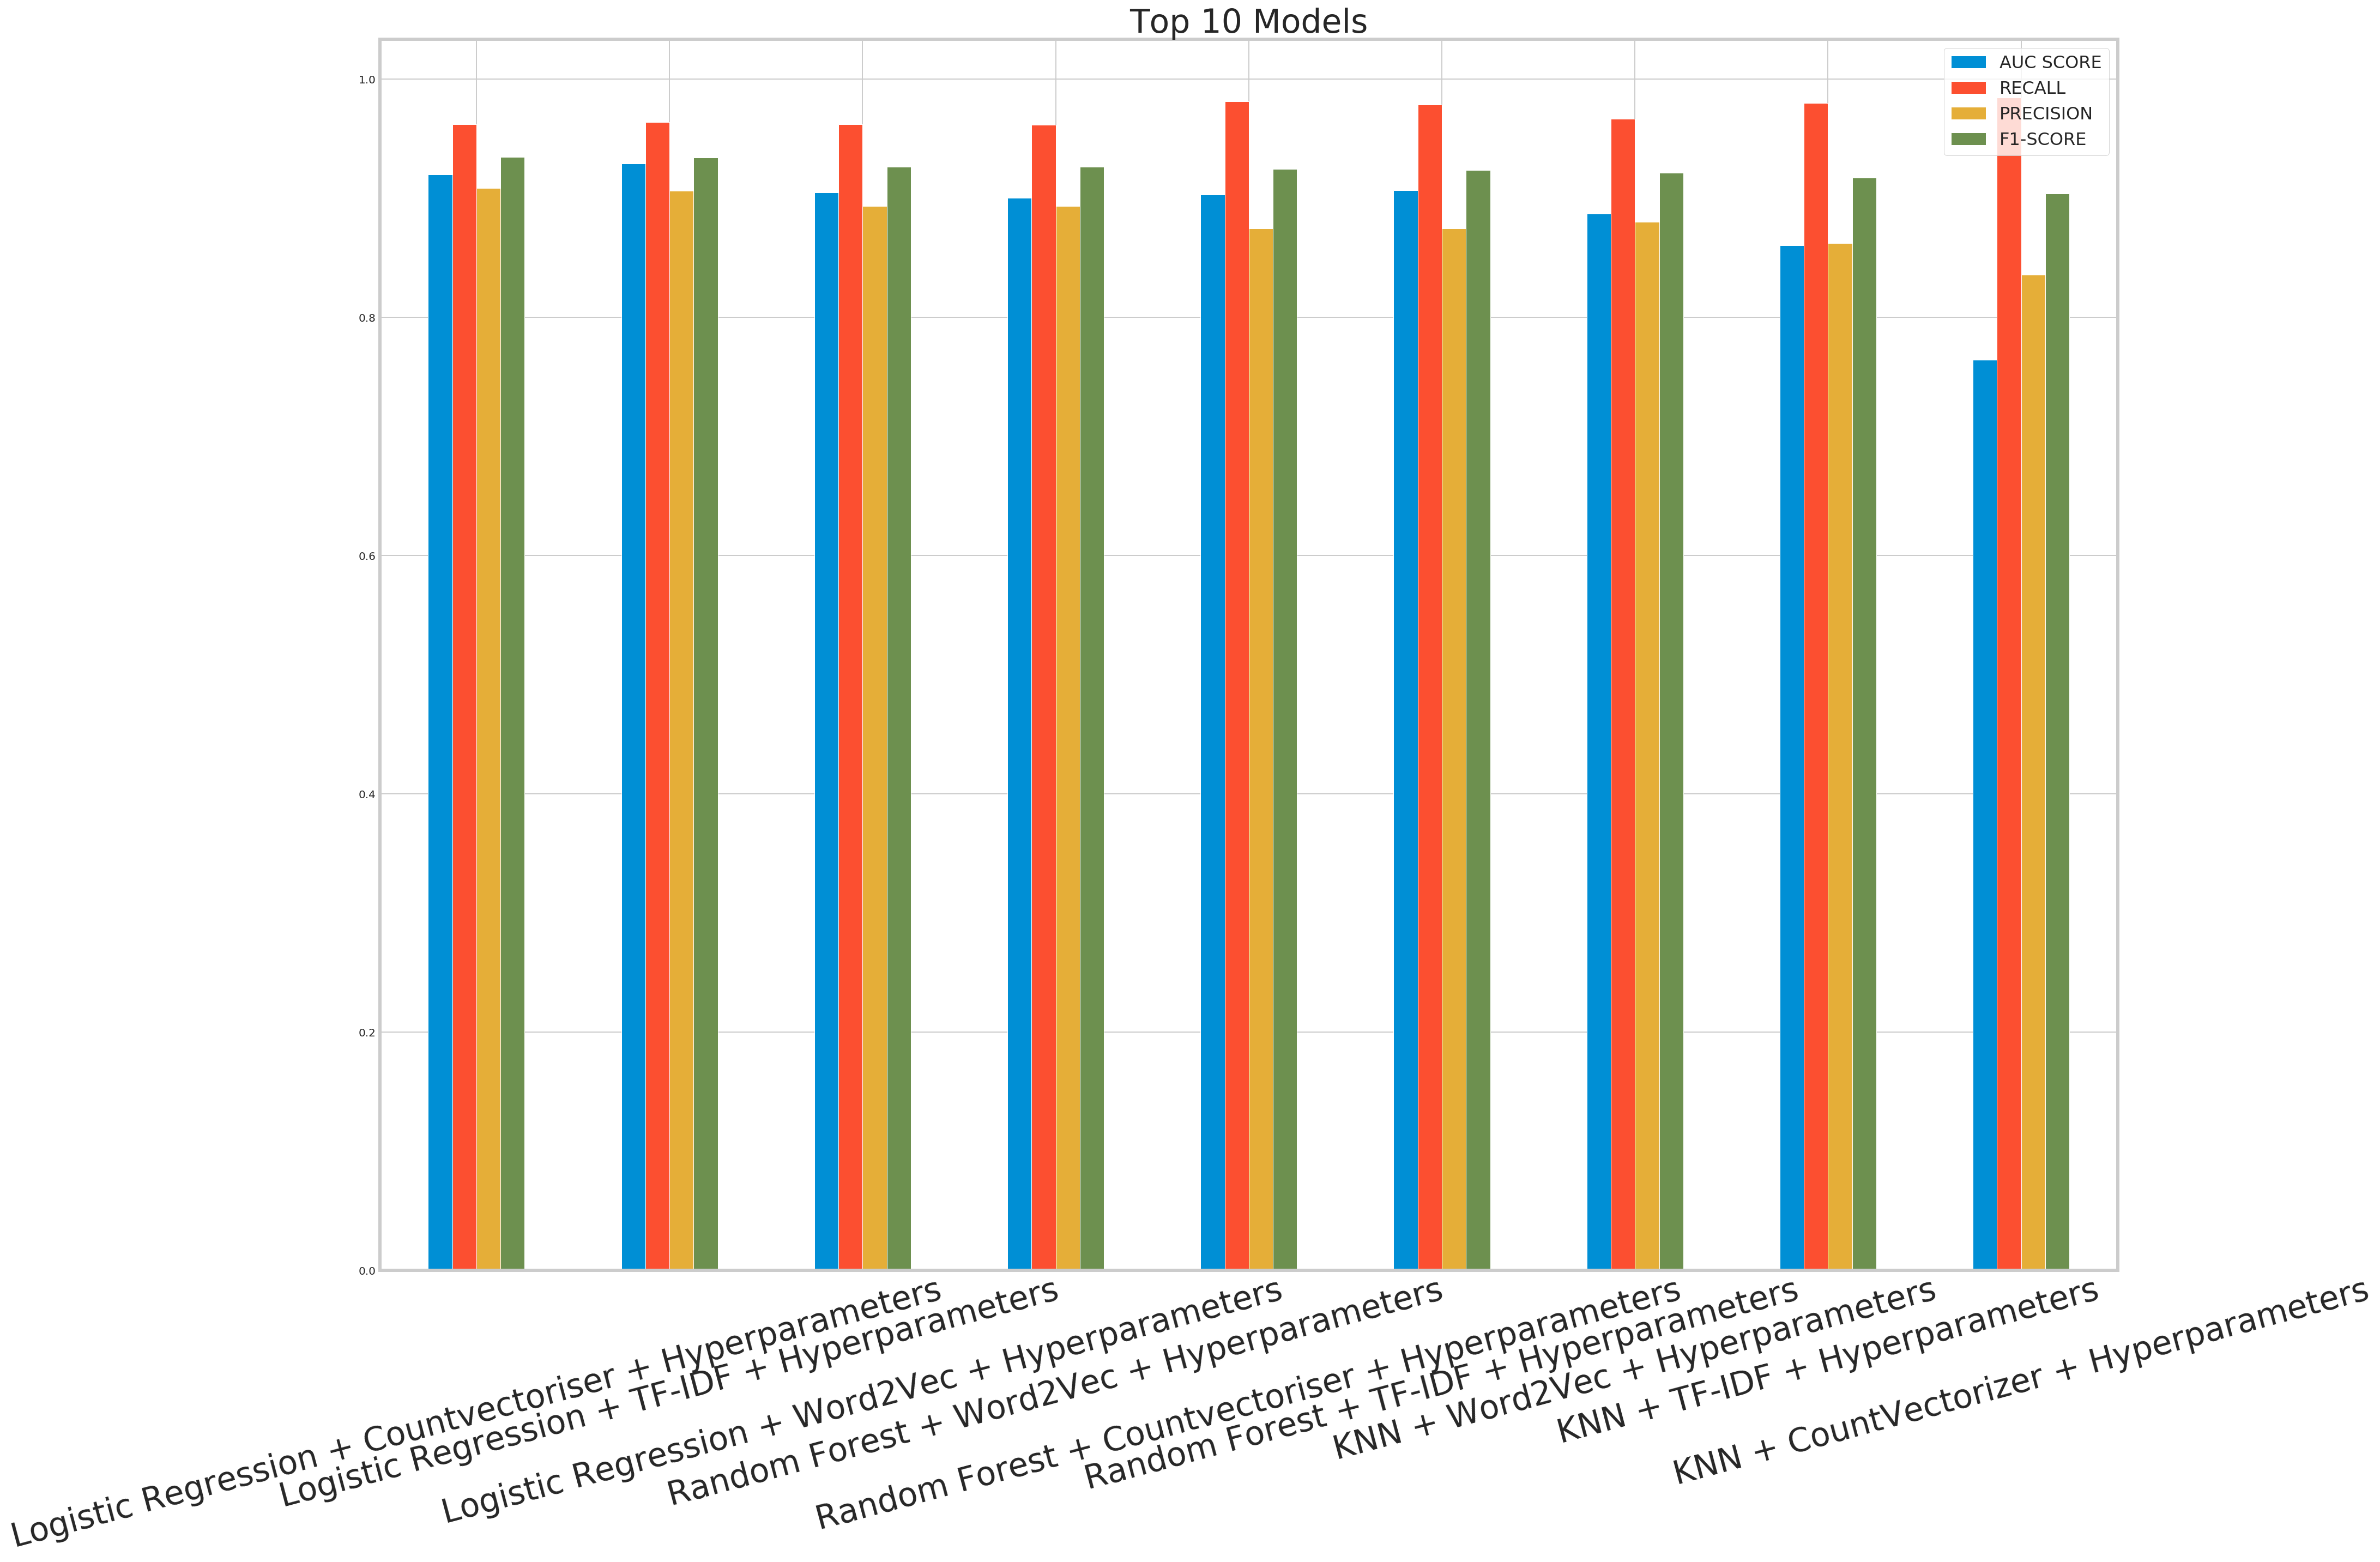

In [306]:
## Plotting bar chart of Precision Recall and AUC Scores
final_model_results=summary_results_grid[['model','test_score','recall','precision','f1_score']].sort_values('f1_score',ascending=False)
final_model_results.reset_index(inplace=True,drop=True)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(30,20))

ax=final_model_results.plot.bar(ax=ax)
ax.set_title('Top 10 Models',fontsize=30)
xlabels=ax.get_xticklabels()
ylabels=ax.get_yticklabels()
xlabels=[model for model in final_model_results.model]
ax.set_xticklabels(xlabels,rotation=15,fontsize=30)
# ax.set_yticklabels(ylabels,fontsize=8)

ax.legend(['AUC SCORE','RECALL','PRECISION','F1-SCORE'],fontsize=16)
plt.tight_layout()
plt.show()

## Final Model (Logistic Regression + TF-IDF + Hyperparameters)

In [351]:
logreg_features_tfidf_grid=pd.DataFrame({'coef':logreg_tfidf_grid.coef_.ravel(),'abs':np.abs(logreg_tfidf_grid.coef_.ravel()),'features':X13tf_test.columns})
logreg_features_tfidf_grid.sort_values('coef',ascending=False, inplace=True)
final_features=logreg_features_tfidf_grid.head(50)
final_features

coef       abs       features
476  7.263081  7.263081           love
596  6.847410  6.847410        perfect
145  6.397538  6.397538     compliment
59   5.616100  5.616100    beautifully
912  5.370031  5.370031         unique
106  5.288251  5.288251    cannot wait
140  5.130129  5.130129    comfortable
325  5.079772  5.079772           glad
339  5.063502  5.063502          great
21   4.540492  4.540492        amazing
600  4.473212  4.473212      perfectly
355  4.463651  4.463651          happy
315  4.276021  4.276021            fun
789  4.233724  4.233724           soft
450  3.922154  3.922154         little
205  3.871337  3.871337        dressed
80   3.764467  3.764467           boot
822  3.690019  3.690019       stunning
66   3.669592  3.669592  better person
542  3.650266  3.650266         nicely
69   3.599362  3.599362            bit
211  3.507238  3.507238           easy
267  3.423815  3.423815       feminine
216  3.385966  3.385966        elegant
792  3.331219  3.331219           sold
618  3.325760  3.325760        pleased
486  3.105553  3.105553       love top
584  3.063991  3.063991         paired
5    3.025698  3.025698            add
565  2.985663  2.985663          order
923  2.959165  2.959165      versatile
660  2.958833  2.958833    really like
118  2.937397  2.937397           chic
541  2.923861  2.923861           nice
111  2.918511  2.918511         casual
119  2.844503  2.844503        classic
143  2.797612  2.797612      complaint
142  2.775901  2.775901          comfy
838  2.770147  2.770147       surprise
369  2.733571  2.733571         highly
775  2.730546  2.730546       slightly
777  2.607320  2.607320       slimming
56   2.592280  2.592280      beautiful
729  2.548744  2.548744           sexy
551  2.513258  2.513258           nude
753  2.473953  2.473953           size
978  2.387324  2.387324        worried
969  2.377520  2.377520        without
333  2.342142  2.342142       gorgeous
270  2.301593  2.301593           find

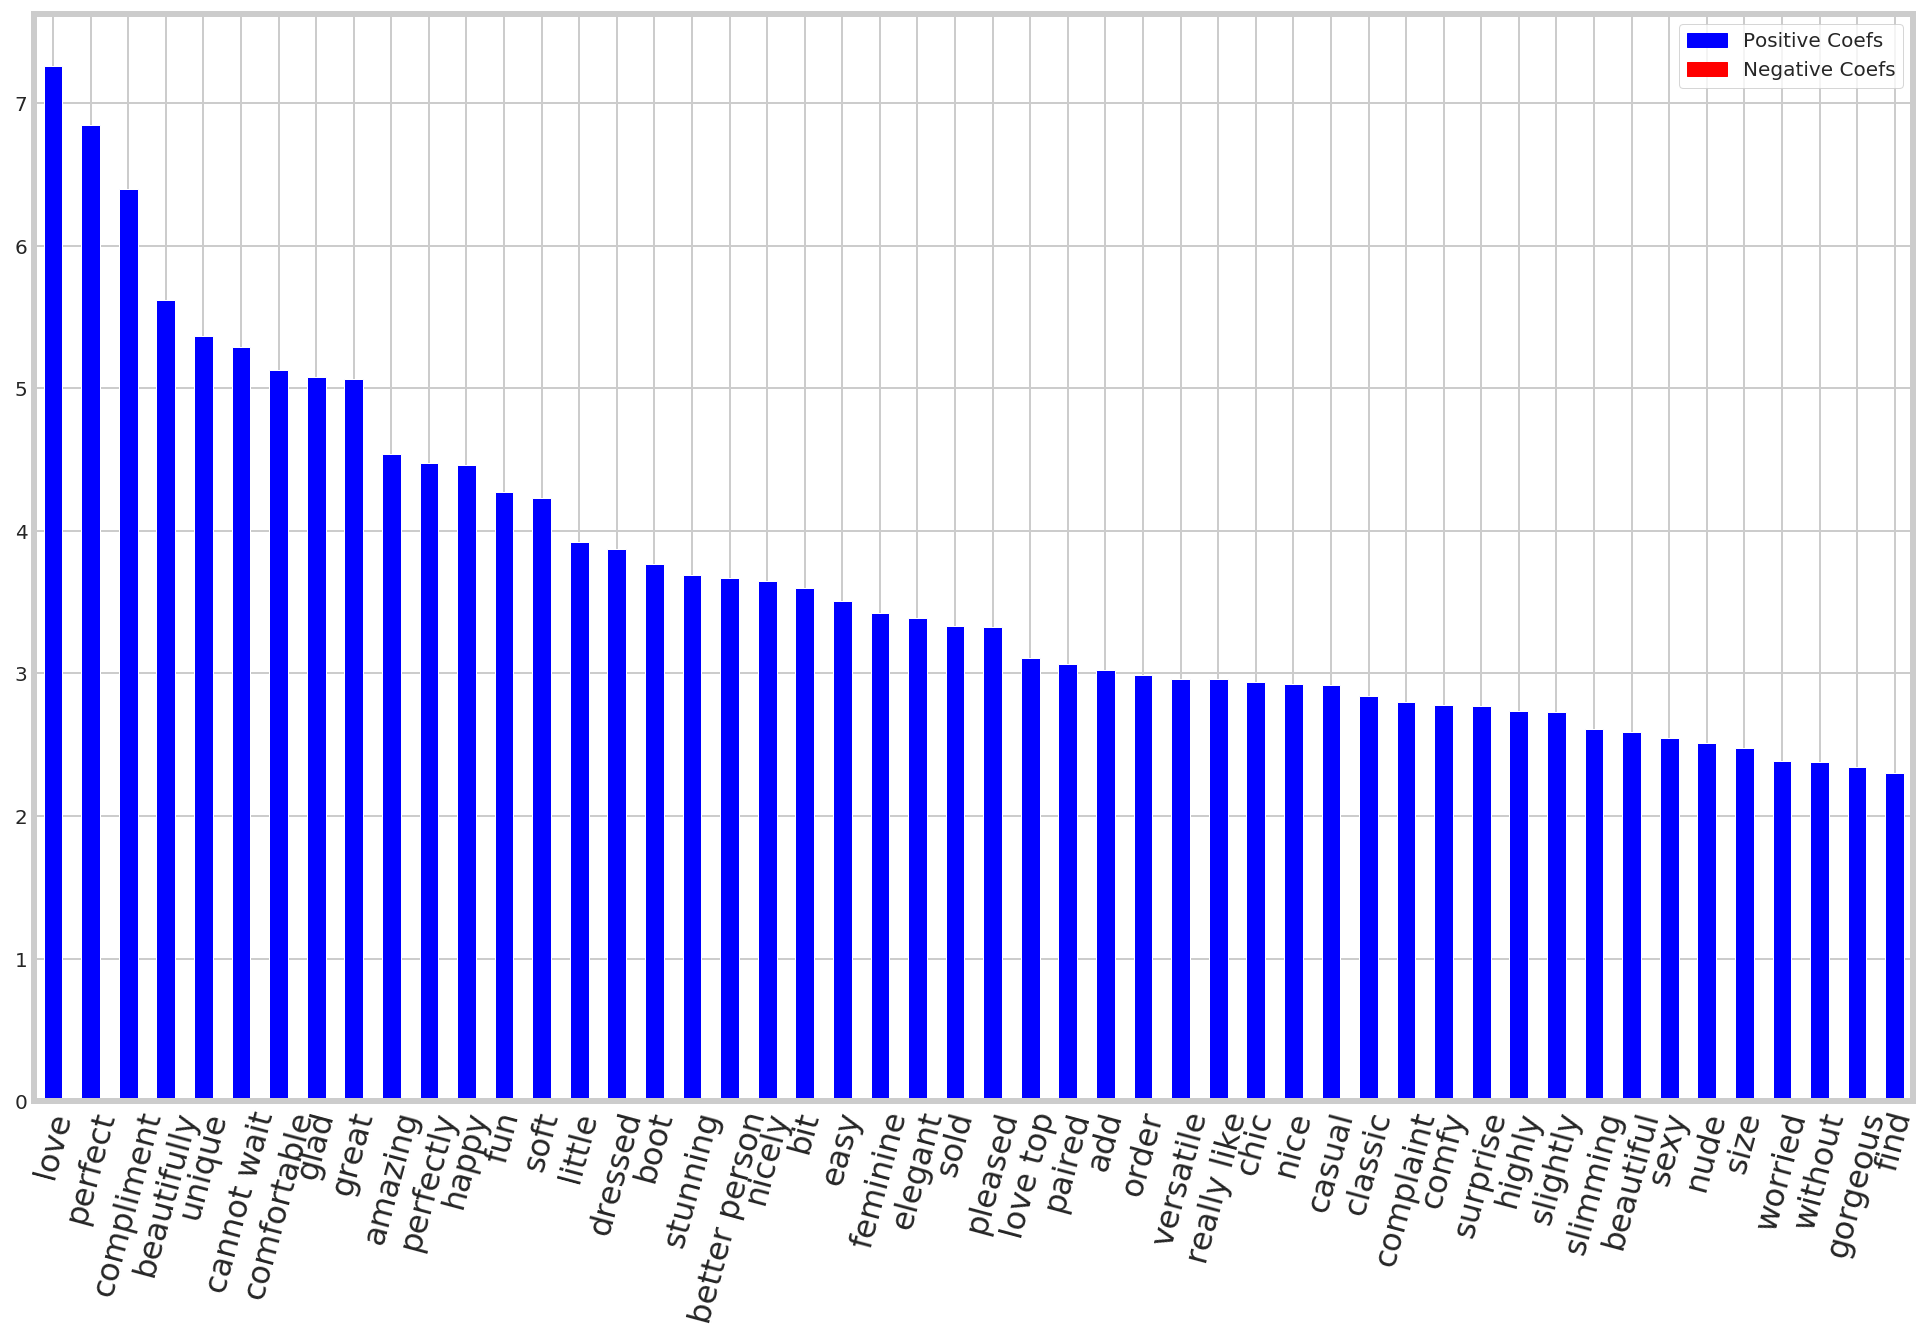

<Figure size 432x288 with 0 Axes>

In [352]:
final_features['color']=final_features['coef'].apply(lambda x:'b' if x>0 else 'r')
plt.figure(figsize=(15,10))
ax=final_features['coef'].plot.bar(figsize=(15,10),color=final_features['color'])
ax.set_xticklabels(final_features['features'],rotation=75,fontsize=16)
blue = mpatches.Patch(color='b', label='Positive Coefs')
red = mpatches.Patch(color='r', label='Negative Coefs')
ax.legend(handles=[blue,red], loc=0)
plt.show()
plt.tight_layout()

In [334]:
df.head()

clothing_id  age                    title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         review_text  rating  recommended_ind  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   positive_feedback_count   division_name department_name class_name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [331]:
## confusion matrix
y_final_pred=logreg_tfidf_grid.predict(X13tf_test)

unique, counts = np.unique(y_final_pred, return_counts=True)

print(np.asarray((unique, counts)).T)


[[   0  876]
 [   1 5913]]


In [335]:
conmat = np.array(confusion_matrix(y13tf_test,y_final_pred))

confusion = pd.DataFrame(conmat, index=['actual not recommended', 'actual recommended'],
                         columns=['predicted not recommended','predicted recommended'])
confusion

predicted not recommended  predicted recommended
actual not recommended                        674                    556
actual recommended                            202                   5357

In [ ]:
vect=tf13

In [309]:
target_names = ["Not Recommended","Recommended"]
eli5.show_weights(logreg_tfidf_grid, vec=vect, top=50,
                  target_names=target_names,feature_filter=lambda x: x != '<BIAS>')

In [311]:
for iteration in range(15):
    samp = random.randint(1,df_all.shape[0])
    print("Real Label: {}".format(df_all["recommended_ind"].iloc[samp]))
    display(eli5.show_prediction(logreg_tfidf_grid,df_all["review_text"].iloc[samp], vec=vect,
                         target_names=target_names))

Real Label: 1


Real Label: 0


Real Label: 0


Real Label: 1


Real Label: 0


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 0


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 0


## Investigating Key Features of Dress Liked by Customer

In [317]:
review_dress=df_clean[df_clean.class_name=='Dresses'][['review_text','review_text_clean','recommended_ind']]
X_dress=review_dress.review_text_clean
y_dress=review_dress.recommended_ind

In [202]:
tf13_dress=TfidfVectorizer(ngram_range=(1,3),min_df=2,max_features=1000)
X13_tf_dress=tf13_dress.fit_transform(X_dress)
X13tf_dress=pd.DataFrame(X13_tf_dress.todense(),columns=tf13_dress.get_feature_names())
X13tf_dress_train , X13tf_dress_test , y13tf_dress_train , y13tf_dress_test = train_test_split(X13tf_dress,y_dress,test_size=0.3,random_state=0,stratify=y_dress)

In [204]:
lg_tfidf13_dress=LogisticRegression(**lr_best_parameters_tf)


In [207]:
target_names=['Not Recommended','Recommended']
lg_tfidf13_dress.fit(X13tf_dress_train,y13tf_dress_train)
model_scores_train=cross_val_score(lg_tfidf13_dress,X13tf_dress_train,y13tf_dress_train,cv=5,scoring='roc_auc')
model_scores_test=lg_tfidf13_dress.score(X13tf_dress_test,y13tf_dress_test)
# models.append(lg_tfidf34_grid)
y_pred_tfidf13_dress=lg_tfidf13_dress.predict(X13tf_dress_test)
y_prob_tfidf13_dress=lg_tfidf13_dress.predict_proba(X13tf_dress_test)
y_pp_tfidf13_dress = pd.DataFrame(y_prob_tfidf13_dress, columns=['class_0_pp','class_1_pp'])
fpr_tfidf13_dress, tpr_tfidf13_dress,_ = roc_curve(y13tf_dress_test, y_pp_tfidf13_dress.class_1_pp)
roc_auc_score_tfidf13_dress = auc(fpr_tfidf13_dress, tpr_tfidf13_dress)
print('------------------------------------------------------------------------------')
print('Logistic Regression + TF-IDF (Dress) + Hyperparameters')
print(' ')
print('{} Kfold Cross Validation =\n {}'.format(5,model_scores_train))
print('Model Score on Train Set = {}'.format(np.mean(model_scores_train)))
print('Model Score on Test Set = {}'.format(roc_auc_score_tfidf13_dress))
print('Accuracy Score = {}'.format(accuracy_score(y13tf_dress_test,y_pred_tfidf13_dress)))
print('Recall Score = {}'.format(recall_score(y13tf_dress_test,y_pred_tfidf13_dress)))
print('Precision Score = {}'.format(precision_score(y13tf_dress_test,y_pred_tfidf13_dress)))
print(classification_report(y13tf_dress_test,y_pred_tfidf13_dress,target_names=target_names))
print('F1 Score = {}'.format(f1_score(y13tf_dress_test,y_pred_tfidf13_dress)))

------------------------------------------------------------------------------
Logistic Regression + TF-IDF (Dress) + Hyperparameters
 
5 Kfold Cross Validation =
 [0.91550282 0.88216347 0.89740947 0.87002008 0.90235714]
Model Score on Train Set = 0.8934905936943769
Model Score on Test Set = 0.9035620832278213
Accuracy Score = 0.8698481561822126
Recall Score = 0.9737373737373738
Precision Score = 0.8779599271402551
                 precision    recall  f1-score   support

Not Recommended       0.80      0.44      0.57       359
    Recommended       0.88      0.97      0.92      1485

      micro avg       0.87      0.87      0.87      1844
      macro avg       0.84      0.71      0.75      1844
   weighted avg       0.86      0.87      0.85      1844

F1 Score = 0.9233716475095787


In [357]:
logreg_features_tfidf_dress=pd.DataFrame({'coef':lg_tfidf13_dress.coef_.ravel(),'abs':np.abs(lg_tfidf13_dress.coef_.ravel()),'features':X13tf_dress_test.columns})
logreg_features_tfidf_dress.sort_values('coef',ascending=False, inplace=True)
final_features_dress=logreg_features_tfidf_dress.head(50)
final_features_dress

coef       abs     features
143  7.829557  7.829557   compliment
617  7.072147  7.072147      perfect
622  5.727943  5.727943    perfectly
137  5.277491  5.277491  comfortable
479  4.757714  4.757714       little
503  4.308425  4.308425         love
73   3.884766  3.884766          bit
80   3.547086  3.547086         boot
112  3.295944  3.295944       casual
381  3.280888  3.280888        great
63   3.208795  3.208795  beautifully
625  2.991522  2.991522       petite
836  2.724030  2.724030     stunning
512  2.676862  2.676862       lovely
948  2.565815  2.565815         wear
917  2.394663  2.394663       unique
23   2.365604  2.365604      amazing
505  2.257489  2.257489   love dress
336  2.116825  2.116825   flattering
901  2.105565  2.105565         true
589  2.038153  2.038153        order
785  2.010497  2.010497         skin
375  1.958727  1.958727     gorgeous
250  1.948463  1.948463         easy
577  1.873053  1.873053     occasion
392  1.775126  1.775126        happy
436  1.703360  1.703360       jacket
368  1.656087  1.656087         glad
178  1.584377  1.584377       detail
242  1.579833  1.579833      dressed
881  1.496262  1.496262       tights
826  1.393504  1.393504        still
140  1.339200  1.339200        comfy
464  1.299800  1.299800        light
770  1.271097  1.271097         size
440  1.121425  1.121425         keep
168  1.119257  1.119257   definitely
790  1.102963  1.102963     slightly
712  1.100709  1.100709          run
83   1.057078  1.057078       bought
460  1.051890  1.051890       length
962  1.037949  1.037949         well
367  1.031498  1.031498         give
442  1.030912  1.030912      keeping
977  0.999302  0.999302         worn
686  0.992727  0.992727    recommend
257  0.942506  0.942506   embroidery
842  0.939724  0.939724       summer
293  0.932165  0.932165         fall
445  0.899671  0.899671         knee

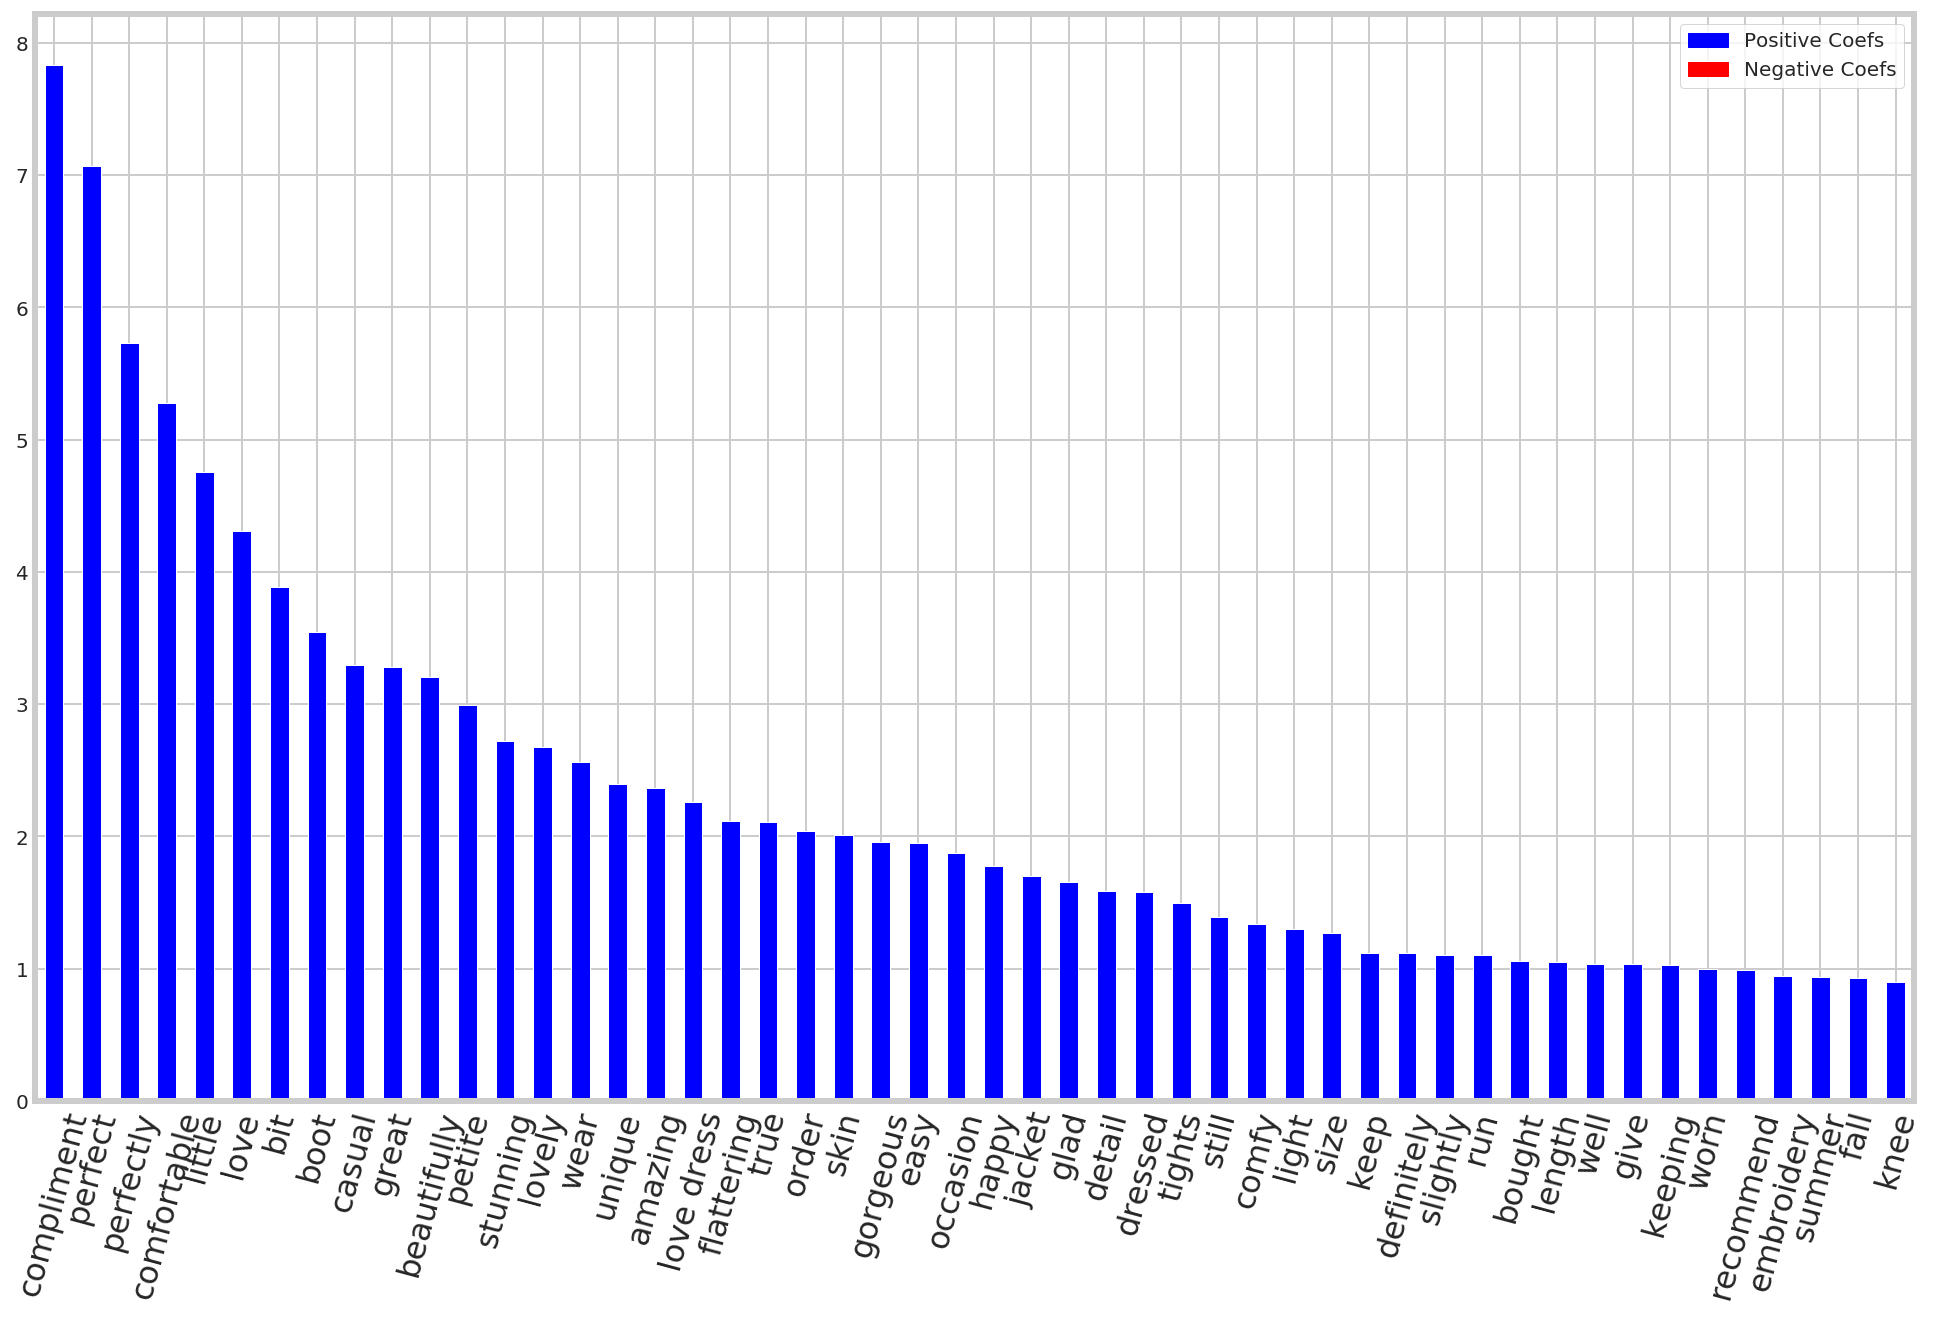

<Figure size 432x288 with 0 Axes>

In [358]:
final_features_dress['color']=final_features_dress['coef'].apply(lambda x:'b' if x>0 else 'r')
plt.figure(figsize=(15,10))
ax=final_features_dress['coef'].plot.bar(figsize=(15,10),color=final_features_dress['color'])
ax.set_xticklabels(final_features_dress['features'],rotation=75,fontsize=16)
blue = mpatches.Patch(color='b', label='Positive Coefs')
red = mpatches.Patch(color='r', label='Negative Coefs')
ax.legend(handles=[blue,red], loc=0)
plt.show()
plt.tight_layout()

In [314]:
target_names = ["Not Recommended","Recommended"]
eli5.show_weights(lg_tfidf13_dress, vec=tf13_dress, top=50,
                  target_names=target_names,feature_filter=lambda x: x != '<BIAS>')

In [318]:
for iteration in range(15):
    samp = random.randint(1,review_dress.shape[0])
    print("Real Label: {}".format(df_all["recommended_ind"].iloc[samp]))
    display(eli5.show_prediction(lg_tfidf13_dress,review_dress["review_text"].iloc[samp], vec=vect,
                         target_names=target_names))

Real Label: 1


Real Label: 1


Real Label: 0


Real Label: 0


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 1


Real Label: 0


Real Label: 1


## Logistic Regression + TF-IDF (3Ngrams - 4Ngrams) + Hyperparameters

In [183]:
lg_tfidf34_grid=LogisticRegression(**lr_best_parameters_tf)
lg_tfidf34_grid.fit(X34tf_train,y34tf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
target_names=['Not Recommended','Recommended']
lg_tfidf34_grid.fit(X34tf_train,y34tf_train)
model_scores_train=cross_val_score(lg_tfidf34_grid,X34tf_train,y34tf_train,cv=5,scoring='roc_auc')
model_scores_test=lg_tfidf34_grid.score(X34tf_test,y34tf_test)
# models.append(lg_tfidf34_grid)
y_pred_tfidf34=lg_tfidf34_grid.predict(X34tf_test)
y_prob_tfidf34=lg_tfidf34_grid.predict_proba(X34tf_test)
y_pp_tfidf34 = pd.DataFrame(y_prob_tfidf34, columns=['class_0_pp','class_1_pp'])
fpr_tfidf34, tpr_tfidf34,_ = roc_curve(y34tf_test, y_pp_tfidf34.class_1_pp)
roc_auc_score_tfidf34 = auc(fpr_tfidf34, tpr_tfidf34)
print('------------------------------------------------------------------------------')
print('Logistic Regression + TF-IDF (Trigram + 4 Ngrams) + Hyperparameters')
print(' ')
print('{} Kfold Cross Validation =\n {}'.format(5,model_scores_train))
print('Model Score on Train Set = {}'.format(np.mean(model_scores_train)))
print('Model Score on Test Set = {}'.format(roc_auc_score_tfidf34))
print('Accuracy Score = {}'.format(accuracy_score(y34tf_test,y_pred_tfidf34)))
print('Recall Score = {}'.format(recall_score(y34tf_test,y_pred_tfidf34)))
print('Precision Score = {}'.format(precision_score(y34tf_test,y_pred_tfidf34)))
print(classification_report(y34tf_test,y_pred_tfidf34,target_names=target_names))
print('F1 Score = {}'.format(f1_score(y34tf_test,y_pred_tfidf34)))

------------------------------------------------------------------------------
Logistic Regression + TF-IDF (Trigram + 4 Ngrams) + Hyperparameters
 
5 Kfold Cross Validation =
 [0.64012705 0.64288569 0.64242496 0.65222436 0.65206076]
Model Score on Train Set = 0.6459445638548631
Model Score on Test Set = 0.6660104393812422
Accuracy Score = 0.8301664457210193
Recall Score = 0.9917251304191401
Precision Score = 0.8327794561933535
                 precision    recall  f1-score   support

Not Recommended       0.73      0.10      0.18      1230
    Recommended       0.83      0.99      0.91      5559

      micro avg       0.83      0.83      0.83      6789
      macro avg       0.78      0.55      0.54      6789
   weighted avg       0.81      0.83      0.77      6789

F1 Score = 0.9053288447327367


In [360]:
## TF-IDF
logreg_features_tfidf34_grid=pd.DataFrame({'coef':lg_tfidf34_grid.coef_.ravel(),'abs':np.abs(lg_tfidf34_grid.coef_.ravel()),'features':X34tf_test.columns})
logreg_features_tfidf34_grid.sort_values('coef',ascending=False, inplace=True)
final_features34=logreg_features_tfidf34_grid.head(50)
final_features34

coef       abs                     features
54   3.357628  3.357628             cannot wait wear
639  2.844129  2.844129               run little big
661  2.838273  2.838273                run true size
471  2.620362  2.620362         medium fit perfectly
253  2.509450  2.509450          got many compliment
642  2.471880  2.471880             run little small
361  2.373623  2.373623              look great jean
973  2.188193  2.188193            worth every penny
272  2.020286  2.020286            great skinny jean
569  2.018169  2.018169         petite fit perfectly
611  1.932397  1.932397      received lot compliment
2    1.896140  1.896140        absolutely love dress
190  1.873407  1.873407               fit like glove
980  1.815104  1.815104       would highly recommend
689  1.802441  1.802441             size fit perfect
612  1.790130  1.790130     received many compliment
690  1.774248  1.774248           size fit perfectly
744  1.764190  1.764190            small fit perfect
71   1.761713  1.761713        compliment every time
423  1.733304  1.733304               love love love
650  1.621410  1.621410           run slightly large
745  1.586749  1.586749          small fit perfectly
535  1.543728  1.543728             ordered size fit
961  1.538829  1.538829              wish came color
6    1.510676  1.510676          absolutely love top
615  1.480158  1.480158  received several compliment
358  1.471046  1.471046         look forward wearing
347  1.467179  1.467179           look better person
244  1.438448  1.438448          get many compliment
741  1.401016  1.401016              small fit great
49   1.384248  1.384248            cannot say enough
978  1.358362  1.358362   would definitely recommend
145  1.348140  1.348140           even better person
716  1.326216  1.326216               size small fit
245  1.287957  1.287957           get ton compliment
267  1.284499  1.284499         great layering piece
694  1.235948  1.235948                size fit well
481  1.224726  1.224726           much better person
220  1.224469  1.224469                fit true size
627  1.204056  1.204056                  run bit big
628  1.192993  1.192993                run bit large
241  1.169737  1.169737           get lot compliment
778  1.163442  1.163442             super soft comfy
243  1.153113  1.153113                 get lot wear
468  1.109598  1.109598             medium fit great
772  1.091069  1.091069              store fell love
470  1.087734  1.087734           medium fit perfect
566  1.060617  1.060617        perfect spring summer
492  1.053999  1.053999              normal size fit
684  1.051549  1.051549             size even though

Summary Explanation

The model for 3 - 4 Ngrams, Logistic Regression has a good F1-score and relatively high precision, however the AUC is on quite low. I will be evaluating the model based on precision and recall due to class imbalance. 

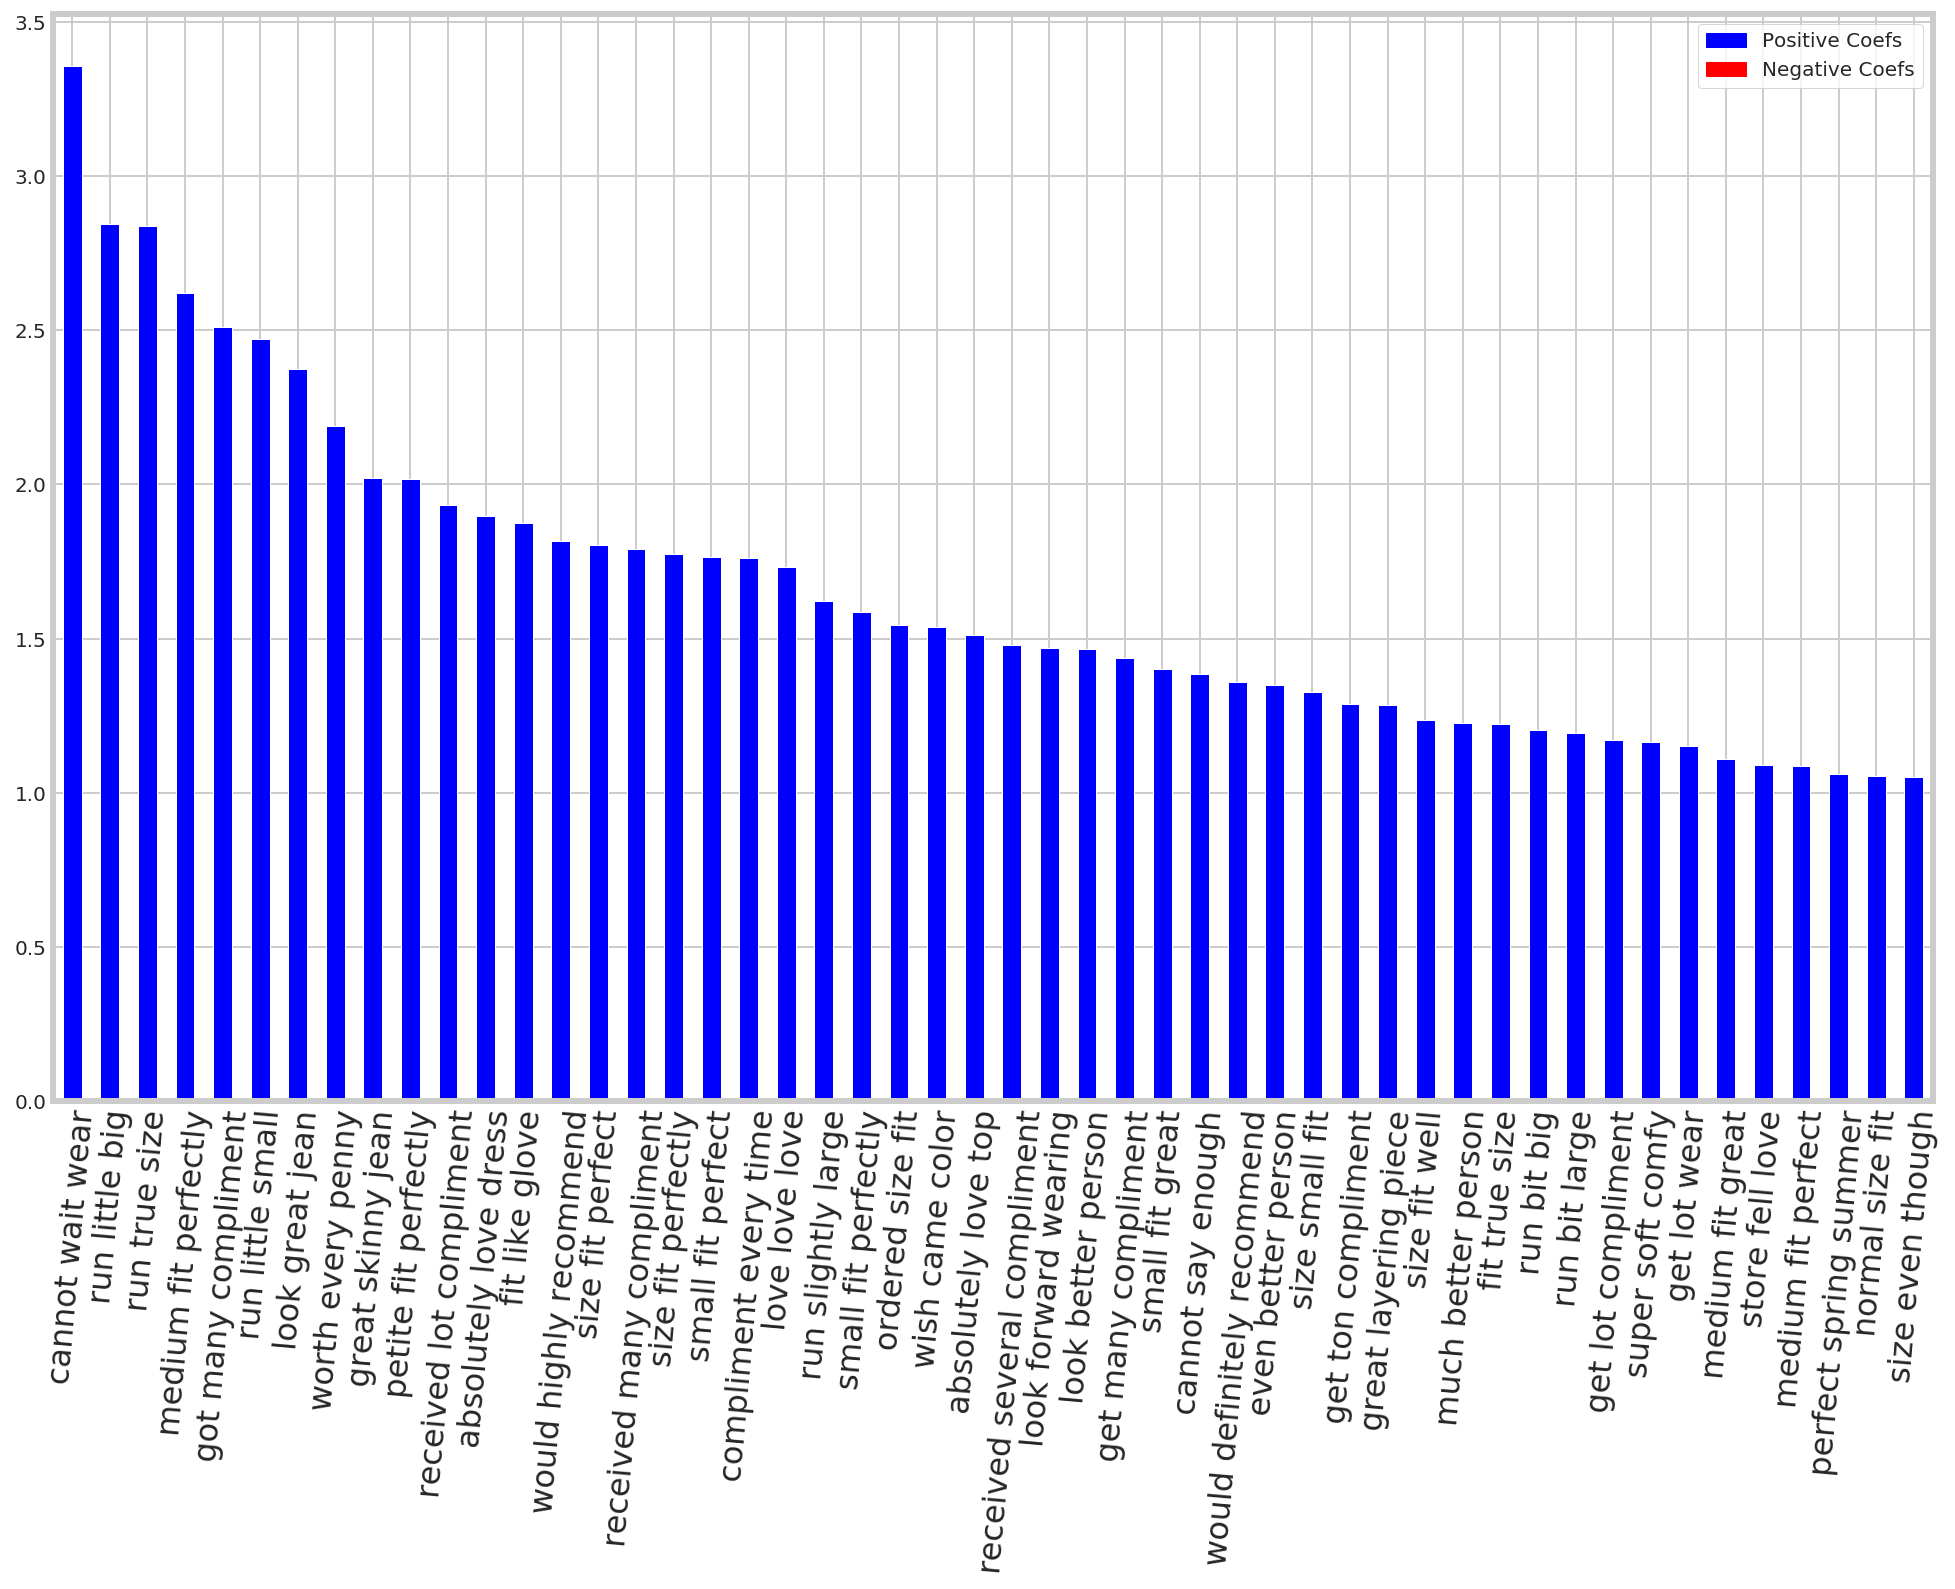

<Figure size 432x288 with 0 Axes>

In [362]:
final_features34['color']=final_features34['coef'].apply(lambda x:'b' if x>0 else 'r')
plt.figure(figsize=(15,10))
ax=final_features34['coef'].plot.bar(figsize=(15,10),color=final_features34['color'])
ax.set_xticklabels(final_features34['features'],rotation=85,fontsize=16)
blue = mpatches.Patch(color='b', label='Positive Coefs')
red = mpatches.Patch(color='r', label='Negative Coefs')
ax.legend(handles=[blue,red], loc=0)
plt.show()
plt.tight_layout()

## Plotting AUC-ROC Curve to Determine the Best Logistic Regression Model

In [363]:
lg_auc_roc_cvec=auc_roc_results_grid[3]
lg_auc_roc_tfidf=auc_roc_results_grid[4]
lg_auc_roc_w2v=auc_roc_results_grid[5]

In [364]:
fpr_cvec=lg_auc_roc_cvec[0]
tpr_cvec=lg_auc_roc_cvec[1]
auc_score_cvec_lg=auc(fpr_cvec, tpr_cvec)
fpr_tfidf=lg_auc_roc_tfidf[0]
tpr_tfidf=lg_auc_roc_tfidf[1]
auc_score_tfidf_lg=auc(fpr_tfidf, tpr_tfidf)
fpr_w2v=lg_auc_roc_w2v[0]
tpr_w2v=lg_auc_roc_w2v[1]
auc_score_w2v_lg=auc(fpr_w2v, tpr_w2v)

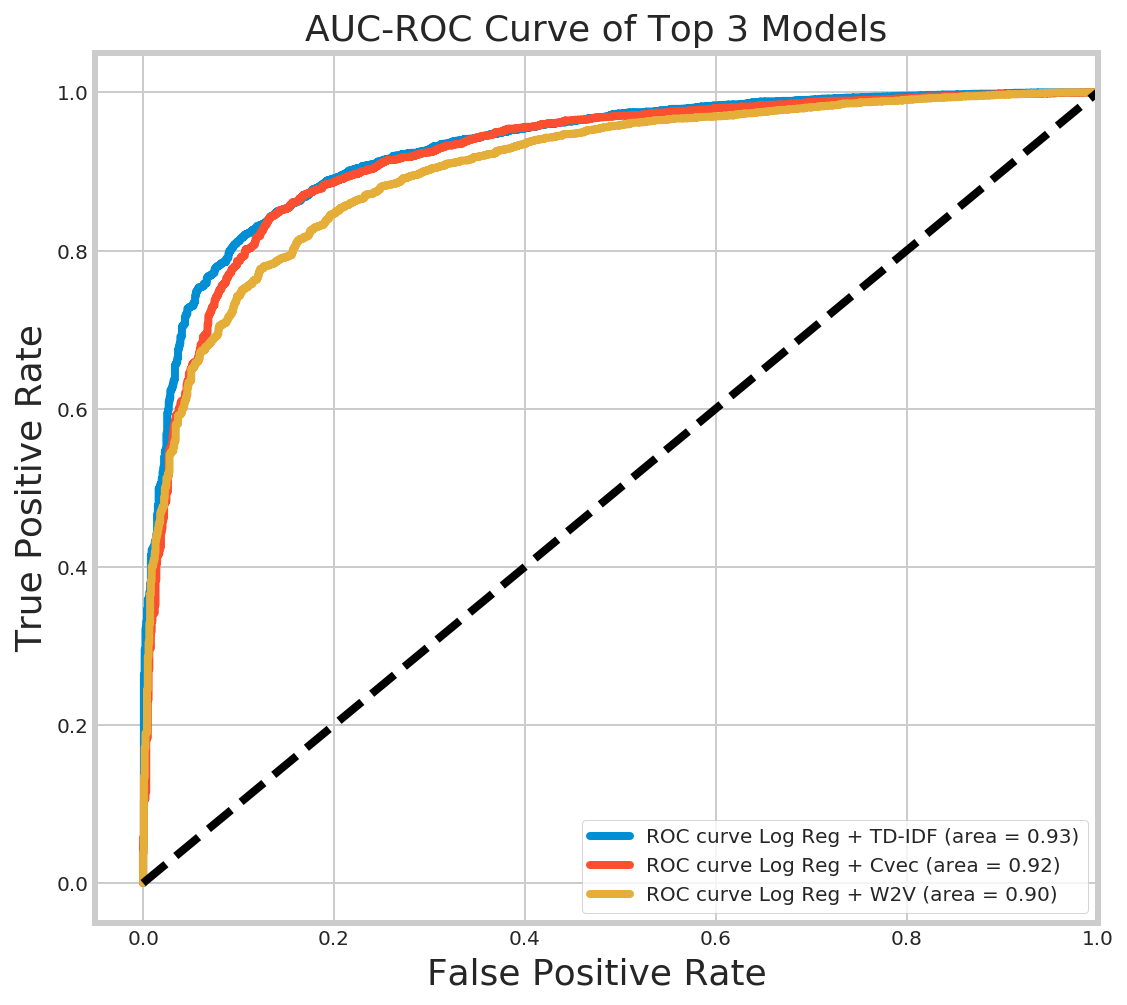

In [365]:
# Plot of a ROC curve for class 1 (has_cancer).
plt.figure(figsize=[8,8])
plt.plot(fpr_tfidf, tpr_tfidf, label='ROC curve Log Reg + TD-IDF (area = %0.2f)' % auc_score_tfidf_lg, linewidth=4)
plt.plot(fpr_cvec, tpr_cvec, label='ROC curve Log Reg + Cvec (area = %0.2f)' % auc_score_cvec_lg, linewidth=4)
plt.plot(fpr_w2v, tpr_w2v, label='ROC curve Log Reg + W2V (area = %0.2f)' % auc_score_w2v_lg, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('AUC-ROC Curve of Top 3 Models', fontsize=18)
plt.legend(loc="lower right")
plt.show()
